# **Projeto para artigo científico**: 
# **Análise do périodo de efetividade da quarentena na grande São Paulo com base nos índices de Monoxido de Carbono**

O estudo tenta comparar o primeiro semestre de 2016 á 2019(**estes anos estão em outro notebook**) com os de 2020, buscando verificar correlações entre eles. A partir disso, estuda parâmetros vindos da analíse de séries temporais, como:
    + Tendência (Check)
    + Sazonalidade (Check)
    + Ciclos (Check)
    + Variações irregulares (Check)
    + Estacionaridade (Check)
    + Velocidade (Check)
    + Aceleração (Check)
    + Autocorrelação (Check)
    + Autocovância (Check)

Além disso, fazer um tratamento de dados faltantes a partir de métods de imputação como:
    + EM(Expect Maxmization) (Check)
    + SDEM(Series-Dependent Effect Method)
    + TDEM(Time-Dependent Effect Method) 

Convêm também, aplicar modelos de previsão para os dados após seu tratamento então será analisado a partir de funções de autocorrelção parcial de autocorrelação os modelos de séires temporais seguintes:
    + SARIMA
    + ARIMA
    + FARIMA
    + Modelos AR(Autoregressivo)
    + Modelos MA(Média movel)
    + Modelos I(integrados)
    
Os dados são coletados a partir da plataforma CETESB que possui estações de qualidade do ar na região metropolitana e interiores do estado de São Paulo, sendo este dados de particulados inaláveis MP_10 das seguintes estações:
    + Pq.D.Pedro II(check)
    + Santo Amaro(check)
    + Congonhas(check)
    + Ibirapuera(check)
    + Pinheiros(check)
    + Marg.Tieté-Pte.dos Remédios(check)
    + Cerqueira Césa(check)
    + Osasco(check)
    + Parque Pedro II(check)



# **Analise de séries temporais -  conceitos importantes**&nbsp;
**O princípio da análise de série temporal é entender a estrutura que gerou a série.**
- Série temporal: conjunto de dados organizados no tempo;
- Tipos de séries temporais:
    + Discreta
    + Continua
    + Multivariada
- Principais objetivos
    + Compreender o mecanismo gerador da série;
    + Predizer o comportamento futuro da séire;
- Futuro envolve incerteza então a previsão nunca é perfeita, mas objetivo é reduzir o máximo o erro de previsão.
- Série temporal é um modelo estocástico. Logo, um processo estocástico busca satifazer condições de:
    + Simetria
    + Consistência
ou conceito é que um processo estocástico se as variáveis aleatórias(v.a) tem f.d ou finito-dimensionais.

# 1. Fenômenos típicos de séries temporais
##  1.1 Tendência

É o efeito de longo prazo na média. Especificação de longo prazo é dificíl. Para obtê-la é usado modelos de regressão linear, médias móveis, mínimos quadrados(semelhante a regressão linear)  ou ajuste exponecial. 

A tendência assume valores por volta de 1, se for maior que 1 há uma fonte tendência na série, menores pouca tendência na série, igua a 1 não há efeito da tendência na série.

### 1.1.1 Obtenção de tendência por mínimos quadrados


É possivel obter a tendência dos dados a partir do **métodos dos mínimos quadrados**, que é um procedimento paracido com regressão linear, mas a variável **dependente é sempre o tempo**, vejamos:

+ Tendência Linar (reta) : T = bxt +a;
+ polinômio de segundo grau: T = cxt² + bxt +a;
+ logaritmico: T = bxln(t)+a;
+ potência: T =b x $t^a$;
+ exponencial: T = b x $e^{axt}$.

T - Tendência
t - valor do tempo
b - coeficiente angular
a - coeficiente linear da reta
$Y_i$ - valor da variavel registrado no tempo

$b = \frac{n  \sum_{i=1}^{n} {(t_i x Y_i)} - \sum_{i=1}^{n} {t_i} \sum_{i=1}^{n} {Y_i}}{n x \sum_{i=1}^{n}{(t_i^2) - (\sum_{i=1}^{n}{t_i})^2}}$

$a = \frac{\sum_{i=1}^{n}{Y_i} - b x \sum_{i=1}^{n}{t_i}}{n}$

### 1.1.2 Obtenção de tendência por média movel


Se trata de um precedimento que você pega a média n períodos a partir de um valor temporal da série, por exemplos, há 12 dados resultados de vendas mensais de uma loja, então a média movel de 3 períodos é pegar um valor anteior a fevereiro(janeiro) e o valor posterior a fevereiro(março) e fazer a média dos três, ou seja:

$MM = \frac{janeiro+fevereiro+março}{3}$

se assim continua o mesmo raciocínio para n periodos **impares**. Caso seja **par**, primeiro deve-se ter em mente que a média movel precisa de um **termo centralizador**, então calcula-se novas médias móveis, a partir das calculadas com 4 ou 12 períodos, mas agora de 2 períodos, colocando seus resultados em períodos que têm correspondetes na série. Ou seja, digamos que temos dados trimestrais de dois anos de vendas, como há uma quantidade de 8 dados pois cada anos tem 4 trimestres, então para se calcular uma média movel de 4 periodos é preciso fazer uma média movel da metade, ou melhor:


$MM_{par/ano1} = \frac{ano1_{I} + ano1_{II} + ano1_{III} + ano1_{IV}}{4}$

$MM_{par/ano2} = \frac{ano2_{I} + ano2_{II} + ano2_{III} + ano2_{IV}}{4}$

$MM_par = \frac{MM_{par/ano1} + MM_{par/ano2}}{2}$


### 1.1.3 Remoção de tendência


Uma detectada a tendência é possivel removê-la, apenas precisando saber qual tipo de série(multiplicativa ou aditiva):

+ Aditiva:

$Y - T = C+S+I$

+ Multiplicativa:

$\frac{Y}{T} = CxSxI$



## 1.2 Sazonalidade


São flutuações nos valores da variavel **inferior a um ano**. Algo que se repete todo ano.Em um modeo aditivo e multiplicativo as vairaçõe sazonais são representatdas pelos **índices sazonais**, ou fatores sazonais, um para cada período em que o ano é divido( 12 índices para séries mensais, por exemplo). Os índices sazonais modificam a tendência, ao serem somados (aditivos) ou multiplicadto(multiplocativo). Alguns pontos são importantes que deve ser notados:

+ Modelo aditivo:
    + índices sazonais igual zero, diz que a sazonalidade não exercer efeito sobre a série;
    + Índices sazonais muitos diferentes de zeros( valores positivos ou negativos), a tendência influi muito na série.
+ Modelos multiplicativos:
    + Índices aproximadamente 1, implica as componentes sazonais não interferem no modelo.
    + Índices se foram muito diferentes de 1 então a tendência influencia pelos indices sazonais.
    
### 1.2.1 Obtenção da sazonalidade - método da razão para média móvel


1 - Obtenja as móveis de acordo com p número de periodos sazonais(4 se é série trimestral ou 12 anual);
    1.1 - Se for périodo par, fazer uma média de 2x4 períodos.
    
2 - Obter o indeces sazonais de cada periodo:
    2.1.1 - Aditivo: subtraindo dos valores originais da série as médias móveis centradas obtidas no passo 1;
    2.1.2 - Multiplicativo: dividindo os valores originais da série pelas médias móveis centradas calculadas no passo 1.
    
3 - Obter o medidas que resumes os dados da médias móveis calculadas( usar a mediana das sazonalidade dos meses de janeiro, por exemplo):
    3.1.1 - Aditivo: calcular a média aritmética simples dos valores correspondentes ao período sazonal;
    3.1.2 - Multiplicativo: calcular a média aritmética simples dos valores correspondentes ao período sazonal, sem incluir os valores máximo e mínimo ou pode calcular a mediana dos indices correspondentes.

4 - Fazer a correções necessárias para que a soma dos índices seja coerente (igual a zero para o aditivo e igual á ordem da sazonalidade no multiplicativo):
    4.1.1 - Aditivo: somar todos os índices calculados no passo 3 e dividir a soma pela ordem da sazonlidade( 4 se for trimestral ou 12 anual) e o resultado deverá ser subtraído de cada um dos índices, garantido que a soma deles seja igual a zero;
    4.1.2 - Multiplicativo: somar todos os índices calculados no passo 3, subtrair da soma a ordem da sazonalidade e novamente dividir a ordem da sazonalidade e por fim subtrair o resultado por 1. O resultado deverar ser multiplicado por cada um dos índices, garantindo que a soma deles seja igual á ordem da sazonalidade.

## 1.3 Variações irregulares


São flutuações inexplicáveis, resultado de fatos fortuitos e inesperados com catástrofes naturais.

## 1.4 Ciclos


Variações que apesar de periódicas não são associadas automaticamente a nenhuma media temporal, tem duração **superior** a um ano, ou seja, **uma base de dados que possui dados anuais, não tem sazonalidade**. Ex: Ciclos econômicos ou ciclos de epidemias. Logo, variações cíclicas e irregularidades são obtidas através da remoção das componentes tendência e sazonalidade:

+ Aditivo
$CI = Y - T - S$

+ Multiplicativo
$CI = \frac{Y}{TxS}$

Y - Valor original da série;

T - Tendência;

S - Componente sazonal.

Após encontrar os resultados, é importante identificar se os ciclos realmente influenciam a série, qual é sua periodicidade, e ainda se o efeito da variações irregulares é muito grande. Se uma série possui muitas irregularidades então é será dificil perceber ciclos, então para isso é importante ver alguns padrões no gráficos como:

+ No tipo aditivo, se há variações no gráfico envolta do valor zero das coordenadas;
+ No tipo multiplicativo, se há alternância variada em todo do valor 1 das coordendas;

Os valores 1 e zero, são pontos neutros destes tipos de série.

Se os ciclos influenciam na série temporal eles precisam ser levados em consideração no modelo. Precisamos calcular índices para os ciclos também, para os períodos de baixa e de alta, havendo dois procedimentos:
    - calcula-se a mediana, ou a média sem os valores máximo e mínimo, das variações cíclicas e irregulares para todos os períodos de alta (e baixa) existentes na série; este procedimento agrega informações de toda a série;
    - calcula-se a mediana, ou a média sem os valores máximo e mínimo, apenas para o último período de alta (e baixa); este procedimento privilegia as informações mais recentes, que podem ser mais úteis em previsões.

Também podemos observar os efeitos das variações irregulares, basta identificarmos eventuais quedas e altas no gráfico e relacionar tais eventos com fatos ocorridos no mesmo período. É importante observar que muitas vezes tais acontecimentos não causam efeito imediato, ou mesmo não causam efeito algum, o que pode surpreender o analista desavisado.

# 2. Considerações importantes


+ Uma série pode **apresentar apenas variações irregulares**, não se percebe comportamento crescente ou descrecente de longo prazo(tedência), ou flutuações sazonais ou cíclias;

+ Uma série pode apresentar **apenas tendência e variações irregulares**, não0 são identificadas flutuações sazonais ou cíclicas, apenas o comportamento crescente e descrecente de longo prazo e variações aleatórias;

+ Uma série pode apresentar **apenas variações sazonais e irregulars**, o comportamento de longo prazo da série é aproximadamente constante, mas observam-se flutuações dentro dos períodos de um ano, que se repetem todos os anos;

+ Por fim, uam série pode apresentar qualaquer combinações das anteriores.

+ Quando deconpomos uma série, visamos encontrar componentes que estão atuando em um conjunto particular dos dados e além de obter indíces ou equações para fazer as previsões destas.

+ Apenas a **tendência** possui a mesma unidade da variável;


# 3. Tipos de séries

## 3.1 Série aditiva


No modelo aditivo, o valor da série (Y) será o resultado da soma dos valores das componentes:
    
$Y = T + C + S + I$

## 3.2 Série multiplicativa


No modelo multiplictivo, o produto das componentes resultará na variável da série:

$Y = T x C x S x I$

# 4. Funções de análise da série:

Seja uma série temporal composta por v.a finito dimensionais então é importante analisar valores como:

### 4.1 Função média:
$\mu$(t) = E{Y((t)}

## 4.2 Função de auto-covarância:
$\gamma$($t_1$,$t_2$) = E[T($t_1$) - $\mu$($t_1$)][Y($t_2$) - $\mu$($t_2$)] = E{Y($t_1$Y($t_2$)} - $\mu$($t_1$)$\mu$($t_2$)

## 4.3 Função de auto-correlação:
$\rho$($t_1$,$t_2$) = $\frac{\gamma(t_1,t_2)}{\sigma(t_1)\sigma(t_2)}$ onde $\gamma$(t,t) é a variancia da série temporal.

A função média e de autocorrelação são importantes pois as séries temporal é uma distribuição normal então bas conhecer a média e variancia para conhecer todo o processo.

# 5. Processo estocásticos:
- O mais comum em séries temporais é a *estacionariedade*, basicamente a média e variância não muda se caminhamos nos tempo das amostras. Há dois tipos de estacionaridade:
    + Estrita ou forte;
    + Fraca ou ampla.
em termo estocásticos uma estacionariedade é se a distribuição finito-dimensional é invariante a translações do tempo. Seja um processo estocástico Y(t) é fracamente estacionário se:
1. E{Y(t)} = $\mu$(t) = $\mu$
2. V{Y(t)} = $\sigma$^2 (t) = $\sigma$^2
3. Corr{Y($t_1$,Y($t_2$))} = $\gamma$($t_1$,$t_2$) = $\gamma$($t_2$-$t_1$)

# 6. Teste de estacionariedade


## 6.1 Teste de Dickey-Fuller


Pode ser tamém chamdo de ADF(Augmented Dickey-Fuller):

$\Delta y_t = \beta_t + \beta_{2t} + \delta_{yt-1} + \sum_{i=1}^{m}{\alpha_i \Delta_{yt-1} + \epsilon_t}$

$\beta_1$ - intercepto drift da série
$\beta_2$ - intercepto de tendência
$\delta$  - coeficiente de presença de raiz.
m - número de defasagens tomadas na série.

+ Hipótese nula é se $\delta$ = 0;

Fazemos a regressão de $\Delta_{y_t}$ em que $y_{t-1}$ e repetindo em $\Delta_{y_{t-1}}$ em que $y_{t-2}$ e assim sucesivamente e calculamos a estatística T dada por:

$T = \frac{\delta}{se(\delta)}$

$\^\delta$ - estimador de $\delta$
$se(\^ \delta)$ - estimador do desvio padrão do erro de $\delta$

## 6.2 Teste Philips-Peron(PP)
Para casos em que os errors ${\epsilon_t}$ se t pertence aos inteiros são correlacionados e, possivelmente, heterocedásticos. Funcionam para seguinte regressão:
$\Delta y_t = \beta_t + \beta_{2t} + \delta_{yt-1} + \sum_{i=1}^{m}{\alpha_i \Delta_{yt-1} + \epsilon_t}$

O teste-z é dados por:

$Z = n\delta_n - \frac{n^2 \delta_2}{2 \delta^2_n}(\lambda^2 - \lambda_{n^2} - \gamma_{an})$

onde:

$\gamma_{j_n} = \frac{1}{n} \sum_{i = 1+ j}^{n}{r_i r_{i-j}}$
$\lambda_n^2 = \gamma_{0,n} + 2 \sum_{j=1}{q}{1 - \frac{j}{q+1}}\gamma_{j,n}$
$S^2_n = \frac{1}{n-k} \sum_{i=1}{n}{r_i}$

$r_i$ -> resíduo em $\gamma_i$
k     -> nº de covariaveis na regressão
q     -> é o número de defasagens ultilizadas para calulcar $\lambda^2_n$

Se o processo não for heterocedástico temos, que se $(\delta) = \fac{1}{n}$ e então Z é dada por

$Z = n\delta = \frac{\delta}{se(\delta)}$

## 6.3 Teste KPSS
Determinar a estacionariedade da série temporal:

+ H0: é estacionária
+ H1: apresenta raiz unitária

Seja $X_t$ = 1,2,...,N as observações de uma série temporal a qual queremos testar sua estacionariedade, suponha que podemos decompor a série em componentes de tendência, passeio aletatório e erro:

$X_t = \zeta_t + r_t + \epsilon_t$

$r_t$ é o passeio aleatório:

$r_t = r_{t-1} + \mu_t$

Estimador da variância dos erros nesta regressão, isto é, $\sigma^2_{\epsilon} = \frac{SQE}{N}$, definimos:

$S_t = \sum_{i=1}^{t}{\epsilon_t}; t \epsilon N$

e assim concluir que o teste estatístico é dados por:

$LM = \sum_{t=1}^{N}{\frac{St^2}{N^2\sigma^2_\epsilon}}$

# 7. Transformações de dados:
Como normalmente as séries não apresentam esse comportamento estável, recorre-se a transformações de dados.
## 7.1 Tansformação Box-Cox
$g(y)$ = $\frac{y^\gamma - 1}{\lambda}$

Se
+ $\lambda$ = 1   ->  g é identidade,
+ $\lambda$ = -1  ->  g é a transfomação inversa
+ $\lambda$ = 1/2 ->  g transformação y em $\sqrt{y}$

e lim $\lambda$ ->0 = g(y) = log(y)

## 7.2 Operação diferença $\Delta$:

$\Delta$$y_t$ = $y_t$ - $y_{t-1}$

A n-ésima diferença de $y_t$ é obtida recursivamente por:

$\Delta^n$ $y_t$ = $\Delta(\Delta^{n-1}y_t)$

# 8. Modelos de séries temporais

Existe dois tipos
    + paramétricos com número finito de parâmetros. Análise feita no dominio do *tempo*;
    + não paramétricos com núemro fniito de parâmetros. Análise feita no domínio da *freqência*.
Com isso, estes modelos são genericamente escrito com:

$Y_t$ = $S_t$ + $\epsilon_t$ -> (Observação = Sinal + Ruído)

## 8.1 Modelos de regressão:

Ruídos são não-correlacionados
     $S_t = x_t \beta$
Exemplos:
1. Modelo de tendência linear
$S_t = \alpha + \beta t$
2. Modelo de curva de crescimento
$Y_t = \alpha e^{\beta t + \epsilon_t}$ então $lnY_t = ln \alpha + \beta t + \epsilon_t$


## 8.2 Modelos de alisamento exponencial

- Relação do sinal vale apenas 'localmente'
- Parêmtros sujeitos a pequenas variações temporais

## 8.3 Modelos autoregressivos(AR)

O sinal atual depende dos níveis passados:
$S_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + ... + \phi_p y_{t-p}$

## 8.4 Modelos lineares estacionários

Inclui os modelos ARMA que são uma parte específica dos modelos ARIMA que visam basicamente tornar o processo estacionário através de operações de diferenças.

$S_t = \Phi_t \epsilon_{t-1} + \Phi_2 \epsilon_{t-2} + ... = \sum_{i=1}^{\infty}{\Phi_i \epsilon_{t-i}}$

## 8.5 Modelos de equações simultâneas ou econométricos

$Y_{t}^T \Gamma + X_t B = \epsilon$

$Y_t$ - variáveis endógenas
$X_t$ - variáveis exógenas

# 9. Modelos de suavização

## 9.1 Média movel simples

Seja uma série temporal estacionária e localmente contaste, é composta por o nivel do sinal mais o ruído:

$Z_t = \mu_t + \alpha, t = 1,2,...,N$

$\mu_t$ é um parâmetro desconhecido que varia com o tempo. Sendo assim, a técnica de média movel consiste calcular a média aritmétca de k obeservações mais recentes, ou seja

$M_t = \frac{Z_t+Z_{t-1}+...+Z_{t-k+1}}{k}$

onde k é o comprimento da média de observações. Logo, a previsão de h valores futuros é dada pela última média movel calculada, ou seja:

$ Z_t(h) = M_t$

ou ainda

$Z_t(h) = Z_t(h+1) + Z_t - \frac{Z_t - Z_{t-k}}{k} , h>0$

Podemos perceber que a equação acima corrige a pervisão de $Z_{t+h}$ a cada instante, ou seja, a cada nova observação na série $Z_{t+h}$ é atualizado.

E assumindo que $\alpha_t ~ N(0,\alpha_{a}^2)$, podemos afirmar que $Z_t(h) ~ N(\mu,z\frac{\sigma^2_a}{k})$ e construir um intervalo de confiança com nível de significância $\alpha$, dado por

$(Z_t(h) - z_\alpha \frac{\sigma_a}{\sqrt{k}}; Z_t(h)+z_\alpha \frac{\sigma_a}{\sqrt{k}})$


## 9.2 Suavização exponencial simples

Seja a série temporal exponencial estácionária:

$Z_t = \alpha \sum_{j=0}^{t-1}{(1-\alpha)^j}Z_{t-j} + (1-\alpha)^t Z_0, t = 1,...,N$

$Z_t$ é denominado valor exponencialmente suavizado e $\alpha$ é a constante de suavização, tal que $0 < \alpha < 1$.

Logo SES é uma média poderada que dá pesos maiores as observações mais recentes, eliminando um das desvantagens do método de média movel simples. Assim, para h futuros é dada pelo ultimo valor exponencialmente suavizado,ou seja

$Z(h) = Z_t , para todo h$
$Z(h) = \alpha Z_t + (1-\alpha)Z_{t-1}(h+1)$

Já seu intervalor de confiança é dados por:
$(Z_t(h) - z_\gamma \sigma_a \sqrt{\frac{\sigma}{2-\sigma}}; Z_t(h) + z_\gamma \sqrt{\frac{\alpha}{2-\alpha}})$

onde $z_\gamma$ é o quantil de uma distribuição normal padrão com nível de significância $\gamma$.

## 9.3 Suavização exponencial de holt

Boa para séires que apresnetam tendência. Seja a série temporal:

$Z_t = \mu + T_t + \alpha, t = 1,..,N$

é parcecida com a SES mas possui a constante $T_t$ para modelar a componente de tendência. Os valores do nível e da tendência da série ser]ao estimados por

$Z_t = AZ_t + (1-A)Z_{t-1}+ T_{t-1}), 0<A<1 e t = 2,...N$

$T_t = AZ_t + C(Z_t - Z_{t-1})+ (1-C)T_{t-1}), 0<C<1 e t = 2,...N$

onde A e C são constante de suavização, tal que A > C. Portanto a previsão do valor $Z_{t+h}$ com origem t é dada por:

$Z_t (h) = Z_t + hT_t , h>0$


# 10. Medidas de acurácia

São medidas que indicam o melhor modelo de suavização para a base de dados.

## 10.1 Média Percentual Absoluta do Erro - MAPE

Expressa a acurácia do erro em percetagem. Quanto menor o resultado(aproximar de zero) melhor o modelo de suavização.
$\sum_{t=1}^{n} \frac{|y_t - \^y_t|}{n} x 100 se y_t \diff 0$

onde $y_t$ são os dados originais e $\^y_t$ são os dados ajustados e n é o número de observações.

## 10.2 Desvio Padrão Absoluto da Média - MAD

É o desvio padrão do ajuste com os dados originais. Por exemplo, se estamos ajustando um série e resulta em um MAD de 72 quer dizer que o ajuste possui um desvio padrão de 72 dias. A equação é a seguinte:

$\frac{\sum_{t=1}^{n}{|y_t - \^ y_t|}}{n}$

$y_t$ são os dados originais e $\^y_t$ são os dados ajustados e n é número de obsevações. Quanto menor o MAD melhor é o modelo de suavização.

## 10.3 Desvio Padrão Quadráticos da Média - MSD

Bastante comum é avialiação de séries temporais. Porém, é sucetivel a deformaçõe no modelo devido a outliers. **Portanto se temos um MAD e MSD baixo então temos outliers em nosso caminho.** A equação é a seguinte:

$\frac{\sum_{t=1}^{n}{|y_t - \^ y_t|^2}}{n}$

$y_t$ são os dados originais e $\^y_t$ são os dados ajustados e n é número de obsevações. Quanto menor o MSD melhor é o modelo de suavização.

# 11. Fontes:

1 - https://www.inf.ufsc.br/~marcelo.menezes.reis/Cap4.pdf

2 - http://www.dme.ufrj.br/dani/pdf/slidespartefrequentista.pdf

# Imports necessários

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import impyute.imputation as imp
from statsmodels.tsa.stattools import adfuller
import statistics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
import warnings
warnings.filterwarnings('ignore')

# Funções para tratamentos e avaliação dos dados

In [195]:
# Função para completar os dados faltantes
def completa_serie(dados,ano):
    print('-'*50)
    print('-'*24,ano,'-'*20)
    print('-'*50)
    
    # Reseta o index da série para ser por linha
    miss_dados = dados.isna().sum().sum()/(dados.shape[0]*dados.shape[1])*100
    print(f'{miss_dados.round(2)}% dos dados da bases são faltantes')
    
    # Completa os dados por Expect Maximization(EM)
    dados_filled = imp.cs.em(dados.values,loops=50)    
    d = [str(i) for i in range(1,25)]
    dados_completados = pd.DataFrame(data=dados_filled.round(0),columns=d)
    
    # Dados completados por EM
    print('*'*40,'  Base de dados completada  ','*'*40)
    display(dados_completados.head())

    # Formato da base dados
    print('*'*40,'  Formato da base dados  ','*'*40)
    display(dados_completados.shape)

    # Média diária dos dados
    print('*'*40,'Média diária dos dados','*'*40)
    dados_medios_completados = dados_completados.mean(axis='columns')
    display(dados_medios_completados)
    
    return dados_medios_completados

# Aplicar o Teste de Dickey-Fuller
def teste_estacionariedade(serie_temporal):
    
    #Teste estatístico
    print('Resultados do teste Dickey Fuller:')
    dftest = adfuller(serie_temporal.values)
    p_value = dftest[1]
    dfoutput = pd.Series(dftest[0:4], index=['Teste estatístico','p-value','#Lags Usados','Número de observações usadas'])
    for key,value in dftest[4].items():
        dfoutput['Valores críticos (%s)'%key] = value
    print(dfoutput)
    return p_value

def MAPE(serie_suavizada,serie_original):
    return sum(abs((serie_suavizada-serie_original)*100)/serie_original)/serie_suavizada.shape[0]

def MQE(serie_suavizada,serie_original):
    return sum(pow(serie_suavizada-serie_original,2))/serie_suavizada.shape[0]

def MAE(serie_suavizada,serie_original):
    return sum(abs(serie_suavizada-serie_original))/serie_suavizada.shape[0]


def alisar_serie(serie_temporal_n_tratada,p_value,alpha=0.3):
    df_modelo_suavisado,df_suavisado = pd.DataFrame({}),pd.DataFrame({})
    vMAPE,vMAE,vMQE = [],[],[]
    
    if p_value < 0.05:
        janelas = [5,15,25,35,45,55,65,75]
        for janela in janelas:
            #Média movel para séries estácionária
            modelo_suavisado = serie_temporal_n_tratada.rolling(janela).mean()
            
            modelo_suavisado.reset_index(drop=True,inplace=True)
            modelo_suavisado.dropna(inplace=True)
            df_modelo_suavisado = df_modelo_suavisado.append(modelo_suavisado,ignore_index=True)
            
            vMAPE.append(MAPE(modelo_suavisado,serie_temporal_n_tratada[janela-1:]))
            vMAE.append(MAE(modelo_suavisado,serie_temporal_n_tratada[janela-1:]))
            vMQE.append(MQE(modelo_suavisado,serie_temporal_n_tratada[janela-1:]))
            
        moda = statistics.mode([vMAPE.index(min(vMAPE)),vMAE.index(min(vMAE)),vMQE.index(min(vMQE))])
        df_modelo_suavisado = df_modelo_suavisado.T
        df_suavisado = df_modelo_suavisado[moda].dropna()
        
    elif p_value > 0.05:
            modelo_suavisado = [serie_temporal_n_tratada[0]] # first value is same as series
            for n in range(1, len(serie_temporal_n_tratada)):
                modelo_suavisado.append(alpha * serie_temporal_n_tratada[n] + (1 - alpha) * modelo_suavisado[n-1])                
            df_suavisado = df_suavisado.append(modelo_suavisado,ignore_index=True)
            vMAPE.append(MAPE(df_suavisado,serie_temporal_n_tratada))
            vMAE.append(MAE(df_suavisado,serie_temporal_n_tratada))
            vMQE.append(MQE(df_suavisado,serie_temporal_n_tratada))

    
    print(f'MAPE:{min(vMAPE)}')
    print(f'MAE:{min(vMAE)}')
    print(f'MQE:{min(vMQE)}')
    #Plotar valores para verficar visualmente
    plt.figure(figsize=(40,5))
    st_plot = plt.plot(serie_temporal_n_tratada,'*-', color='red',label='Original')
    st_plot = plt.plot(df_suavisado,'*-', color='blue',label='Suavizado')
    plt.legend(loc='best')
    plt.show(block=False)
    
    return df_suavisado


def ano_bisexto(ano):
    nome_eixo_x = pd.DataFrame({'Dia':[]})
    for i in range(1,32):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-01-0'+str(i)},ignore_index=True)    
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-01-'+str(i)},ignore_index=True)            

    for i in range(1,30):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-02-0'+str(i)},ignore_index=True)   
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-02-'+str(i)},ignore_index=True)           

    for i in range(1,32):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-03-0'+str(i)},ignore_index=True)   
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-03-'+str(i)},ignore_index=True)   


    for i in range(1,31):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-04-0'+str(i)},ignore_index=True)   
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-04-'+str(i)},ignore_index=True)   

    for i in range(1,32):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-05-0'+str(i)},ignore_index=True)       
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-05-'+str(i)},ignore_index=True)       

    for i in range(1,31):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-06-0'+str(i)},ignore_index=True)   
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-06-'+str(i)},ignore_index=True)


    for i in range(1,32):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-07-0'+str(i)},ignore_index=True)       
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-07-'+str(i)},ignore_index=True)

    return nome_eixo_x

def ano_normal(ano):
    nome_eixo_x = pd.DataFrame({'Dia':[]})
    for i in range(1,32):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-01-0'+str(i)},ignore_index=True)    
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-01-'+str(i)},ignore_index=True)            

    for i in range(1,29):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-02-0'+str(i)},ignore_index=True)   
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-02-'+str(i)},ignore_index=True)           

    for i in range(1,32):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-03-0'+str(i)},ignore_index=True)   
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-03-'+str(i)},ignore_index=True)   


    for i in range(1,31):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-04-0'+str(i)},ignore_index=True)   
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-04-'+str(i)},ignore_index=True)   

    for i in range(1,32):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-05-0'+str(i)},ignore_index=True)       
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-05-'+str(i)},ignore_index=True)       

    for i in range(1,31):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-06-0'+str(i)},ignore_index=True)   
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-06-'+str(i)},ignore_index=True)


    for i in range(1,32):
        if i<=9:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-07-0'+str(i)},ignore_index=True)       
        else:
            nome_eixo_x = nome_eixo_x.append({'Dia':str(ano)+'-07-'+str(i)},ignore_index=True)

    return nome_eixo_x

# Carregando os dados

In [196]:
dados_Cerqueria_2020 = pd.read_csv('..\/01.Dados\/CSV\/CO_Cerqueria_2020.csv')
dados_Congonhas_2020 = pd.read_csv('..\/01.Dados\/CSV\/CO_Congonhas_2020.csv')
dados_ibirapuera_2020 = pd.read_csv('..\/01.Dados\/CSV\/CO_ibirapuera_2020.csv')
dados_Marg_T_2020 = pd.read_csv('..\/01.Dados\/CSV\/CO_Marg_T_2020.csv')
dados_Osasco_2020 = pd.read_csv('..\/01.Dados\/CSV\/CO_Osasco_2020.csv')
dados_P_Pedro_2020 = pd.read_csv('..\/01.Dados\/CSV\/CO_P_Pedro_2020.csv')
dados_Pinheiros_2020 = pd.read_csv('..\/01.Dados\/CSV\/CO_Pinheiros_2020.csv')
dados_Santo_Amaro_2020 = pd.read_csv('..\/01.Dados\/CSV\/CO_Santo_Amaro_2020.csv')

# Tratamento de dados faltantes com EM(Expected Maximization)

In [197]:
dados_Cerqueria_2020_completados   = completa_serie(dados_Cerqueria_2020,2020)
dados_Congonhas_2020_completados   = completa_serie(dados_Congonhas_2020,2020)
dados_ibirapuera_2020_completados  = completa_serie(dados_ibirapuera_2020,2020)
dados_Marg_T_2020_completados      = completa_serie(dados_Marg_T_2020,2020)
dados_Osasco_2020_completados      = completa_serie(dados_Osasco_2020,2020)
dados_P_Pedro_2020_completados     = completa_serie(dados_P_Pedro_2020,2020)
dados_Pinheiros_2020_completados   = completa_serie(dados_Pinheiros_2020,2020)
dados_Santo_Amaro_2020_completados = completa_serie(dados_Santo_Amaro_2020,2020)

--------------------------------------------------
------------------------ 2020 --------------------
--------------------------------------------------
16.26% dos dados da bases são faltantes
****************************************   Base de dados completada   ****************************************


1    2    3    4    5    6    7    8    9   10  ...   15   16   17   18  \
0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    19   20   21   22   23   24  
0  0.0  1.0  1.0  0.0  0.0  1.0  
1  0.0  1.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 24 columns]

****************************************   Formato da base dados   ****************************************


(213, 24)

**************************************** Média diária dos dados ****************************************


0      0.333333
1      0.208333
2      0.000000
3      0.000000
4      0.000000
         ...   
208    0.458333
209    0.333333
210    0.000000
211    0.000000
212    0.125000
Length: 213, dtype: float64

--------------------------------------------------
------------------------ 2020 --------------------
--------------------------------------------------
7.22% dos dados da bases são faltantes
****************************************   Base de dados completada   ****************************************


1    2    3    4    5    6    7    8    9   10  ...   15   16   17   18  \
0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  1.0   
1  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
2  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  ...  0.0  0.0  1.0  1.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  1.0  1.0  1.0  1.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  1.0  1.0   

    19   20   21   22   23   24  
0  1.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  1.0  0.0  0.0  1.0  1.0  
2  1.0  1.0  0.0  1.0  0.0  0.0  
3  1.0  1.0  1.0  0.0  0.0  0.0  
4  1.0  1.0  0.0  0.0  0.0  0.0  

[5 rows x 24 columns]

****************************************   Formato da base dados   ****************************************


(213, 24)

**************************************** Média diária dos dados ****************************************


0      0.333333
1      0.625000
2      0.416667
3      0.500000
4      0.333333
         ...   
208    0.916667
209    1.083333
210    0.625000
211    0.666667
212    0.541667
Length: 213, dtype: float64

--------------------------------------------------
------------------------ 2020 --------------------
--------------------------------------------------
20.95% dos dados da bases são faltantes
****************************************   Base de dados completada   ****************************************


1    2    3    4    5    6    7    8    9   10  ...   15   16   17   18  \
0  0.0  0.0  1.0  1.0 -0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  1.0  0.0 -1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4 -0.0  0.0  0.0  0.0 -0.0  0.0 -0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    19   20   21   22   23   24  
0  0.0  1.0  0.0  0.0  0.0 -0.0  
1  0.0  0.0 -0.0  0.0  1.0 -0.0  
2  0.0  0.0  0.0  0.0  0.0 -0.0  
3  0.0  1.0  0.0 -0.0  1.0  0.0  
4  0.0  0.0  0.0  0.0  1.0 -0.0  

[5 rows x 24 columns]

****************************************   Formato da base dados   ****************************************


(213, 24)

**************************************** Média diária dos dados ****************************************


0      0.166667
1      0.125000
2      0.041667
3      0.125000
4      0.041667
         ...   
208    0.583333
209    0.416667
210    0.000000
211    0.583333
212    0.125000
Length: 213, dtype: float64

--------------------------------------------------
------------------------ 2020 --------------------
--------------------------------------------------
6.49% dos dados da bases são faltantes
****************************************   Base de dados completada   ****************************************


1    2    3    4    5    6    7    8    9   10  ...   15   16   17   18  \
0  1.0  2.0  2.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  1.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    19   20   21   22   23   24  
0  0.0  0.0  1.0  1.0  1.0  1.0  
1  1.0  1.0  1.0  0.0  1.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  1.0  1.0  

[5 rows x 24 columns]

****************************************   Formato da base dados   ****************************************


(213, 24)

**************************************** Média diária dos dados ****************************************


0      0.416667
1      0.625000
2      0.083333
3      0.083333
4      0.166667
         ...   
208    1.000000
209    1.208333
210    0.000000
211    0.000000
212    0.041667
Length: 213, dtype: float64

--------------------------------------------------
------------------------ 2020 --------------------
--------------------------------------------------
6.63% dos dados da bases são faltantes
****************************************   Base de dados completada   ****************************************


1    2    3    4   5    6    7    8    9   10  ...   15   16   17   18  \
0  2.0  2.0  2.0  2.0 NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0 NaN  0.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  1.0  1.0   
2  0.0  0.0  0.0  0.0 NaN  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   
4  1.0  0.0  0.0  0.0 NaN  1.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    19   20   21   22   23   24  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  1.0  1.0  1.0  1.0  1.0  1.0  
2  0.0  0.0  0.0  0.0  1.0  0.0  
3  1.0  0.0  1.0  1.0  1.0  1.0  
4  0.0  0.0  1.0  1.0  1.0  1.0  

[5 rows x 24 columns]

****************************************   Formato da base dados   ****************************************


(213, 24)

**************************************** Média diária dos dados ****************************************


0      0.347826
1      0.521739
2      0.086957
3      0.347826
4      0.304348
         ...   
208    1.130435
209    0.869565
210    0.565217
211    0.608696
212    0.782609
Length: 213, dtype: float64

--------------------------------------------------
------------------------ 2020 --------------------
--------------------------------------------------
3.79% dos dados da bases são faltantes
****************************************   Base de dados completada   ****************************************


1    2    3    4    5    6    7    8    9   10  ...   15   16   17   18  \
0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    19   20   21   22   23   24  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 24 columns]

****************************************   Formato da base dados   ****************************************


(213, 24)

**************************************** Média diária dos dados ****************************************


0      0.208333
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
208    0.458333
209    0.583333
210    0.000000
211    0.041667
212    0.000000
Length: 213, dtype: float64

--------------------------------------------------
------------------------ 2020 --------------------
--------------------------------------------------
5.24% dos dados da bases são faltantes
****************************************   Base de dados completada   ****************************************


1    2    3    4    5    6    7    8    9   10  ...   15   16   17   18  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    19   20   21   22   23   24  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  1.0  1.0  0.0  1.0  1.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 24 columns]

****************************************   Formato da base dados   ****************************************


(213, 24)

**************************************** Média diária dos dados ****************************************


0      0.291667
1      0.250000
2      0.000000
3      0.000000
4      0.000000
         ...   
208    0.666667
209    1.000000
210    0.000000
211    0.000000
212    0.000000
Length: 213, dtype: float64

--------------------------------------------------
------------------------ 2020 --------------------
--------------------------------------------------
19.87% dos dados da bases são faltantes
****************************************   Base de dados completada   ****************************************


1    2    3    4    5    6    7    8    9   10  ...   15   16   17   18  \
0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    19   20   21   22   23   24  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 24 columns]

****************************************   Formato da base dados   ****************************************


(213, 24)

**************************************** Média diária dos dados ****************************************


0      0.166667
1      0.083333
2      0.041667
3      0.000000
4      0.041667
         ...   
208    0.333333
209    0.375000
210    0.000000
211    0.041667
212    0.125000
Length: 213, dtype: float64

# Gerando as datas para plotagem

In [198]:
eixo_2020 = ano_bisexto(2020)

# Teste de estacionariedade das séries

## Estação Cerqueria

Resultados do teste Dickey Fuller:
Teste estatístico              -5.853417e+00
p-value                         3.545526e-07
#Lags Usados                    2.000000e+00
Número de observações usadas    2.100000e+02
Valores críticos (1%)          -3.461879e+00
Valores críticos (5%)          -2.875404e+00
Valores críticos (10%)         -2.574159e+00
dtype: float64


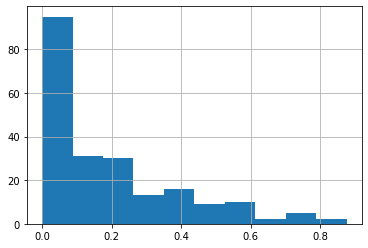

In [199]:
dados_Cerqueria_2020_completados_p_values = teste_estacionariedade(dados_Cerqueria_2020_completados)
dados_Cerqueria_2020_completados.hist()

## Estação Congonhas

Resultados do teste Dickey Fuller:
Teste estatístico                -1.677162
p-value                           0.442916
#Lags Usados                     11.000000
Número de observações usadas    201.000000
Valores críticos (1%)            -3.463309
Valores críticos (5%)            -2.876029
Valores críticos (10%)           -2.574493
dtype: float64


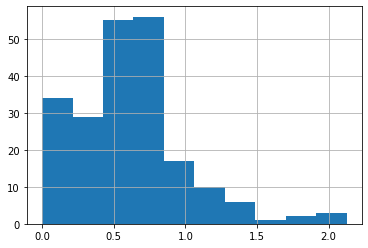

In [200]:
dados_Congonhas_2020_completados_p_values = teste_estacionariedade(dados_Congonhas_2020_completados)
dados_Congonhas_2020_completados.hist()

## Estação Ibirapuera

Resultados do teste Dickey Fuller:
Teste estatístico                -1.199607
p-value                           0.673765
#Lags Usados                     12.000000
Número de observações usadas    200.000000
Valores críticos (1%)            -3.463476
Valores críticos (5%)            -2.876102
Valores críticos (10%)           -2.574532
dtype: float64


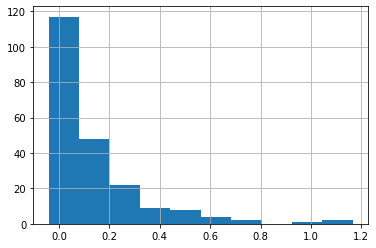

In [201]:
dados_ibirapuera_2020_completados_p_values = teste_estacionariedade(dados_ibirapuera_2020_completados)
dados_ibirapuera_2020_completados.hist()

## Estação Margem Tietê

Resultados do teste Dickey Fuller:
Teste estatístico                -5.274518
p-value                           0.000006
#Lags Usados                      2.000000
Número de observações usadas    210.000000
Valores críticos (1%)            -3.461879
Valores críticos (5%)            -2.875404
Valores críticos (10%)           -2.574159
dtype: float64


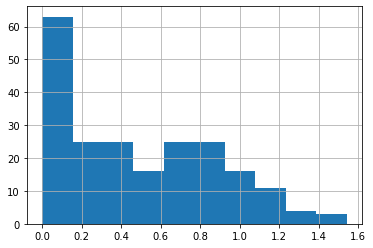

In [202]:
dados_Marg_T_2020_completados_p_values = teste_estacionariedade(dados_Marg_T_2020_completados)
dados_Marg_T_2020_completados.hist()

## Estação Osasco

Resultados do teste Dickey Fuller:
Teste estatístico                -1.877183
p-value                           0.342870
#Lags Usados                     10.000000
Número de observações usadas    202.000000
Valores críticos (1%)            -3.463144
Valores críticos (5%)            -2.875957
Valores críticos (10%)           -2.574455
dtype: float64


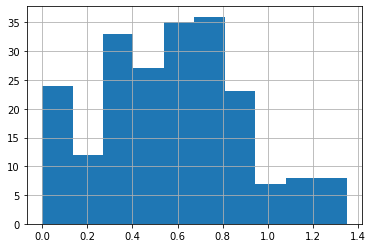

In [203]:
dados_Osasco_2020_completados_p_values = teste_estacionariedade(dados_Osasco_2020_completados)
dados_Osasco_2020_completados.hist()

## Estação Parque Pedro II

Resultados do teste Dickey Fuller:
Teste estatístico                -1.713456
p-value                           0.424193
#Lags Usados                     11.000000
Número de observações usadas    201.000000
Valores críticos (1%)            -3.463309
Valores críticos (5%)            -2.876029
Valores críticos (10%)           -2.574493
dtype: float64


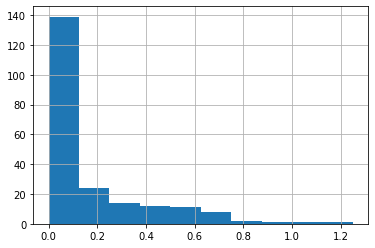

In [204]:
dados_P_Pedro_2020_completados_p_values = teste_estacionariedade(dados_P_Pedro_2020_completados)
dados_P_Pedro_2020_completados.hist()

## Estação Pinheiro

Resultados do teste Dickey Fuller:
Teste estatístico                -4.945990
p-value                           0.000028
#Lags Usados                      2.000000
Número de observações usadas    210.000000
Valores críticos (1%)            -3.461879
Valores críticos (5%)            -2.875404
Valores críticos (10%)           -2.574159
dtype: float64


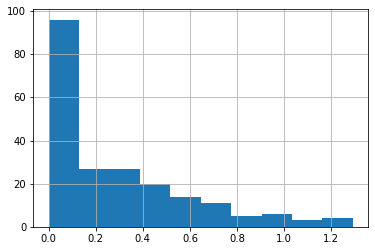

In [205]:
dados_Pinheiros_2020_completados_p_values = teste_estacionariedade(dados_Pinheiros_2020_completados)
dados_Pinheiros_2020_completados.hist()

## Estação Santo Amaro

Resultados do teste Dickey Fuller:
Teste estatístico              -7.551875e+00
p-value                         3.173050e-11
#Lags Usados                    1.000000e+00
Número de observações usadas    2.110000e+02
Valores críticos (1%)          -3.461727e+00
Valores críticos (5%)          -2.875337e+00
Valores críticos (10%)         -2.574124e+00
dtype: float64


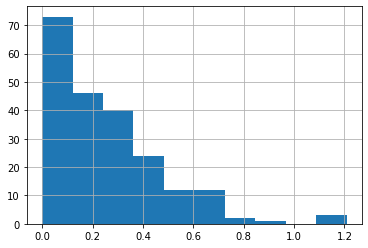

In [206]:
dados_Santo_Amaro_2020_completados_p_values = teste_estacionariedade(dados_Santo_Amaro_2020_completados)
dados_Santo_Amaro_2020_completados.hist()

# Suavizando os dados por média movel ou suaviazação exponecial

Se o p_values>0.05 é feito suavização exponencial, pois a série não é estacionária, caso contrário é feito a média movel por 5 períodos.

## Estação Cerqueria

MAPE:nan
MAE:0.12328548644338114
MQE:0.025233253588516733


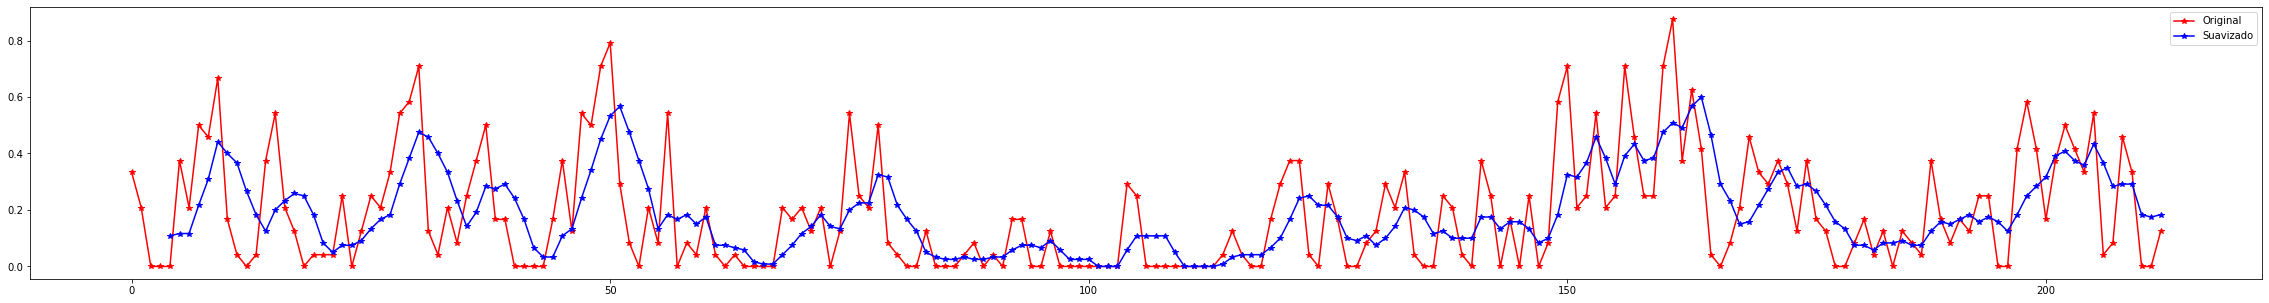

In [207]:
dados_Cerqueria_2020_completados_suavizado   = alisar_serie(dados_Cerqueria_2020_completados,
                                                            dados_Cerqueria_2020_completados_p_values)

## Estação Congonhas

MAPE:106.0
MAE:106.0
MQE:106.0


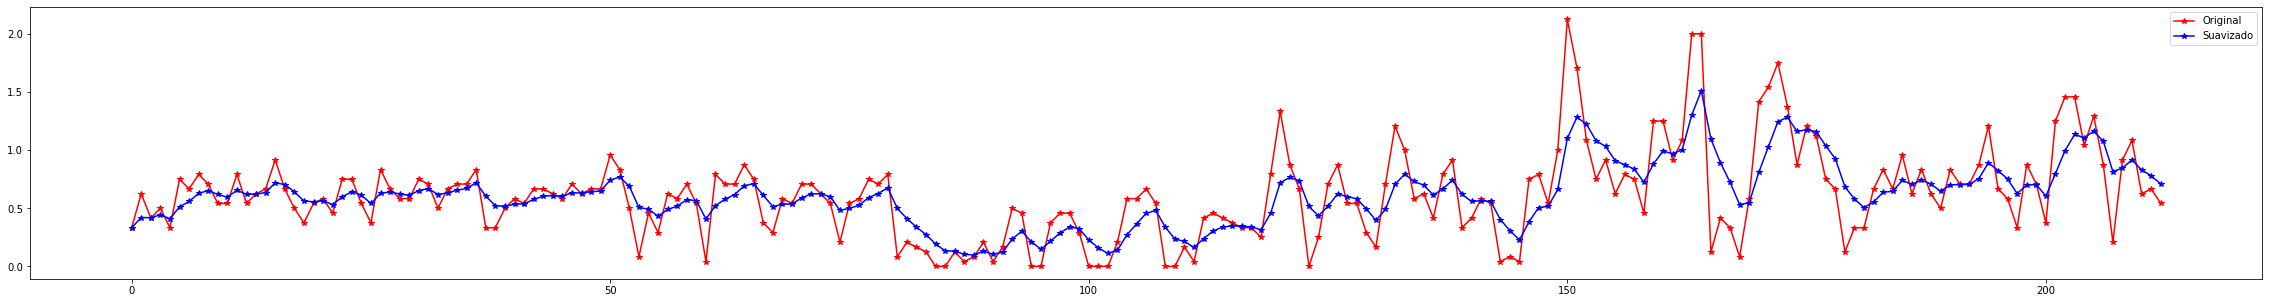

In [208]:
dados_Congonhas_2020_completados_suavizado   = alisar_serie(dados_Congonhas_2020_completados,
                                                            dados_Congonhas_2020_completados_p_values)

## Estação Ibirapuera

MAPE:106.0
MAE:106.0
MQE:106.0


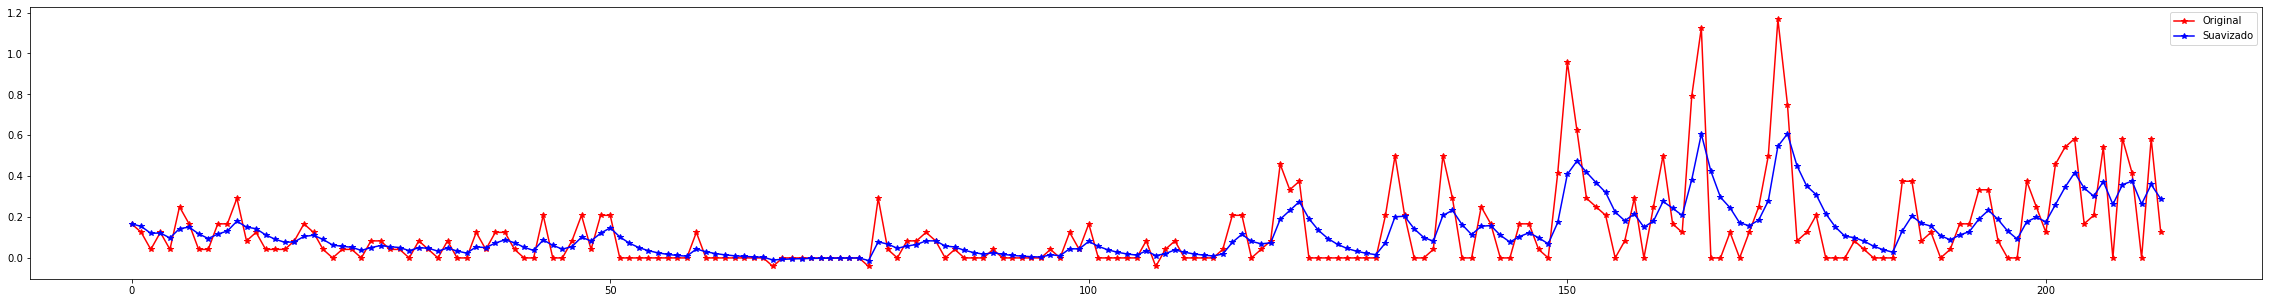

In [209]:
dados_ibirapuera_2020_completados_suavizado  = alisar_serie(dados_ibirapuera_2020_completados,
                                                            dados_ibirapuera_2020_completados_p_values)

## Estação Margem Tietê

MAPE:inf
MAE:0.24461722488038265
MQE:0.09407064061669322


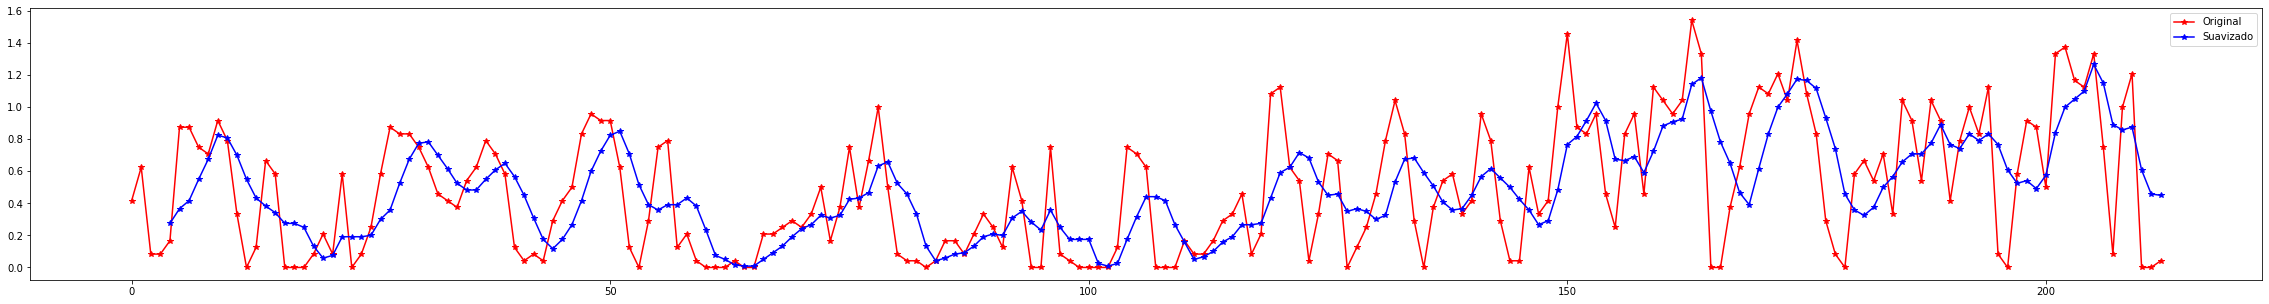

In [210]:
dados_Marg_T_2020_completados_suavizado      = alisar_serie(dados_Marg_T_2020_completados,
                                                            dados_Marg_T_2020_completados_p_values)

## Estação Osasco

MAPE:106.0
MAE:106.0
MQE:106.0


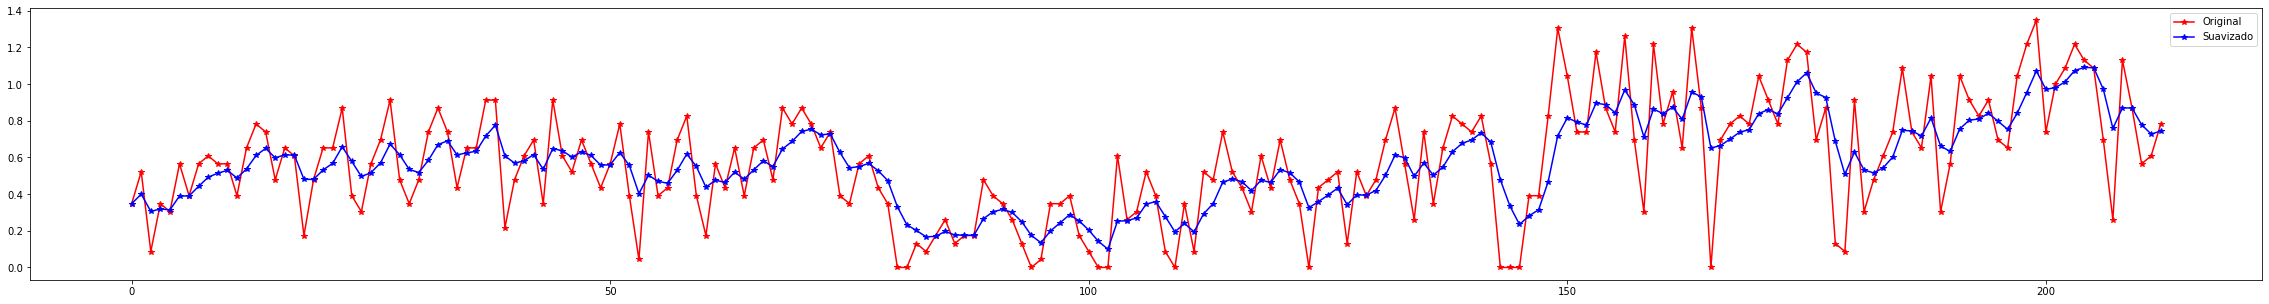

In [211]:
dados_Osasco_2020_completados_suavizado      = alisar_serie(dados_Osasco_2020_completados,
                                                            dados_Osasco_2020_completados_p_values)

## Estação Parque Pedro II

MAPE:106.0
MAE:106.0
MQE:106.0


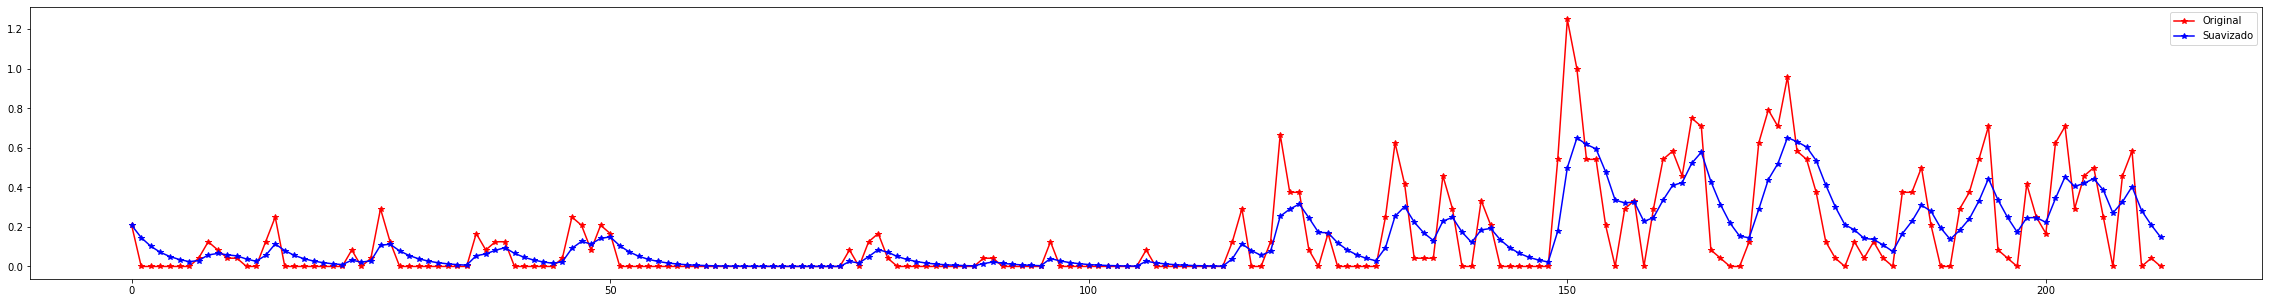

In [212]:
dados_P_Pedro_2020_completados_suavizado     = alisar_serie(dados_P_Pedro_2020_completados,
                                                            dados_P_Pedro_2020_completados_p_values)

## Estação Pinheiro

MAPE:nan
MAE:0.1756379585326953
MQE:0.05419424508240297


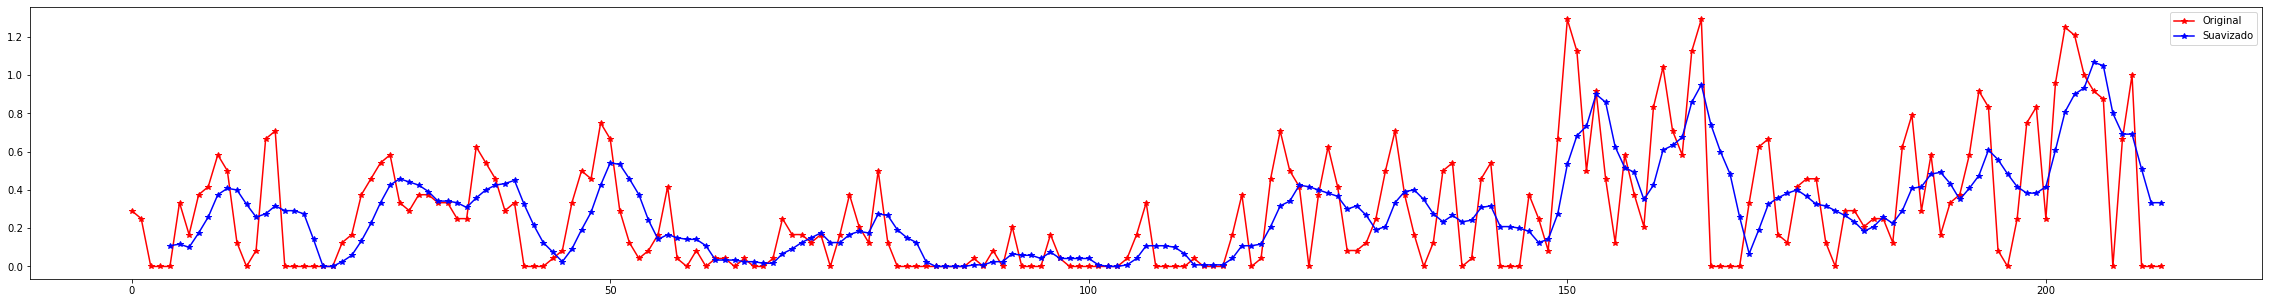

In [213]:
dados_Pinheiros_2020_completados_suavizado   = alisar_serie(dados_Pinheiros_2020_completados,
                                                            dados_Pinheiros_2020_completados_p_values)

## Estação Santo Amaro

MAPE:inf
MAE:0.1416666666666667
MQE:0.03558845029239766


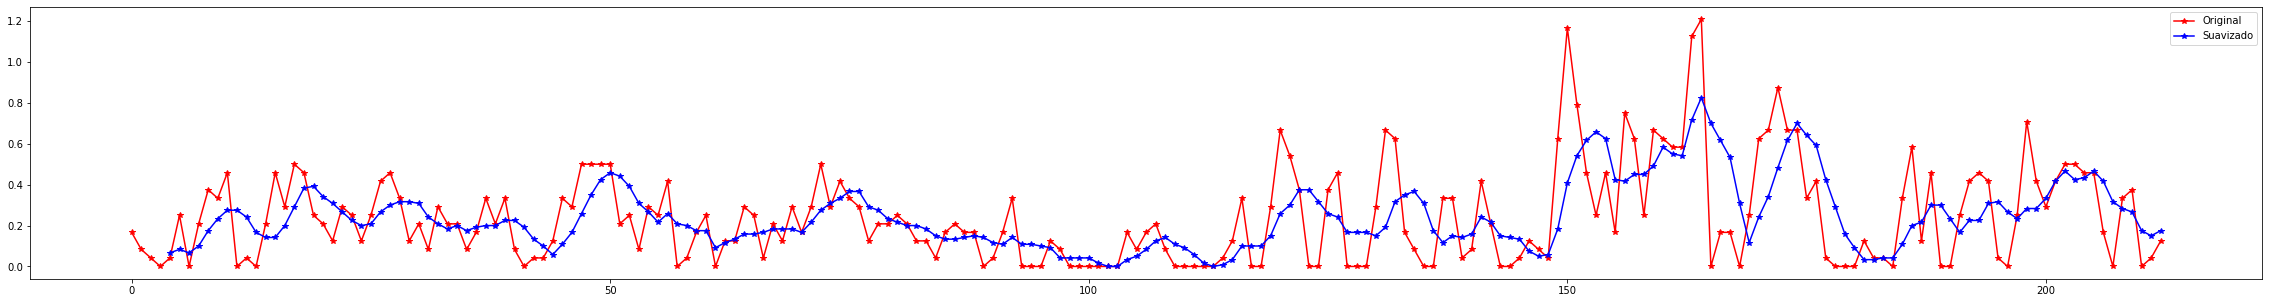

In [214]:
dados_Santo_Amaro_2020_completados_suavizado = alisar_serie(dados_Santo_Amaro_2020_completados,
                                                            dados_Santo_Amaro_2020_completados_p_values)

# Decomposição da série: retirando tendência, sazonalidade, ciclo e irregularidades

## Estação Cerqueria

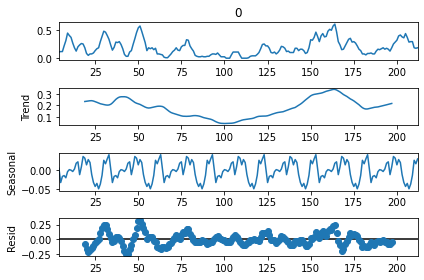

In [215]:
dados_Cerqueria_2020_completados_decmp   = seasonal_decompose(dados_Cerqueria_2020_completados_suavizado,
                                                              period=30)
dados_Cerqueria_2020_completados_decmp.plot();

## Estação Congonhas

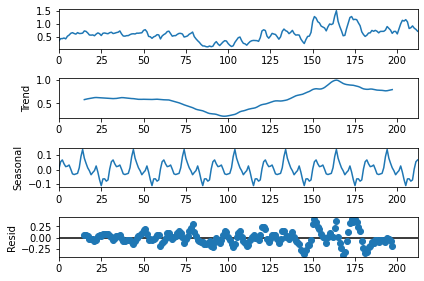

In [216]:
dados_Congonhas_2020_completados_decmp   = seasonal_decompose(dados_Congonhas_2020_completados_suavizado,
                                                              period=30)
dados_Congonhas_2020_completados_decmp.plot();

## Estação Ibirapuera

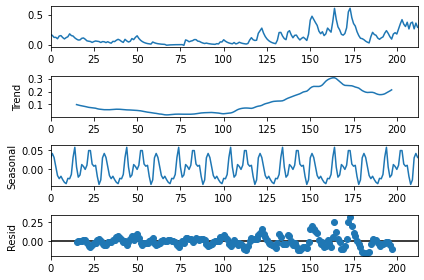

In [217]:
dados_ibirapuera_2020_completados_decmp  = seasonal_decompose(dados_ibirapuera_2020_completados_suavizado,
                                                              period=30)
dados_ibirapuera_2020_completados_decmp.plot();

## Estação Margem Tietê

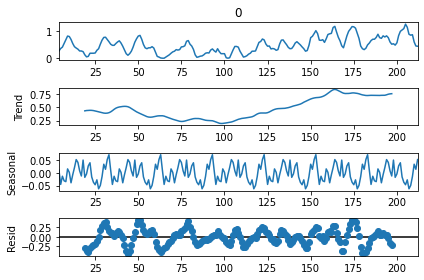

In [218]:
dados_Marg_T_2020_completados_decmp      = seasonal_decompose(dados_Marg_T_2020_completados_suavizado,
                                                              period=30)
dados_Marg_T_2020_completados_decmp.plot();

## Estação Osasco

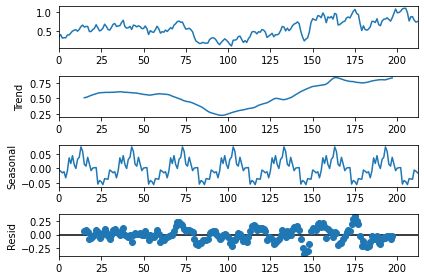

In [219]:
dados_Osasco_2020_completados_decmp      = seasonal_decompose(dados_Osasco_2020_completados_suavizado,
                                                              period=30)
dados_Osasco_2020_completados_decmp.plot();

## Estação Parque Pedro II

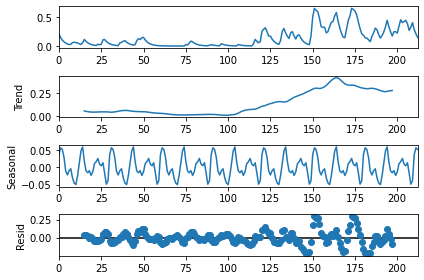

In [220]:
dados_P_Pedro_2020_completados_decmp     = seasonal_decompose(dados_P_Pedro_2020_completados_suavizado,
                                                              period=30)
dados_P_Pedro_2020_completados_decmp.plot();

## Estação Pinheiro

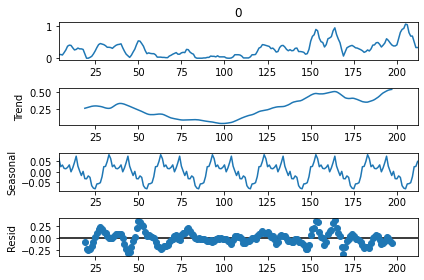

In [221]:
dados_Pinheiros_2020_completados_decmp   = seasonal_decompose(dados_Pinheiros_2020_completados_suavizado,
                                                              period=30)
dados_Pinheiros_2020_completados_decmp.plot();

## Estação Santo Amaro

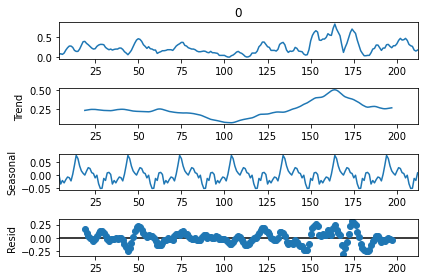

In [222]:
dados_Santo_Amaro_2020_completados_decmp = seasonal_decompose(dados_Santo_Amaro_2020_completados_suavizado,
                                                              period=30)
dados_Santo_Amaro_2020_completados_decmp.plot();

# Calculando a autocorrelação da série

## Estação Cerqueria

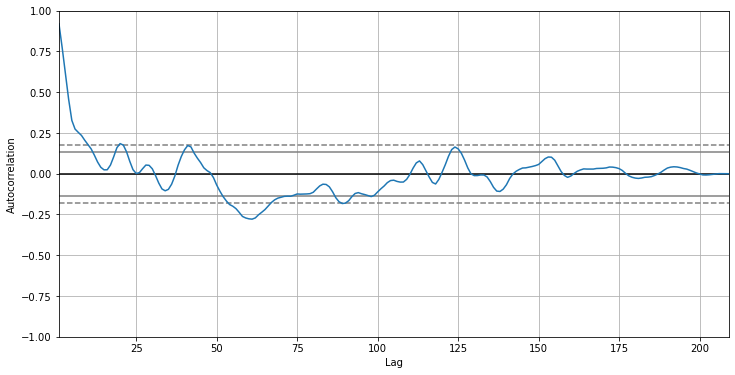

In [223]:
plt.figure(figsize=(12,6))
autocorrelation_plot(dados_Cerqueria_2020_completados_suavizado)

## Estação Congonhas

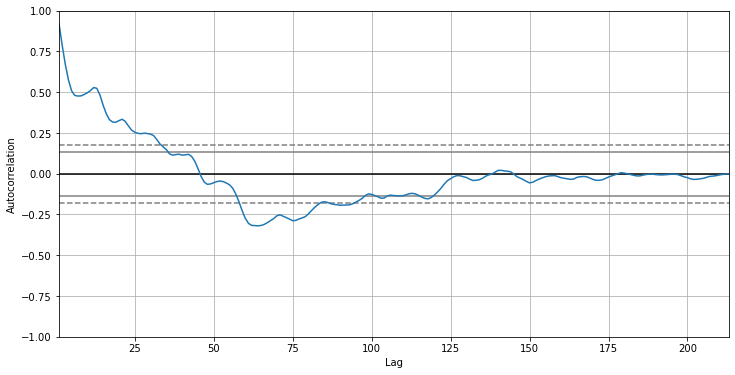

In [224]:
plt.figure(figsize=(12,6))
autocorrelation_plot(dados_Congonhas_2020_completados_suavizado)

## Estação Ibirapuera

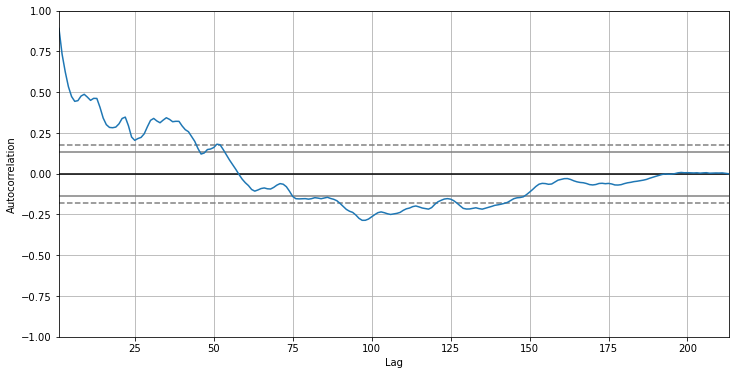

In [225]:
plt.figure(figsize=(12,6))
autocorrelation_plot(dados_ibirapuera_2020_completados_suavizado)

## Estação  Margem Tietê

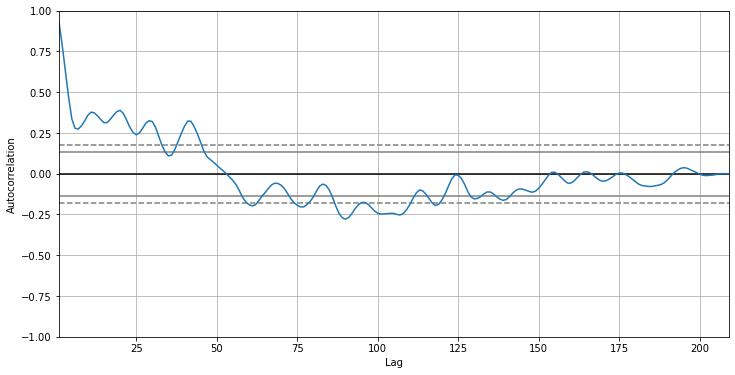

In [226]:
plt.figure(figsize=(12,6))
autocorrelation_plot(dados_Marg_T_2020_completados_suavizado)

## Estação Osasco

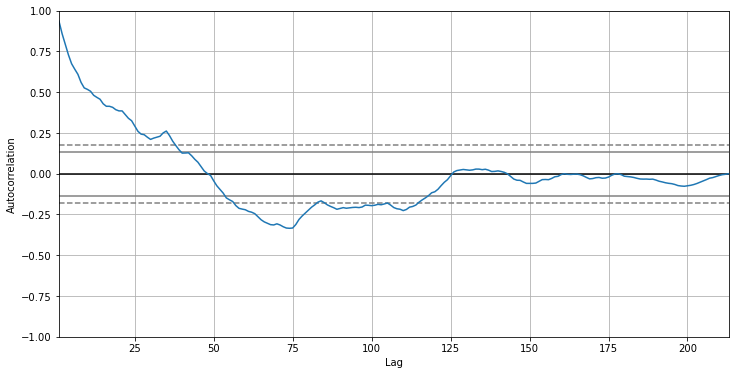

In [227]:
plt.figure(figsize=(12,6))
autocorrelation_plot(dados_Osasco_2020_completados_suavizado)

## Estação Parque Pedro II

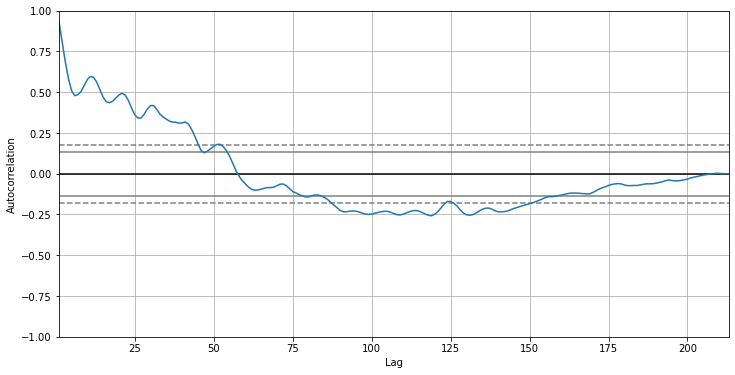

In [228]:
plt.figure(figsize=(12,6))
autocorrelation_plot(dados_P_Pedro_2020_completados_suavizado)

## Estação Pinheiro

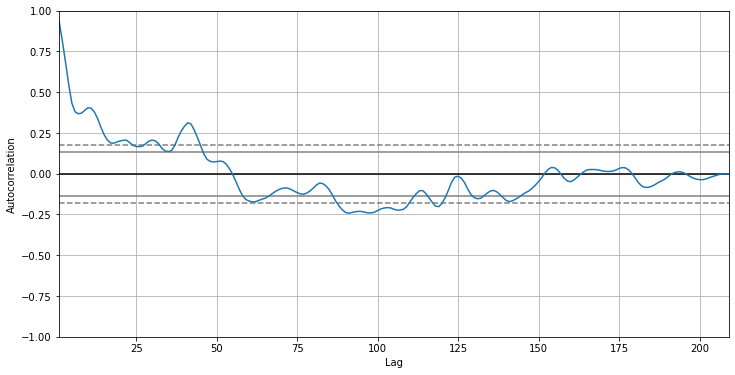

In [229]:
plt.figure(figsize=(12,6))
autocorrelation_plot(dados_Pinheiros_2020_completados_suavizado)

## Estação Santo Amaro

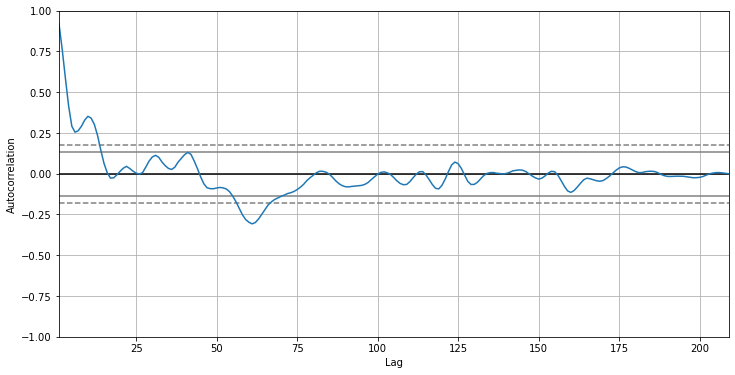

In [230]:
plt.figure(figsize=(12,6))
autocorrelation_plot(dados_Santo_Amaro_2020_completados_suavizado)

# Calculando a velocidade de mudança dos dados da série

### <span style='color:red'>Para vizualizar melhor os gráficos clique duas vezes neles</span>

## Estação Cerqueria

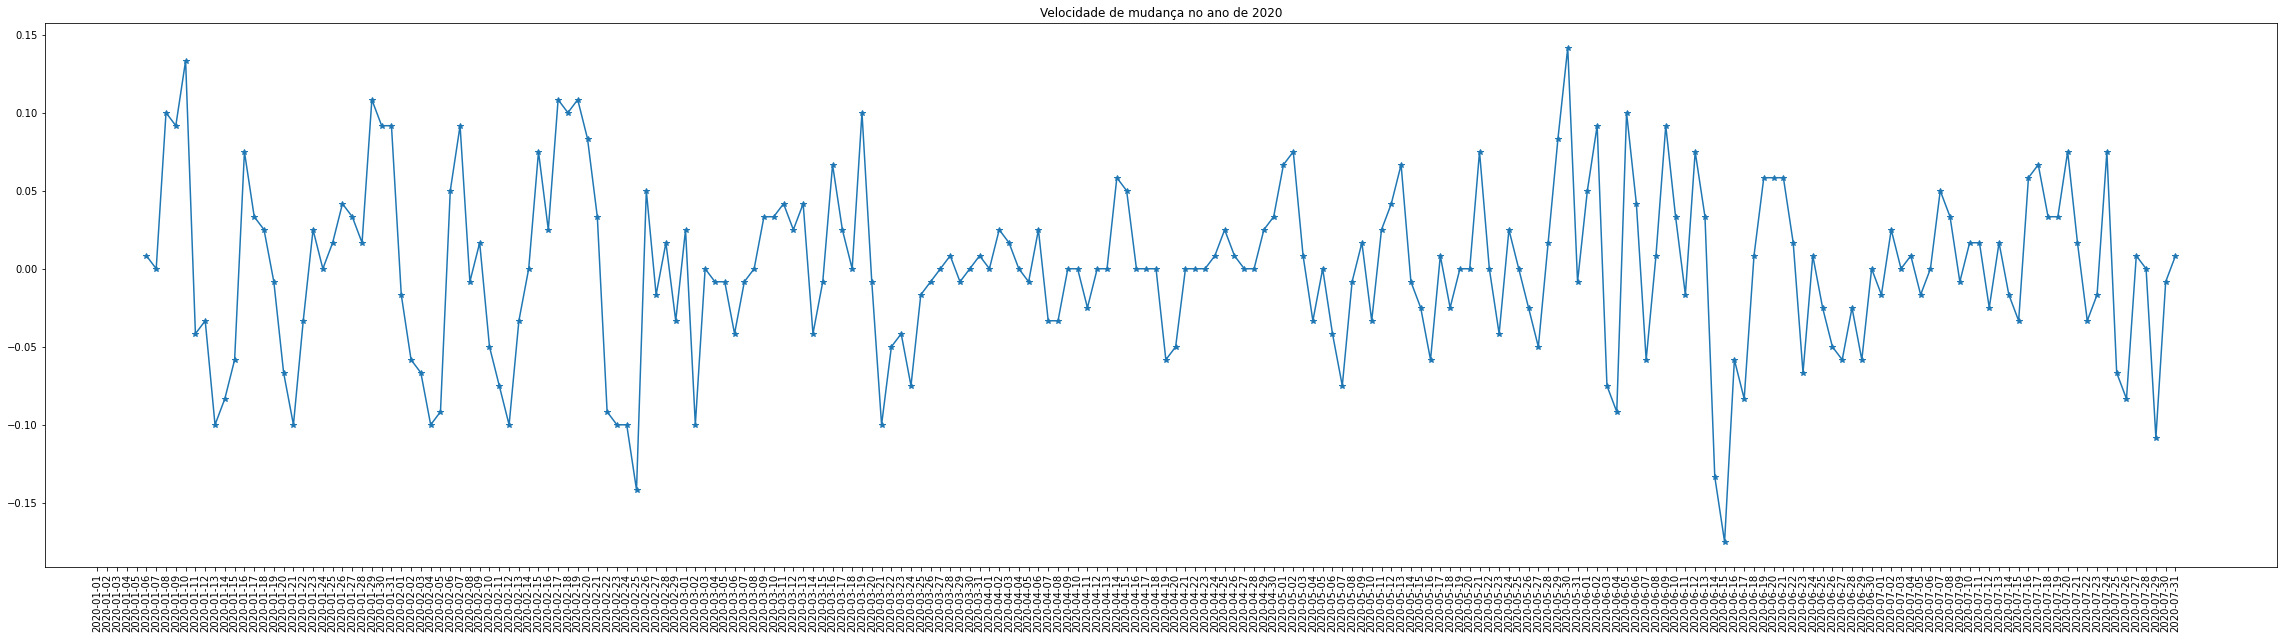

In [231]:
plt.figure(figsize=(40,10))
plt.title('Velocidade de mudança no ano de 2020')
plt.xticks([i for i in range(213)],[i[0] for i in eixo_2020.values],rotation=90)
plt.plot(dados_Cerqueria_2020_completados_suavizado.diff(),'*-')
plt.show()

## Estação Congonhas

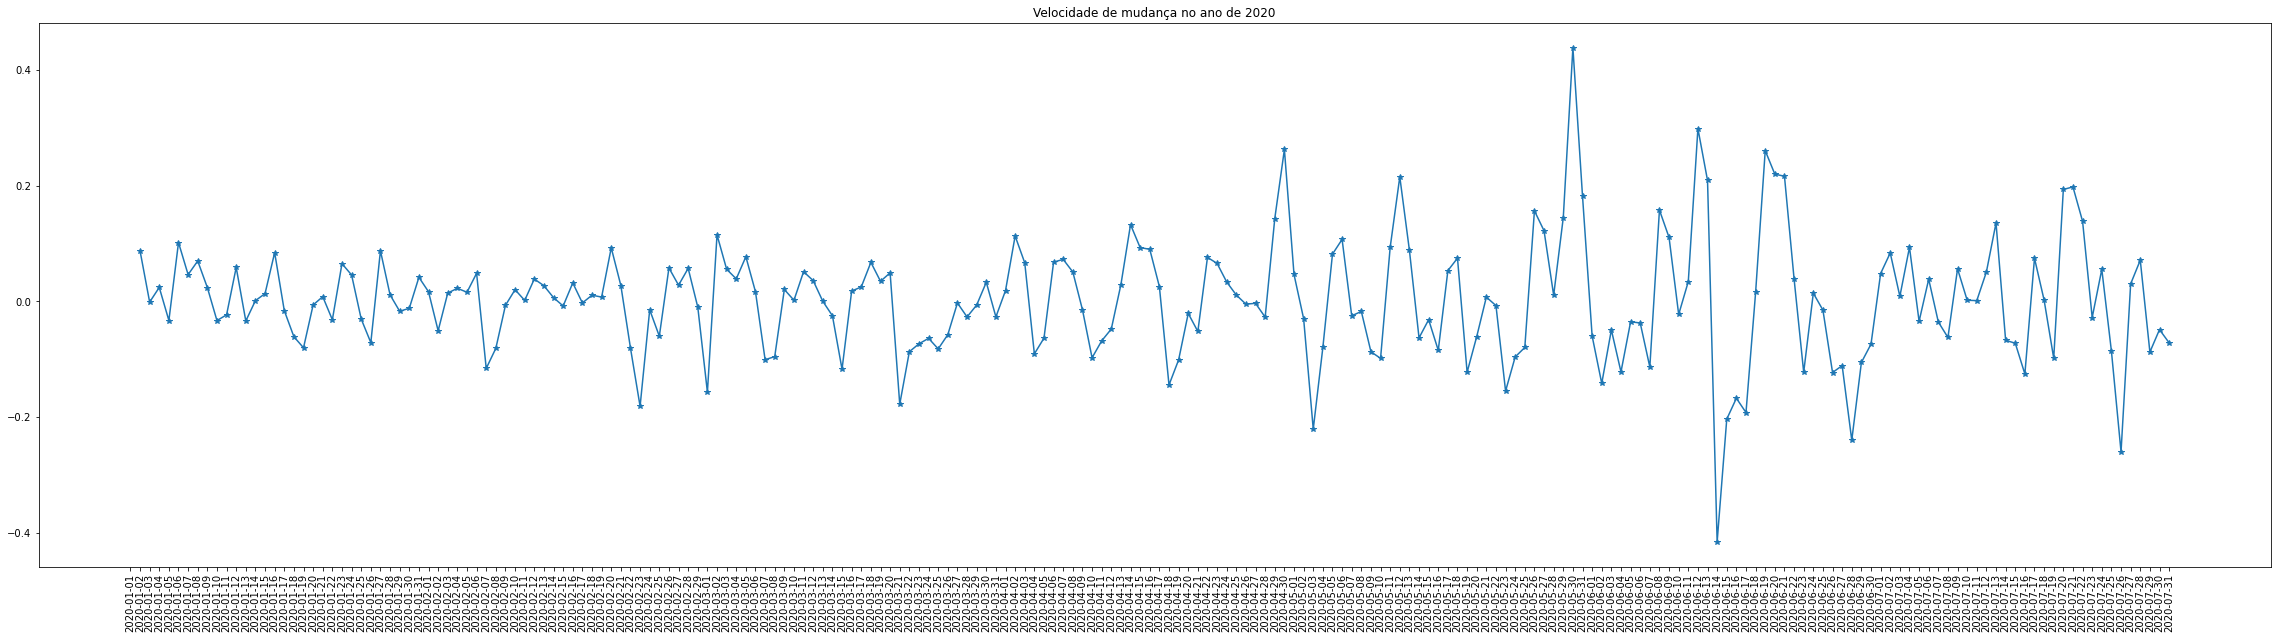

In [232]:
plt.figure(figsize=(40,10))
plt.title('Velocidade de mudança no ano de 2020')
plt.xticks([i for i in range(213)],[i[0] for i in eixo_2020.values],rotation=90)
plt.plot(dados_Congonhas_2020_completados_suavizado.diff(),'*-')
plt.show()

## Estação Ibirapuera

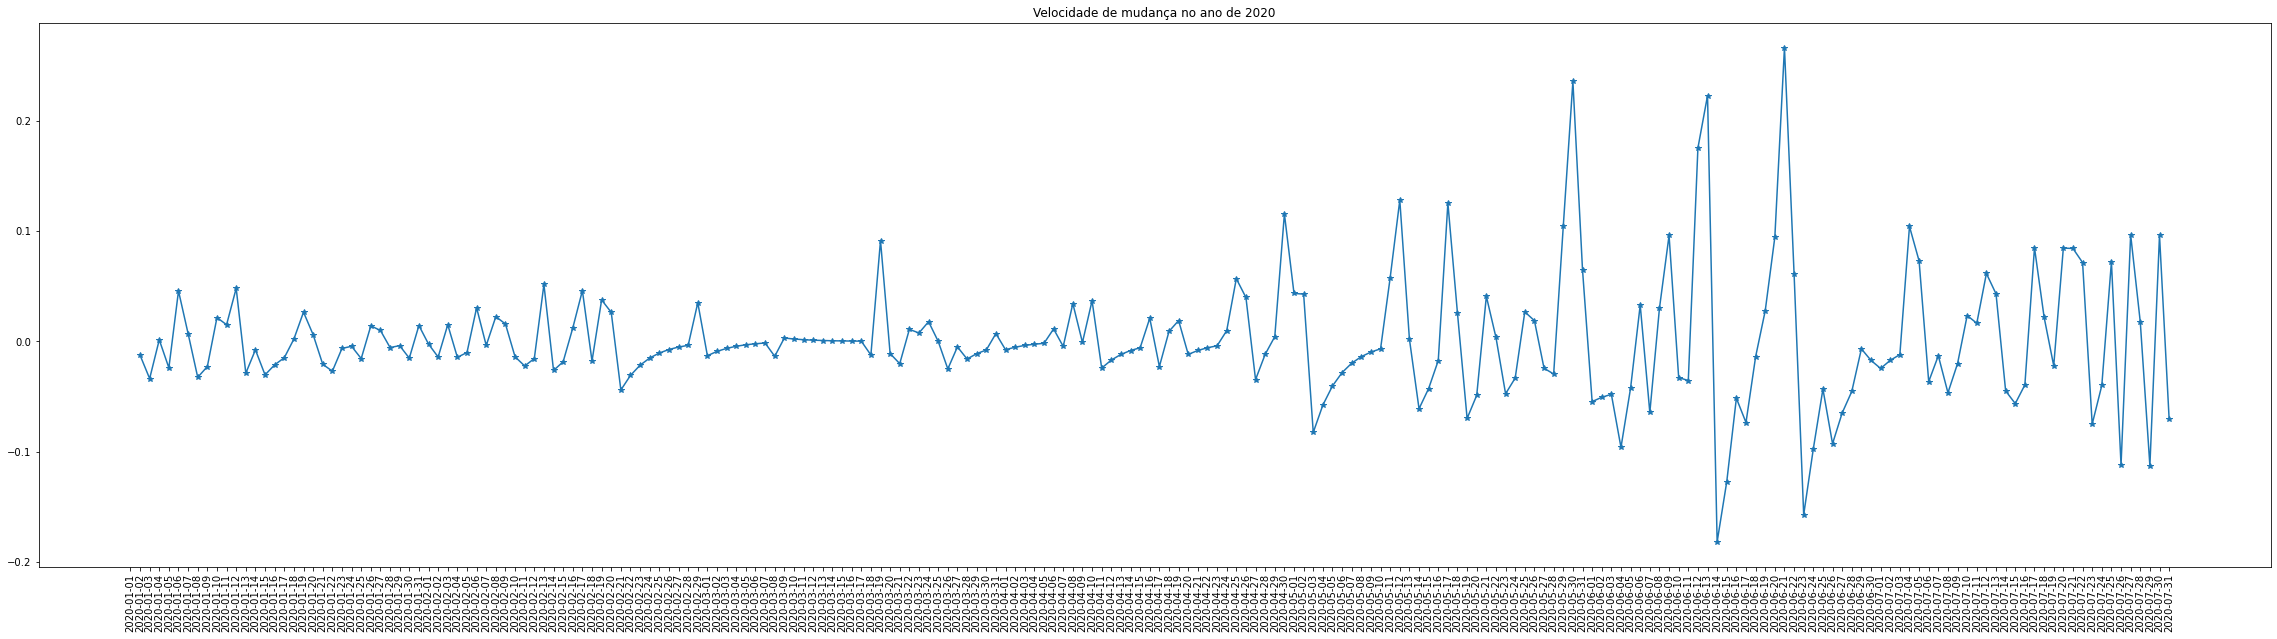

In [233]:
plt.figure(figsize=(40,10))
plt.title('Velocidade de mudança no ano de 2020')
plt.xticks([i for i in range(213)],[i[0] for i in eixo_2020.values],rotation=90)
plt.plot(dados_ibirapuera_2020_completados_suavizado.diff(),'*-')
plt.show()

## Estação  Margem Tietê

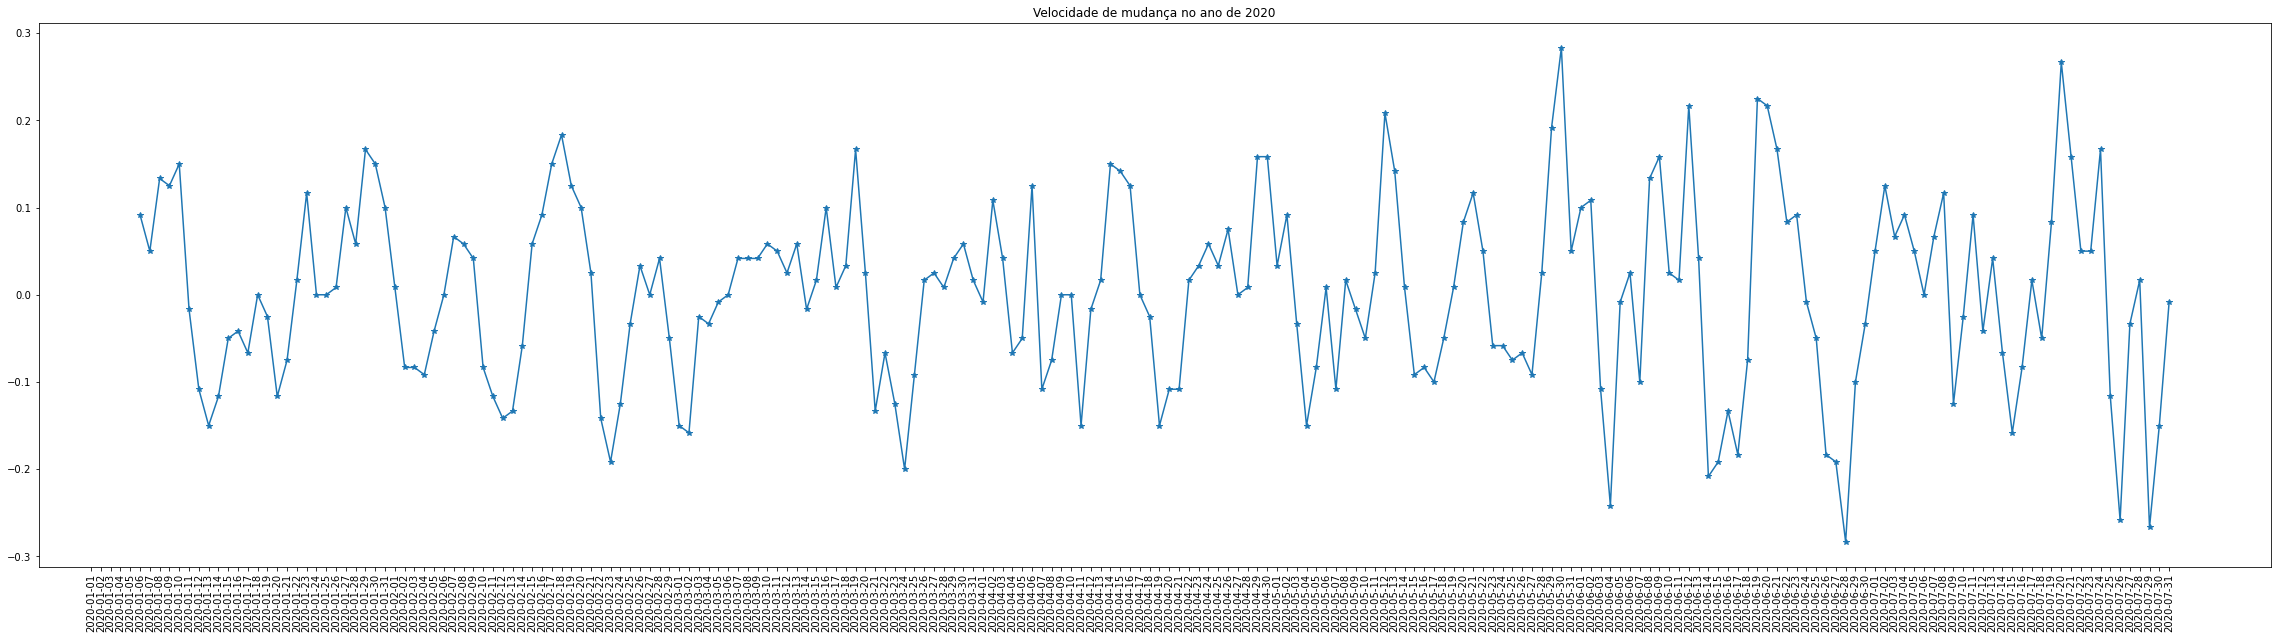

In [234]:
plt.figure(figsize=(40,10))
plt.title('Velocidade de mudança no ano de 2020')
plt.xticks([i for i in range(213)],[i[0] for i in eixo_2020.values],rotation=90)
plt.plot(dados_Marg_T_2020_completados_suavizado.diff(),'*-')
plt.show()

## Estação Osasco

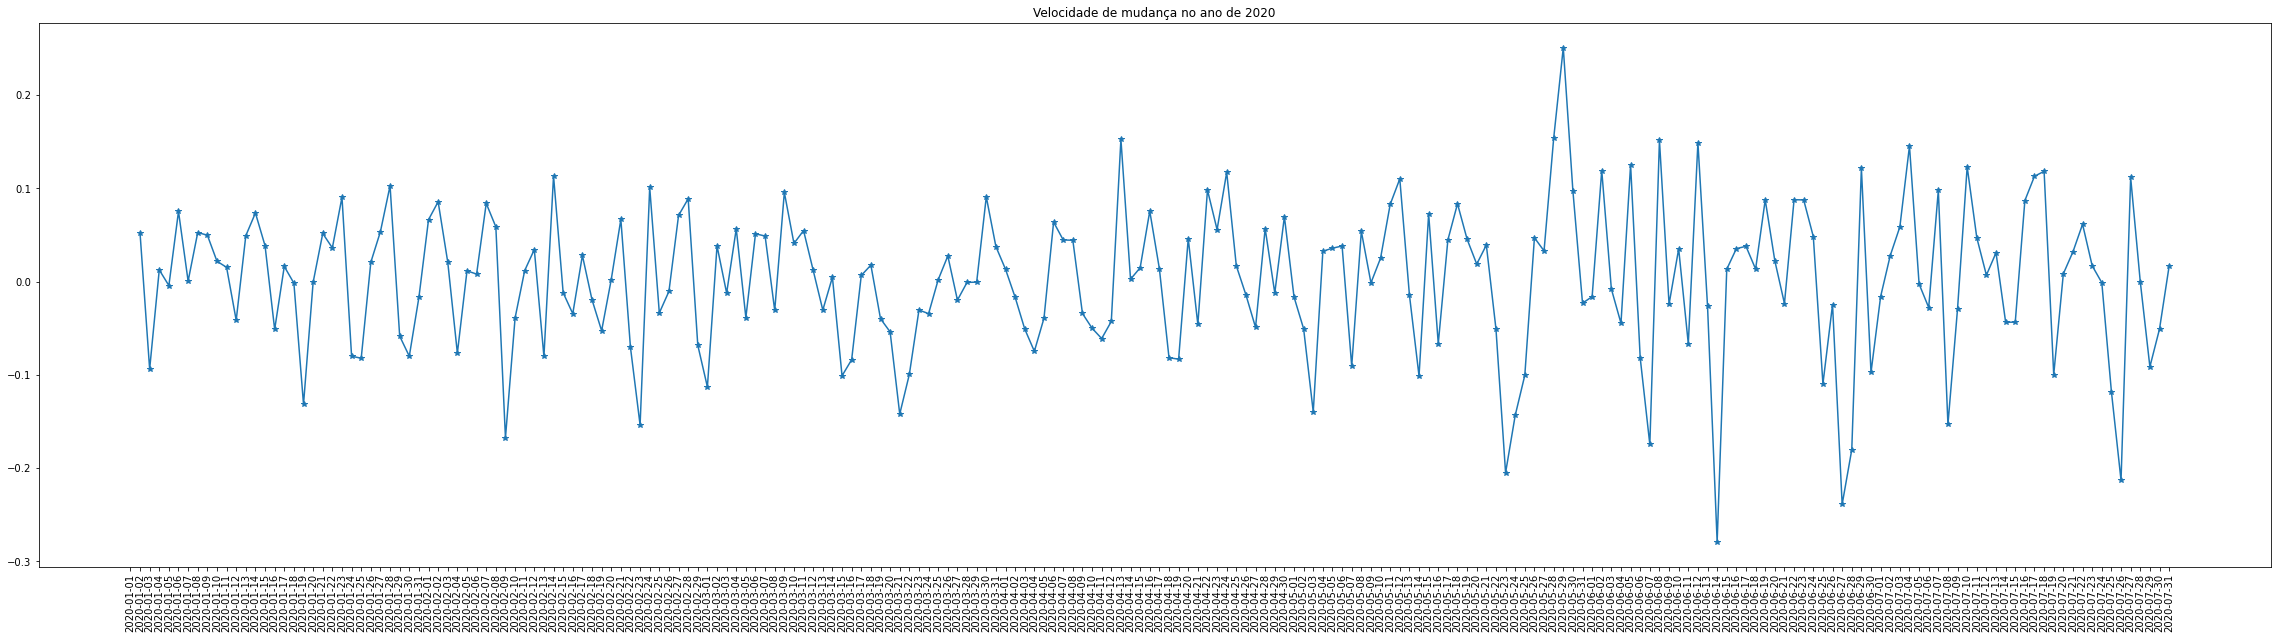

In [235]:
plt.figure(figsize=(40,10))
plt.title('Velocidade de mudança no ano de 2020')
plt.xticks([i for i in range(213)],[i[0] for i in eixo_2020.values],rotation=90)
plt.plot(dados_Osasco_2020_completados_suavizado.diff(),'*-')
plt.show()

## Estação Parque Pedro II

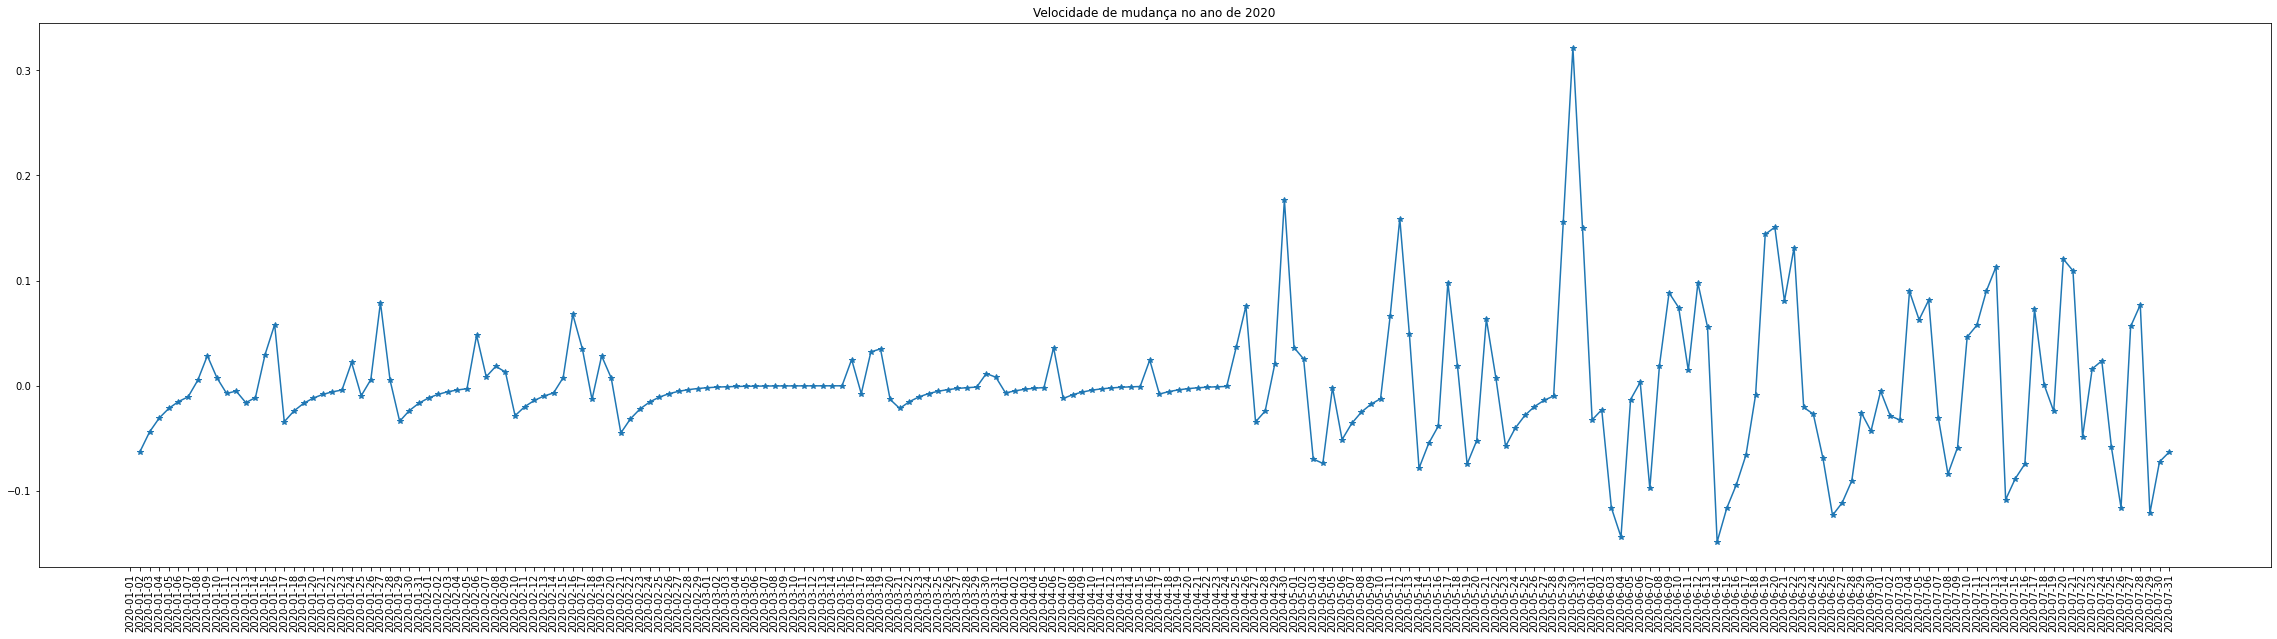

In [236]:
plt.figure(figsize=(40,10))
plt.title('Velocidade de mudança no ano de 2020')
plt.xticks([i for i in range(213)],[i[0] for i in eixo_2020.values],rotation=90)
plt.plot(dados_P_Pedro_2020_completados_suavizado.diff(),'*-')
plt.show()

## Estação Pinheiro

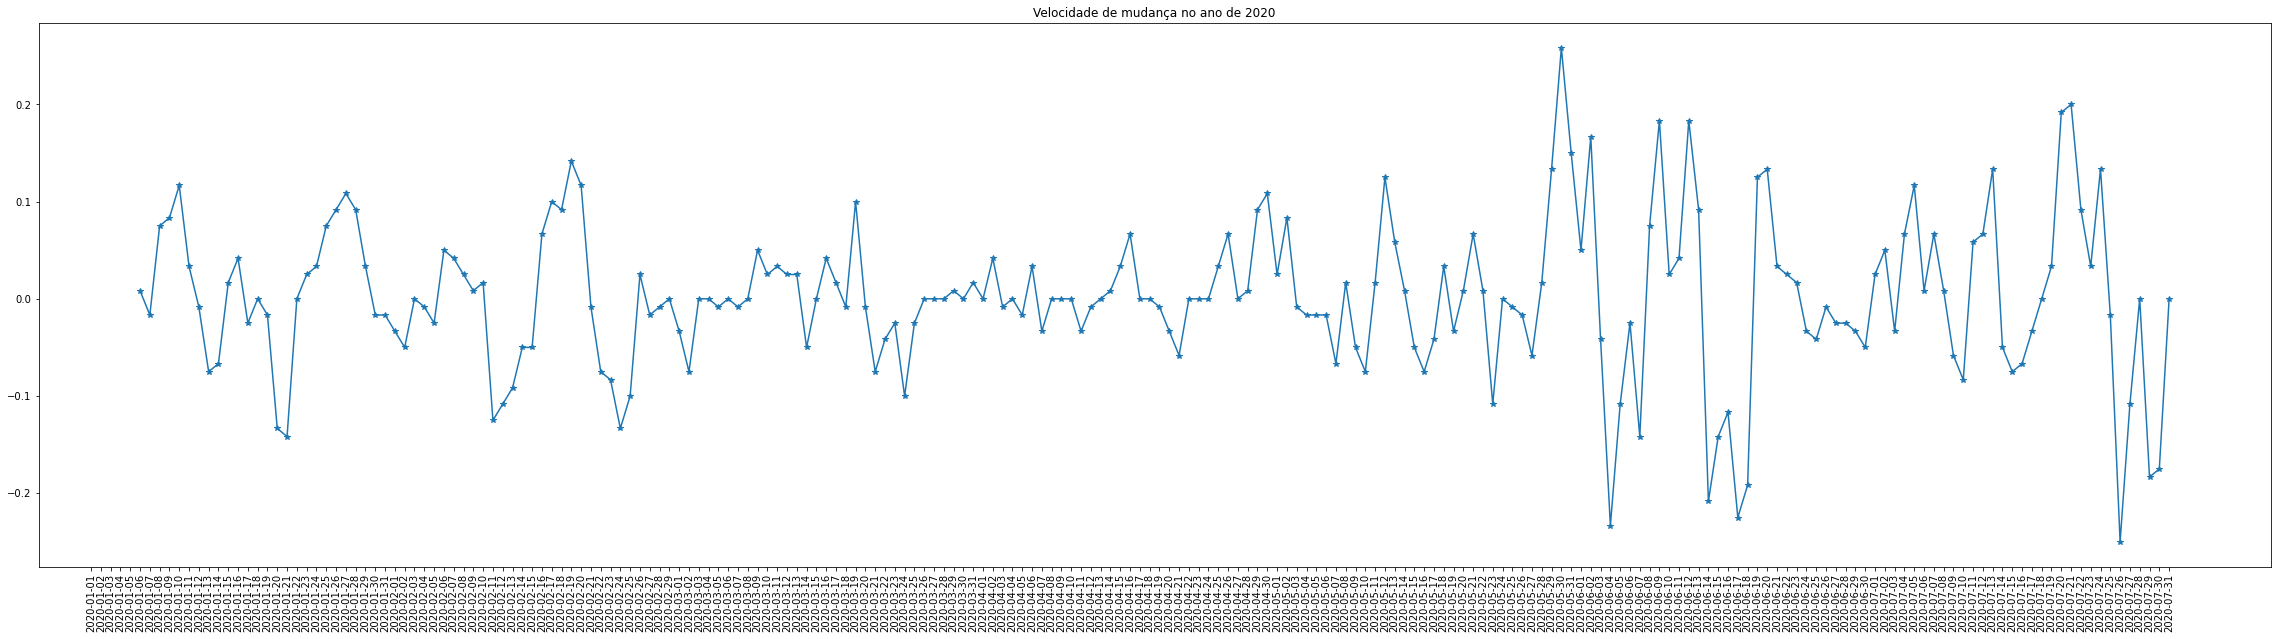

In [237]:
plt.figure(figsize=(40,10))
plt.title('Velocidade de mudança no ano de 2020')
plt.xticks([i for i in range(213)],[i[0] for i in eixo_2020.values],rotation=90)
plt.plot(dados_Pinheiros_2020_completados_suavizado.diff(),'*-')
plt.show()

## Estação Santo Amaro

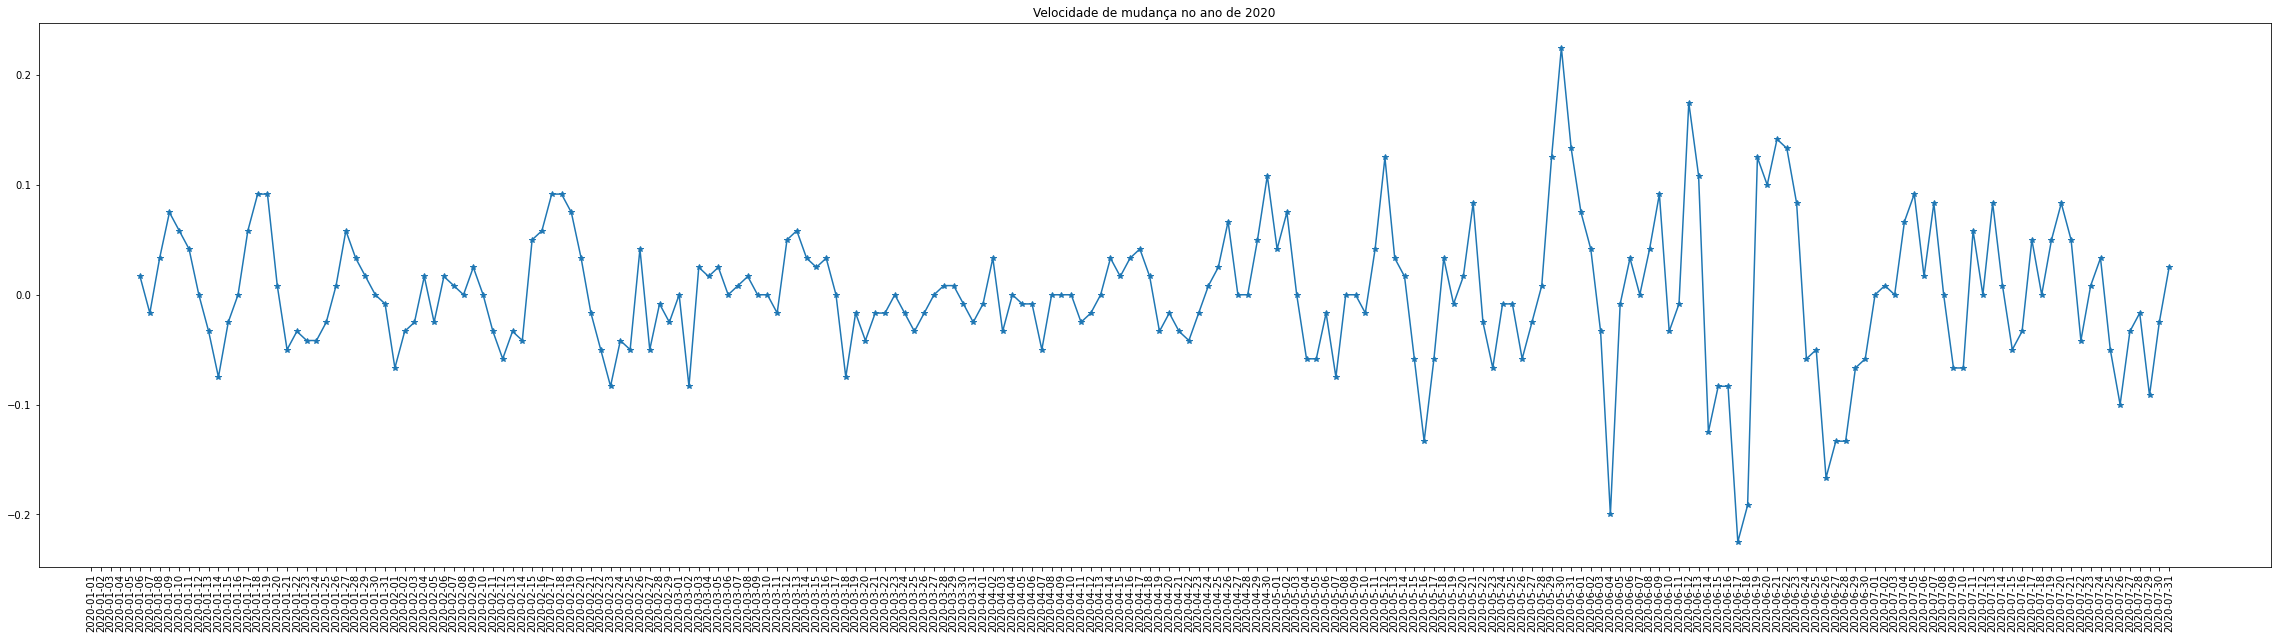

In [238]:
plt.figure(figsize=(40,10))
plt.title('Velocidade de mudança no ano de 2020')
plt.xticks([i for i in range(213)],[i[0] for i in eixo_2020.values],rotation=90)
plt.plot(dados_Santo_Amaro_2020_completados_suavizado.diff(),'*-')
plt.show()

# Calculando a aceleração de mudança dos dados da série

## Estação Cerqueria

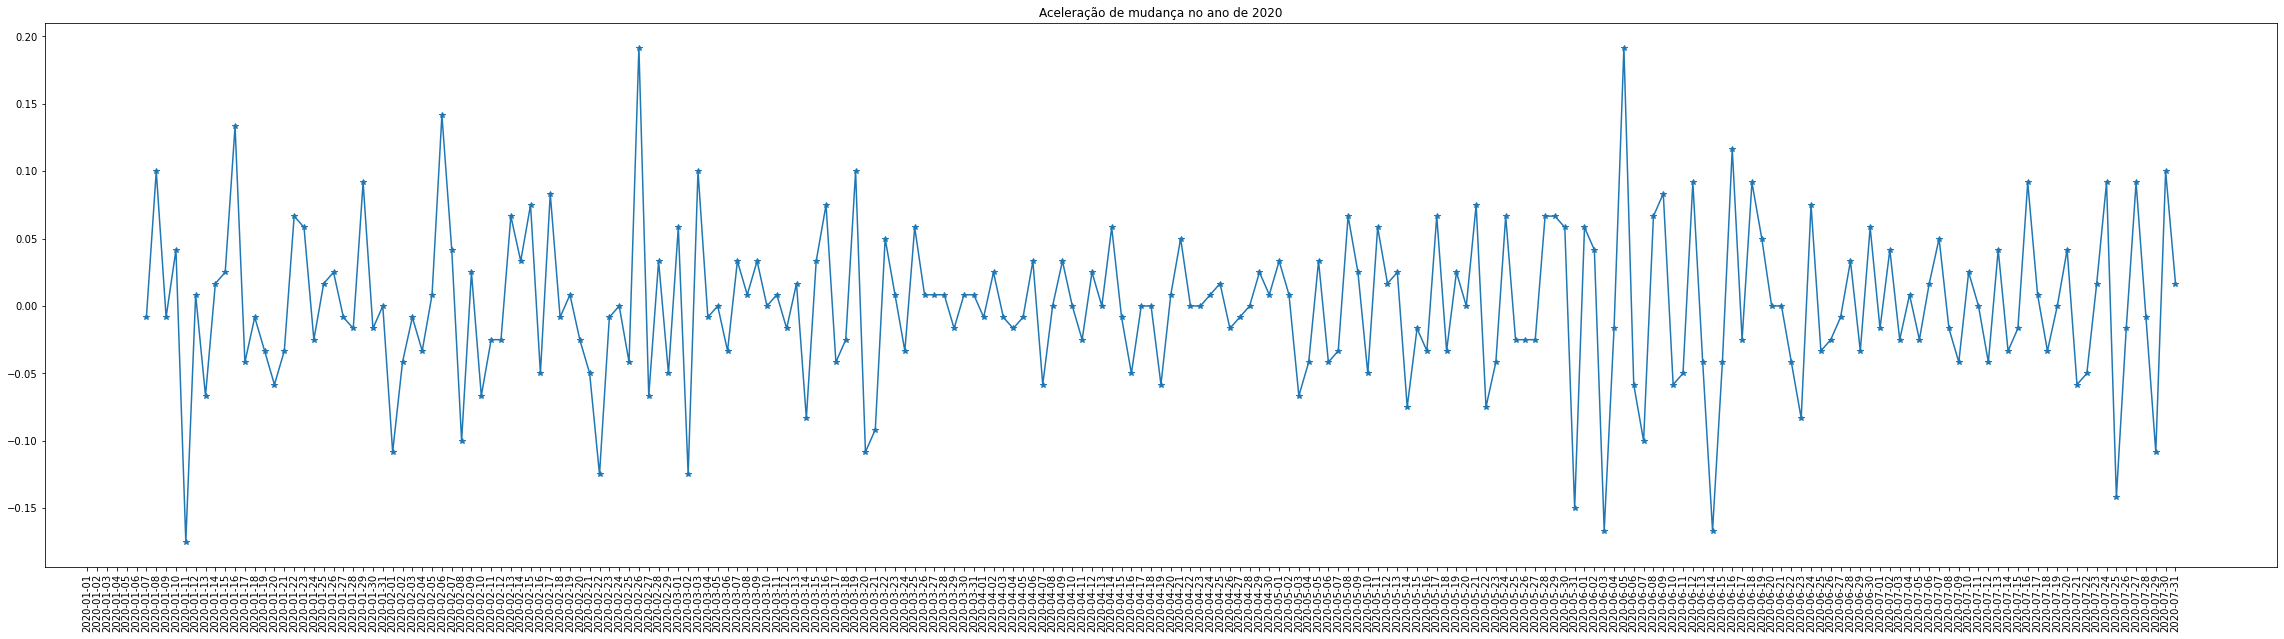

In [239]:
plt.figure(figsize=(40,10))
plt.title('Aceleração de mudança no ano de 2020')
plt.xticks([i for i in range(213)],[i[0] for i in eixo_2020.values],rotation=90)
velocidade = dados_Cerqueria_2020_completados_suavizado.diff()
plt.plot(velocidade.diff(),'*-')
plt.show()

## Estação Congonhas

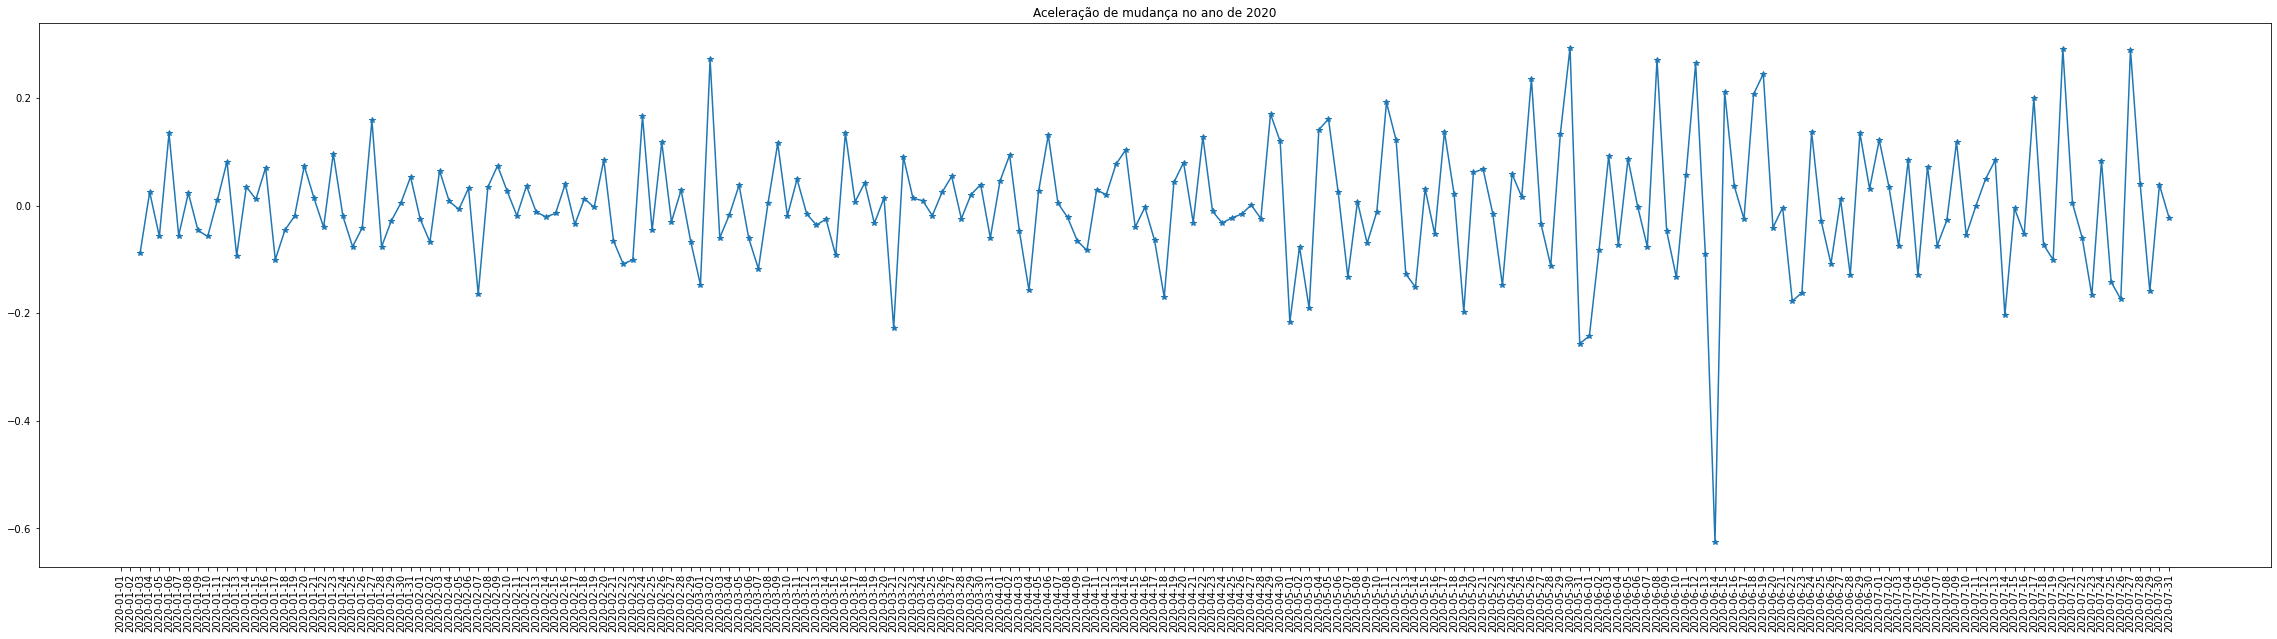

In [240]:
plt.figure(figsize=(40,10))
plt.title('Aceleração de mudança no ano de 2020')
plt.xticks([i for i in range(213)],[i[0] for i in eixo_2020.values],rotation=90)
velocidade = dados_Congonhas_2020_completados_suavizado.diff()
plt.plot(velocidade.diff(),'*-')
plt.show()

## Estação Ibirapuera

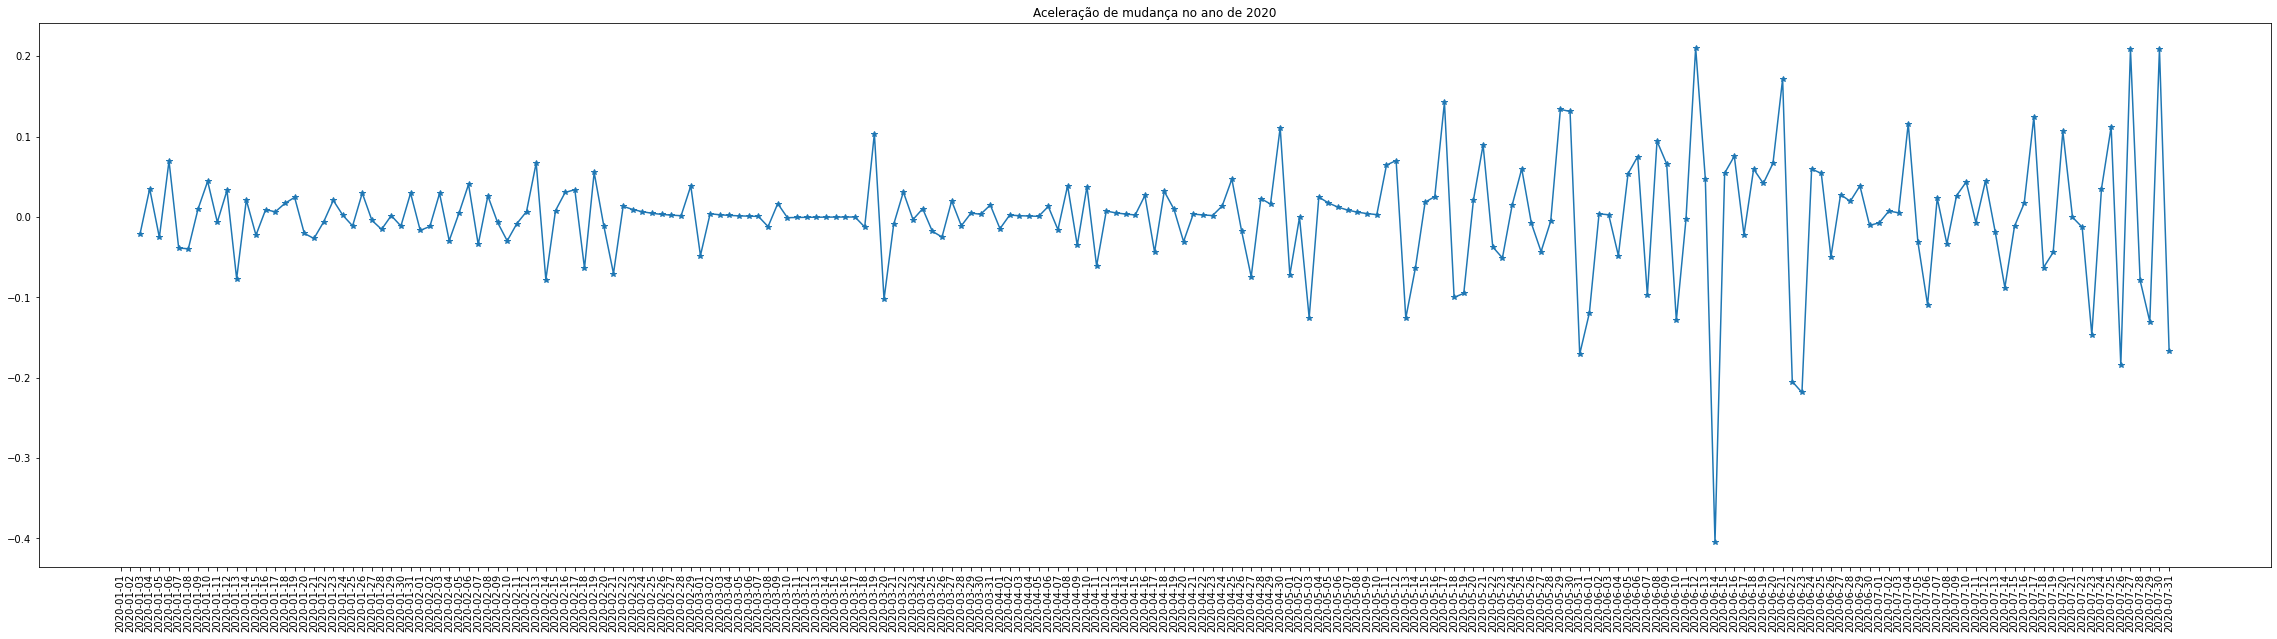

In [241]:
plt.figure(figsize=(40,10))
plt.title('Aceleração de mudança no ano de 2020')
plt.xticks([i for i in range(213)],[i[0] for i in eixo_2020.values],rotation=90)
velocidade = dados_ibirapuera_2020_completados_suavizado.diff()
plt.plot(velocidade.diff(),'*-')
plt.show()

## Estação  Margem Tietê

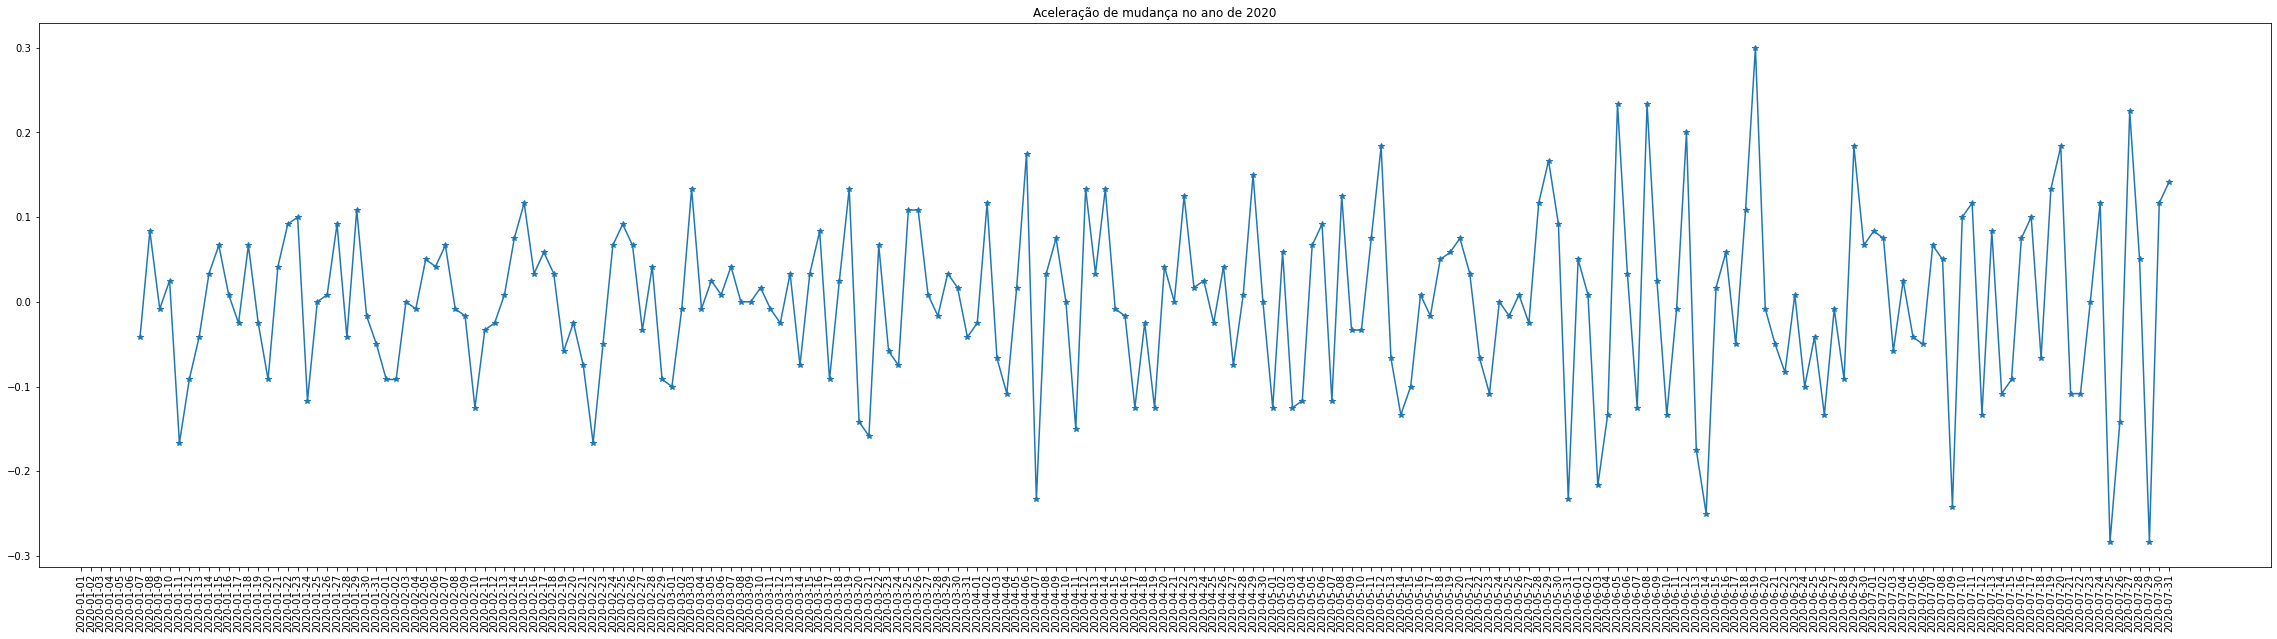

In [242]:
plt.figure(figsize=(40,10))
plt.title('Aceleração de mudança no ano de 2020')
plt.xticks([i for i in range(213)],[i[0] for i in eixo_2020.values],rotation=90)
velocidade = dados_Marg_T_2020_completados_suavizado.diff()
plt.plot(velocidade.diff(),'*-')
plt.show()

## Estação Osasco

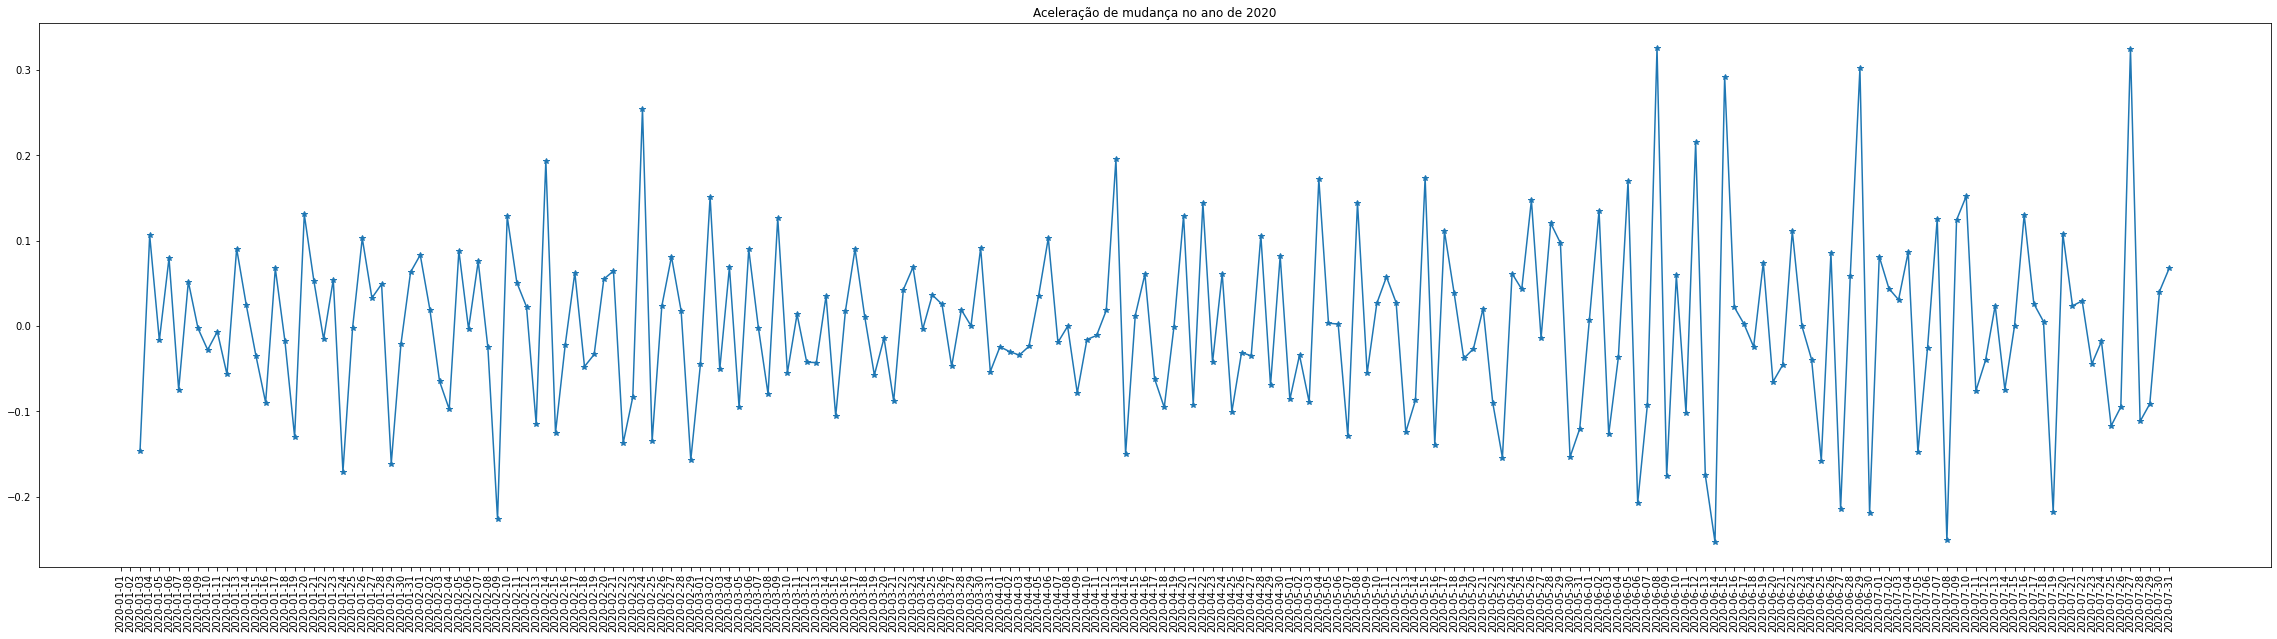

In [243]:
plt.figure(figsize=(40,10))
plt.title('Aceleração de mudança no ano de 2020')
plt.xticks([i for i in range(213)],[i[0] for i in eixo_2020.values],rotation=90)
velocidade = dados_Osasco_2020_completados_suavizado.diff()
plt.plot(velocidade.diff(),'*-')
plt.show()

## Estação Parque Pedro II

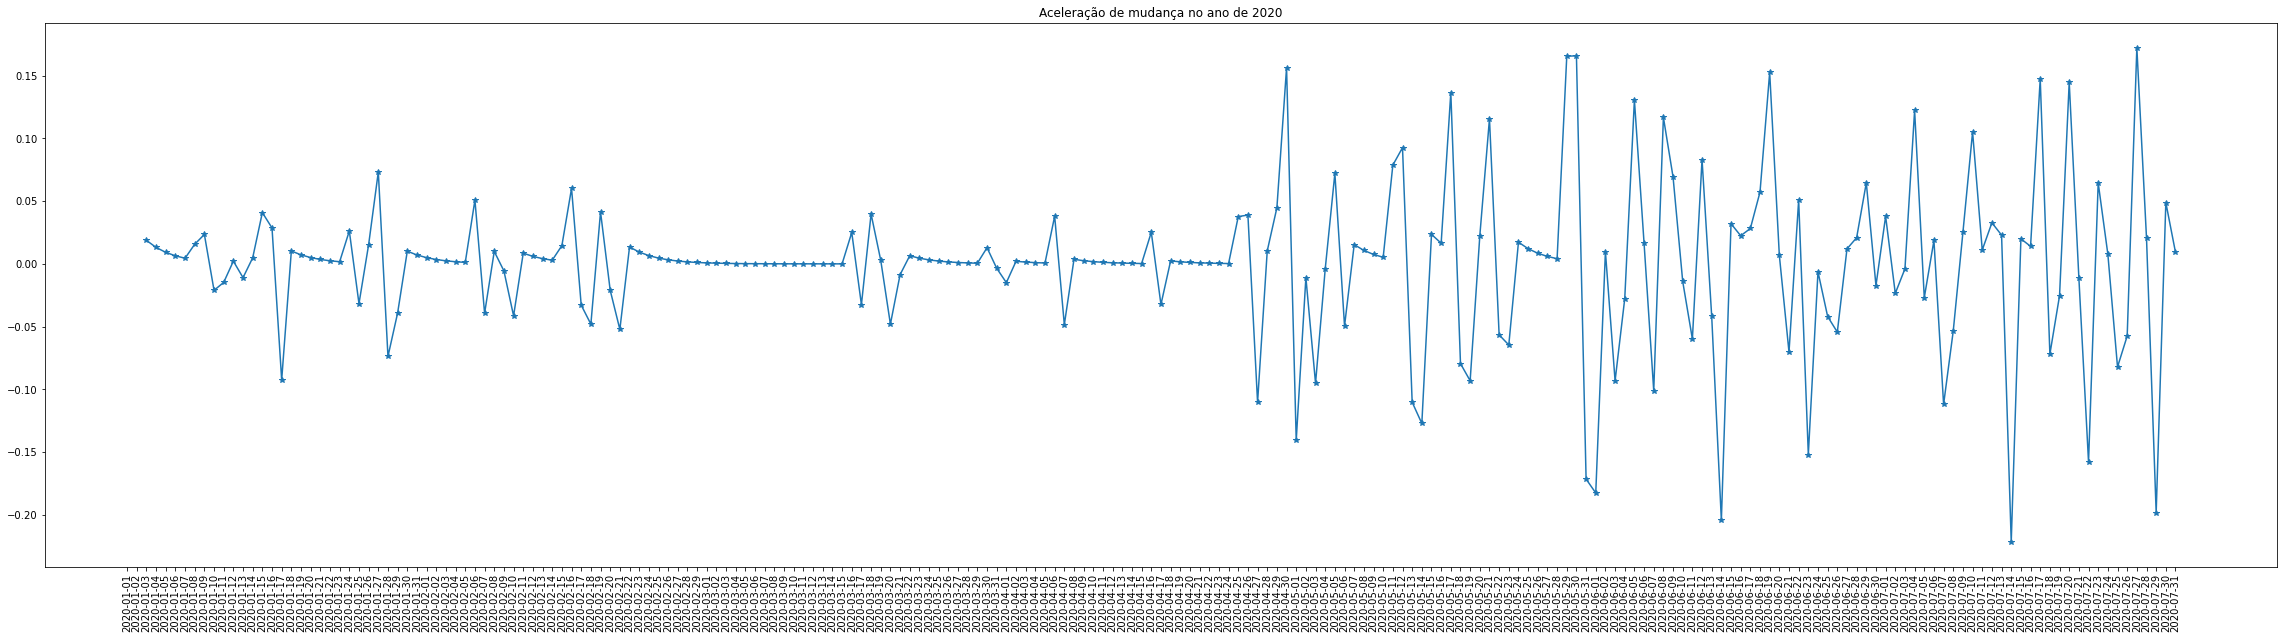

In [244]:
plt.figure(figsize=(40,10))
plt.title('Aceleração de mudança no ano de 2020')
plt.xticks([i for i in range(213)],[i[0] for i in eixo_2020.values],rotation=90)
velocidade = dados_P_Pedro_2020_completados_suavizado.diff()
plt.plot(velocidade.diff(),'*-')
plt.show()

## Estação Pinheiro

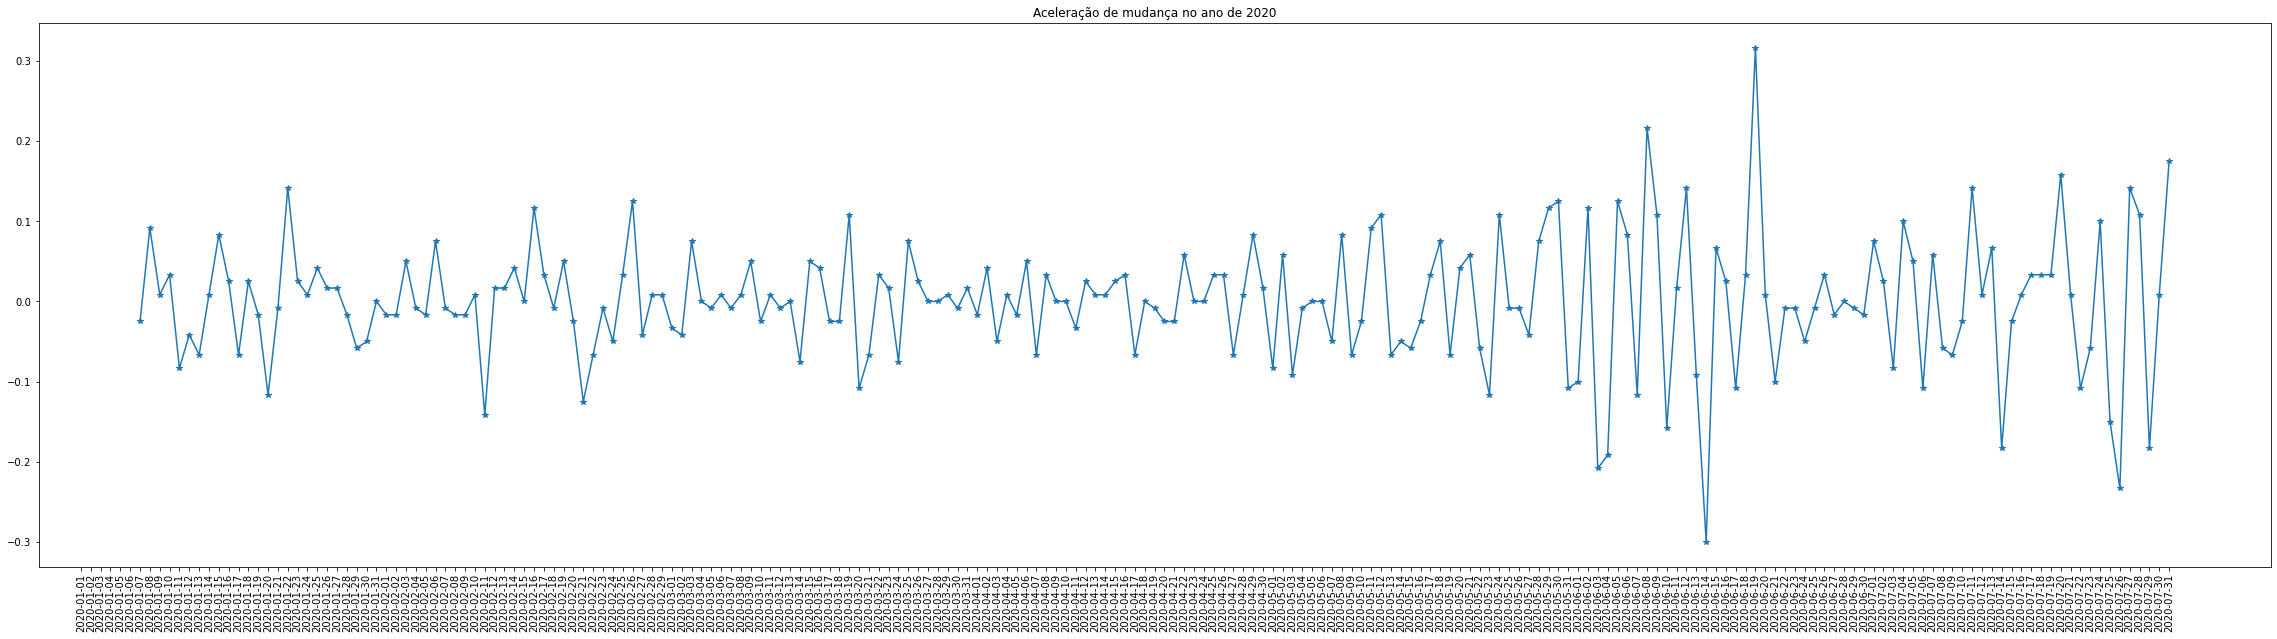

In [245]:
plt.figure(figsize=(40,10))
plt.title('Aceleração de mudança no ano de 2020')
plt.xticks([i for i in range(213)],[i[0] for i in eixo_2020.values],rotation=90)
velocidade = dados_Pinheiros_2020_completados_suavizado.diff()
plt.plot(velocidade.diff(),'*-')
plt.show()

## Estação Santo Amaro

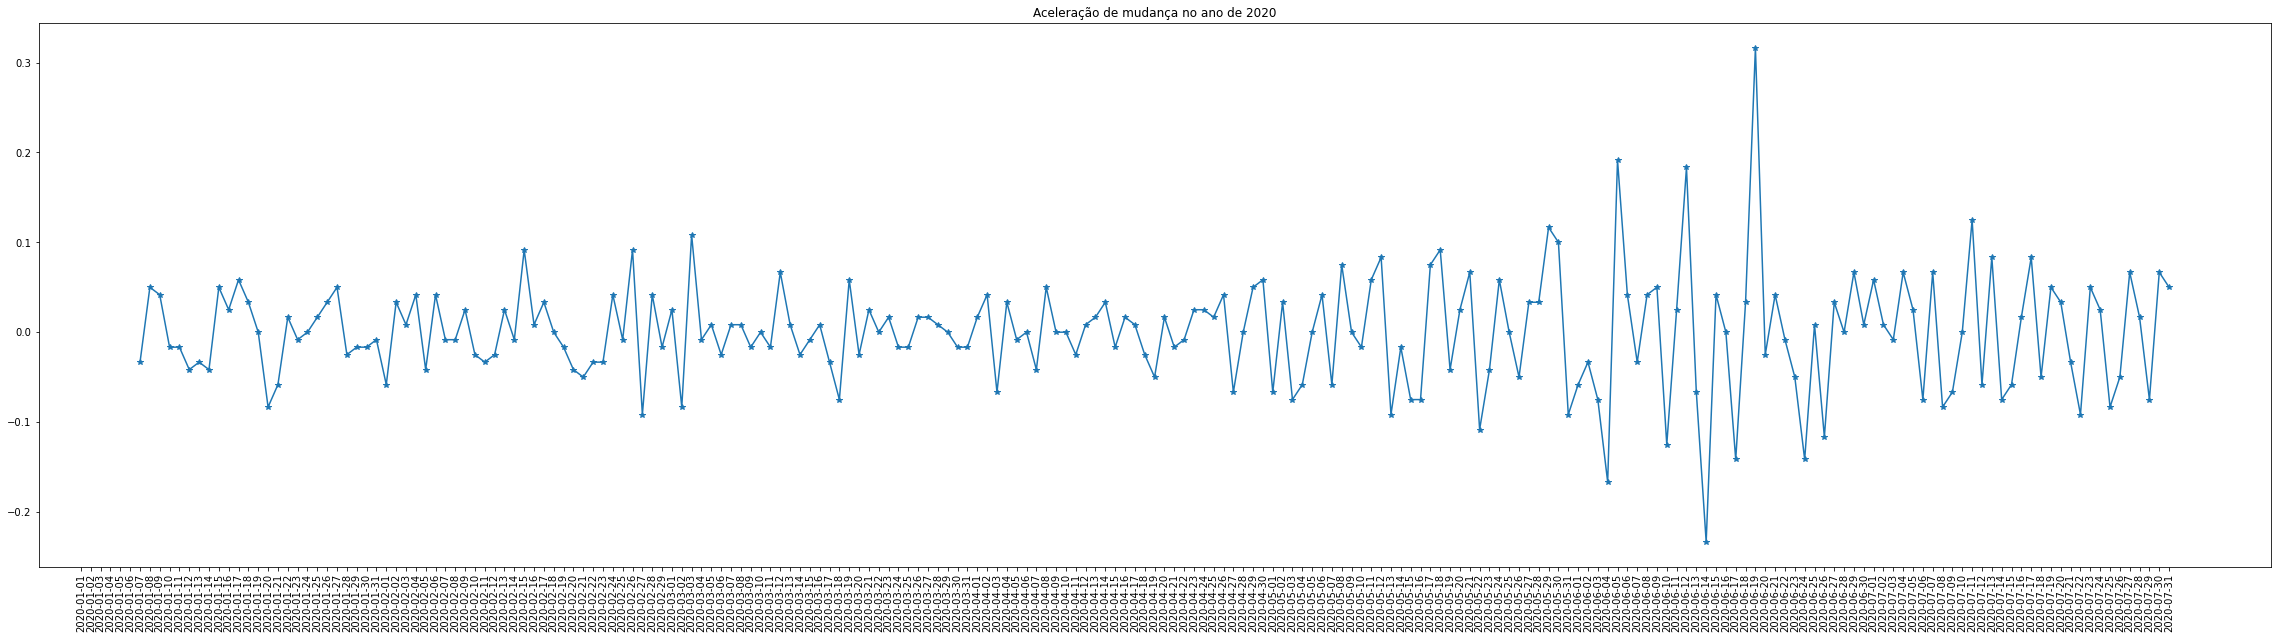

In [247]:
plt.figure(figsize=(40,10))
plt.title('Aceleração de mudança no ano de 2020')
plt.xticks([i for i in range(213)],[i[0] for i in eixo_2020.values],rotation=90)
velocidade = dados_Santo_Amaro_2020_completados_suavizado.diff()
plt.plot(velocidade.diff(),'*-');
plt.show()

# Comparação com o ano de 2019

--------------------------------------------------
------------------------ 2019 --------------------
--------------------------------------------------
15.8% dos dados da bases são faltantes
****************************************   Base de dados completada   ****************************************


1    2    3    4    5    6    7    8    9   10  ...   15   16   17   18  \
0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  ...  0.0 -0.0  1.0 -0.0   
1  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  ...  0.0  0.0  0.0  0.0   
2  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  1.0 -1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
4  1.0 -0.0  1.0  0.0  0.0 -0.0  0.0  1.0  1.0  1.0  ...  0.0  0.0  0.0  0.0   

    19   20   21   22   23   24  
0  0.0  0.0  0.0 -0.0 -0.0 -0.0  
1  0.0 -1.0  1.0  1.0  1.0  1.0  
2  1.0  0.0  0.0  0.0 -0.0  1.0  
3  1.0  1.0  1.0  0.0  1.0  1.0  
4  1.0  0.0  0.0  1.0  1.0  0.0  

[5 rows x 24 columns]

****************************************   Formato da base dados   ****************************************


(212, 24)

**************************************** Média diária dos dados ****************************************


0      0.166667
1      0.375000
2      0.291667
3      0.416667
4      0.333333
         ...   
207    0.333333
208    0.000000
209    0.250000
210    0.500000
211    0.541667
Length: 212, dtype: float64

--------------------------------------------------
------------------------ 2019 --------------------
--------------------------------------------------
0.81% dos dados da bases são faltantes
****************************************   Base de dados completada   ****************************************


1    2    3    4    5    6    7    8    9   10  ...   15   16   17   18  \
0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   
3  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  0.0  1.0  1.0   
4  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   

    19   20   21   22   23   24  
0  1.0  0.0  1.0  1.0  0.0  0.0  
1  1.0  1.0  0.0  0.0  0.0  0.0  
2  1.0  1.0  1.0  0.0  1.0  0.0  
3  1.0  1.0  0.0  0.0  1.0  1.0  
4  1.0  1.0  1.0  1.0  0.0  0.0  

[5 rows x 24 columns]

****************************************   Formato da base dados   ****************************************


(212, 24)

**************************************** Média diária dos dados ****************************************


0      0.250000
1      0.458333
2      0.625000
3      0.666667
4      0.666667
         ...   
207    0.791667
208    0.333333
209    0.291667
210    0.666667
211    1.083333
Length: 212, dtype: float64

--------------------------------------------------
------------------------ 2019 --------------------
--------------------------------------------------
6.7% dos dados da bases são faltantes
****************************************   Base de dados completada   ****************************************


1    2    3    4    5    6    7    8    9   10  ...   15   16   17   18  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    19   20   21   22   23   24  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 24 columns]

****************************************   Formato da base dados   ****************************************


(212, 24)

**************************************** Média diária dos dados ****************************************


0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
207    0.250000
208    0.000000
209    0.000000
210    0.166667
211    0.333333
Length: 212, dtype: float64

--------------------------------------------------
------------------------ 2019 --------------------
--------------------------------------------------
5.03% dos dados da bases são faltantes
****************************************   Base de dados completada   ****************************************


1    2    3    4   5    6    7    8    9   10  ...   15   16   17   18  \
0  0.0  0.0  0.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0 NaN  1.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  0.0  1.0   
2  1.0  1.0  0.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  0.0  1.0   
3  0.0  0.0  0.0  0.0 NaN  1.0  1.0  1.0  1.0  1.0  ...  0.0  1.0  1.0  1.0   
4  0.0  0.0  0.0  0.0 NaN  1.0  1.0  1.0  1.0  1.0  ...  1.0  0.0  1.0  1.0   

    19   20   21   22   23   24  
0  1.0  0.0  1.0  1.0  1.0  0.0  
1  1.0  1.0  1.0  1.0  1.0  1.0  
2  1.0  1.0  1.0  1.0  1.0  1.0  
3  1.0  1.0  1.0  1.0  1.0  1.0  
4  0.0  1.0  1.0  0.0  0.0  1.0  

[5 rows x 24 columns]

****************************************   Formato da base dados   ****************************************


(212, 24)

**************************************** Média diária dos dados ****************************************


0      0.173913
1      0.608696
2      0.739130
3      0.782609
4      0.652174
         ...   
207    1.000000
208    0.000000
209    0.478261
210    0.869565
211    1.086957
Length: 212, dtype: float64

--------------------------------------------------
------------------------ 2019 --------------------
--------------------------------------------------
5.72% dos dados da bases são faltantes
****************************************   Base de dados completada   ****************************************


1    2    3    4   5    6    7    8    9   10  ...   15   16   17   18  \
0  0.0  1.0  1.0  1.0 NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0 NaN  1.0  1.0  1.0  1.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0 NaN  0.0  1.0  1.0  1.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0 NaN  0.0  1.0  1.0  1.0  1.0  ...  0.0  1.0  2.0  1.0   
4  0.0  0.0  0.0  0.0 NaN  0.0  1.0  0.0  1.0  1.0  ...  1.0  1.0  1.0  1.0   

    19   20   21   22   23   24  
0  1.0  0.0  1.0  1.0  1.0  1.0  
1  1.0  0.0  0.0  1.0  1.0  1.0  
2  1.0  0.0  0.0  0.0  0.0  0.0  
3  1.0  1.0  1.0  1.0  1.0  0.0  
4  1.0  1.0  1.0  1.0  1.0  1.0  

[5 rows x 24 columns]

****************************************   Formato da base dados   ****************************************


(212, 24)

**************************************** Média diária dos dados ****************************************


0      0.347826
1      0.347826
2      0.173913
3      0.652174
4      0.739130
         ...   
207    1.000000
208    0.130435
209    0.782609
210    1.000000
211    0.913043
Length: 212, dtype: float64

--------------------------------------------------
------------------------ 2019 --------------------
--------------------------------------------------
9.0% dos dados da bases são faltantes
****************************************   Base de dados completada   ****************************************


1    2    3    4    5    6    7    8    9   10  ...   15   16   17   18  \
0  1.0 -0.0 -0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ... -0.0  0.0  0.0  0.0   
1  1.0  1.0  1.0  0.0  0.0  1.0 -0.0  1.0  1.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  1.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    19   20   21   22   23   24  
0  0.0  0.0  0.0  1.0  0.0 -0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 24 columns]

****************************************   Formato da base dados   ****************************************


(212, 24)

**************************************** Média diária dos dados ****************************************


0      0.166667
1      0.250000
2      0.000000
3      0.083333
4      0.000000
         ...   
207    0.333333
208    0.000000
209    0.000000
210    0.208333
211    0.666667
Length: 212, dtype: float64

--------------------------------------------------
------------------------ 2019 --------------------
--------------------------------------------------
6.41% dos dados da bases são faltantes
****************************************   Base de dados completada   ****************************************


1    2    3    4    5    6    7    8    9   10  ...   15   16   17   18  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  ...  0.0  0.0  1.0  1.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  ...  1.0  0.0  0.0  0.0   

    19   20   21   22   23   24  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  1.0  1.0  1.0  1.0  1.0  0.0  
4  0.0  1.0  1.0  0.0  0.0  0.0  

[5 rows x 24 columns]

****************************************   Formato da base dados   ****************************************


(212, 24)

**************************************** Média diária dos dados ****************************************


0      0.000000
1      0.125000
2      0.041667
3      0.458333
4      0.291667
         ...   
207    0.375000
208    0.000000
209    0.000000
210    0.666667
211    0.916667
Length: 212, dtype: float64

--------------------------------------------------
------------------------ 2019 --------------------
--------------------------------------------------
20.68% dos dados da bases são faltantes
****************************************   Base de dados completada   ****************************************


1    2    3    4   5    6    7    8    9   10  ...   15   16   17   18  \
0  0.0  0.0  0.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0 NaN  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

    19   20   21   22   23   24  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  1.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 24 columns]

****************************************   Formato da base dados   ****************************************


(212, 24)

**************************************** Média diária dos dados ****************************************


0      0.000000
1      0.000000
2      0.000000
3      0.043478
4      0.000000
         ...   
207    0.260870
208    0.347826
209    0.173913
210    0.260870
211    0.347826
Length: 212, dtype: float64

Resultados do teste Dickey Fuller:
Teste estatístico                -5.151720
p-value                           0.000011
#Lags Usados                      5.000000
Número de observações usadas    206.000000
Valores críticos (1%)            -3.462499
Valores críticos (5%)            -2.875675
Valores críticos (10%)           -2.574304
dtype: float64
Resultados do teste Dickey Fuller:
Teste estatístico              -7.642137e+00
p-value                         1.883657e-11
#Lags Usados                    2.000000e+00
Número de observações usadas    2.090000e+02
Valores críticos (1%)          -3.462032e+00
Valores críticos (5%)          -2.875471e+00
Valores críticos (10%)         -2.574195e+00
dtype: float64
Resultados do teste Dickey Fuller:
Teste estatístico              -6.756120e+00
p-value                         2.868904e-09
#Lags Usados                    0.000000e+00
Número de observações usadas    2.110000e+02
Valores críticos (1%)          -3.461727e+00
Valores críticos (5%)   

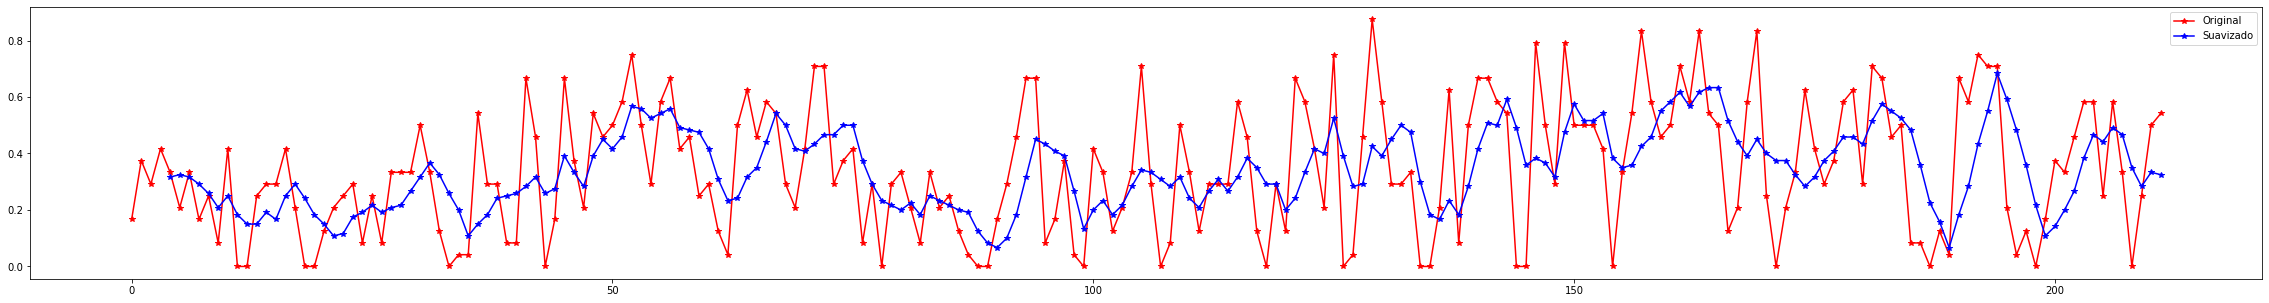

MAPE:36.39535744816648
MAE:0.23024839743589737
MQE:0.09622629540598286


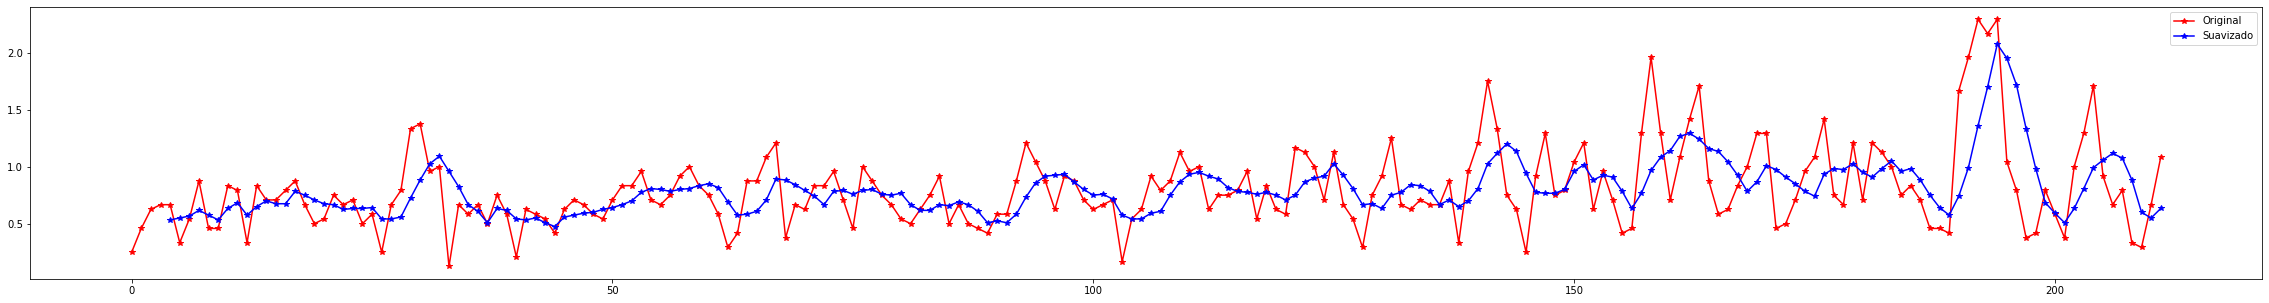

MAPE:nan
MAE:0.13357371794871795
MQE:0.03798076923076922


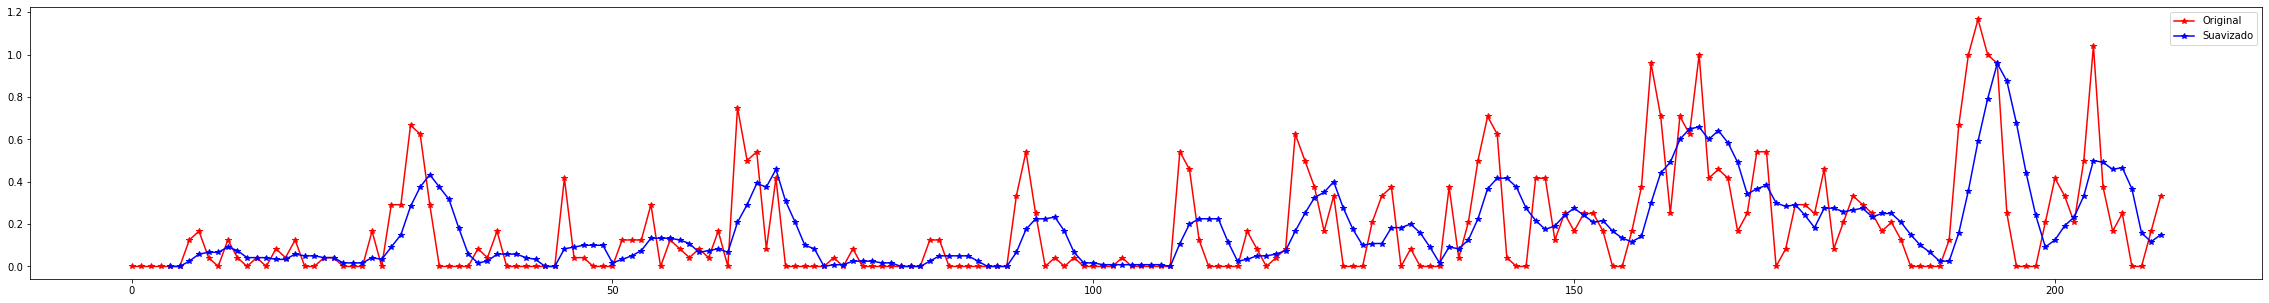

MAPE:inf
MAE:0.2978678929765885
MQE:0.14034789879307835


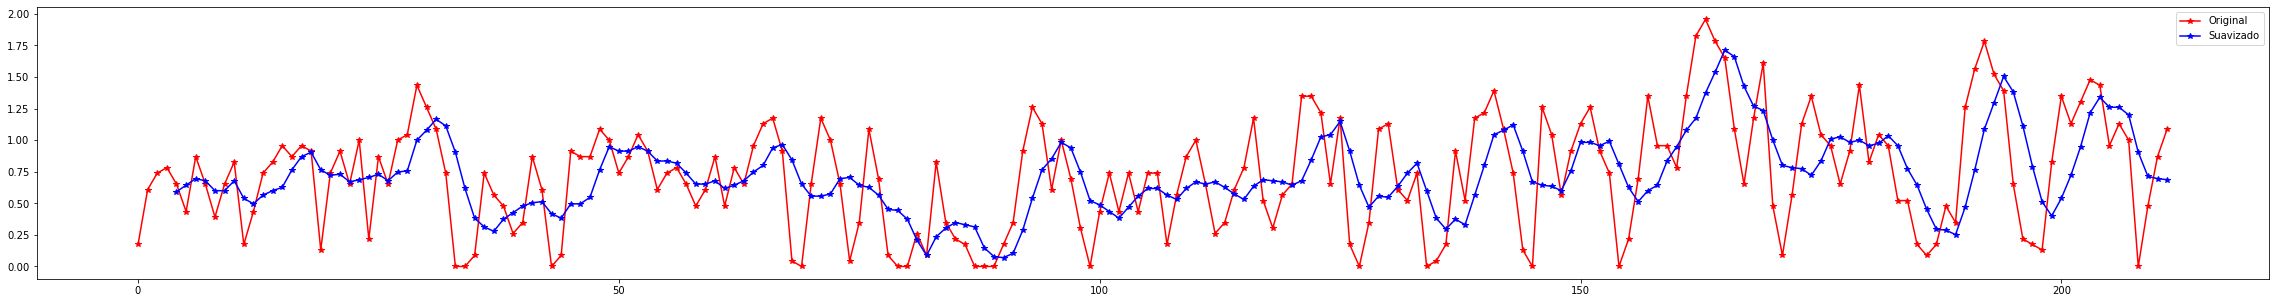

MAPE:31.598180340026897
MAE:0.1948996655518395
MQE:0.06327613785080702


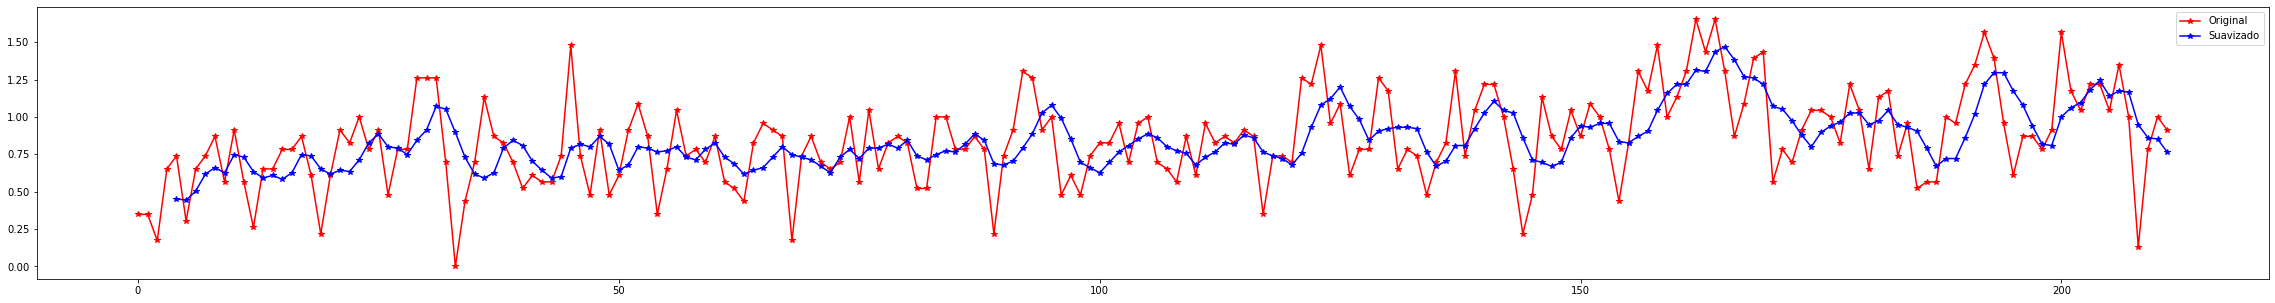

MAPE:105.5
MAE:105.5
MQE:105.5


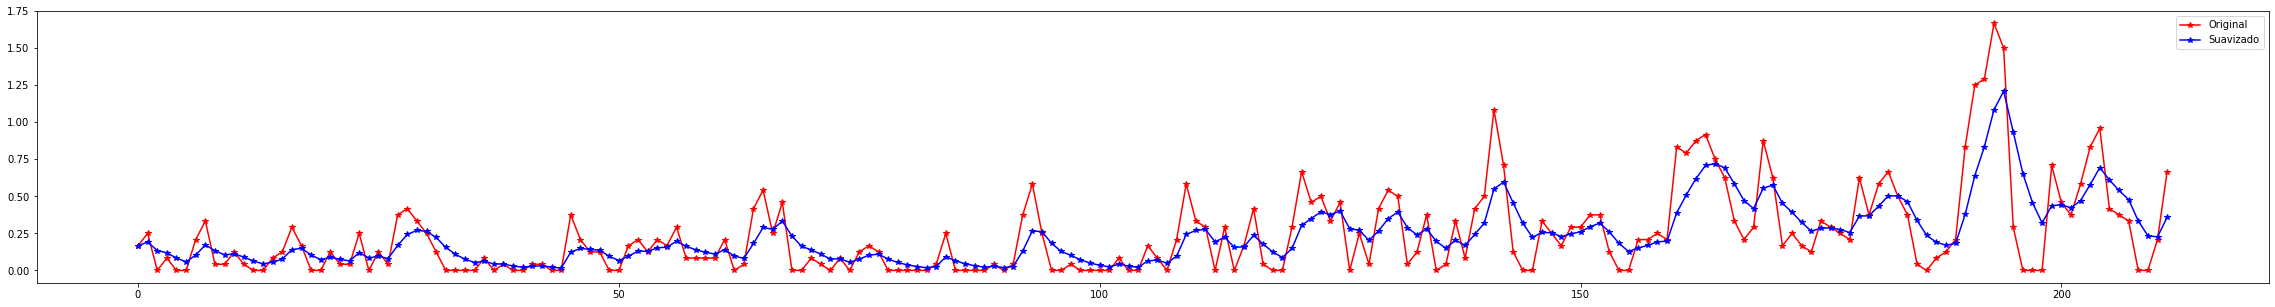

MAPE:105.5
MAE:105.5
MQE:105.5


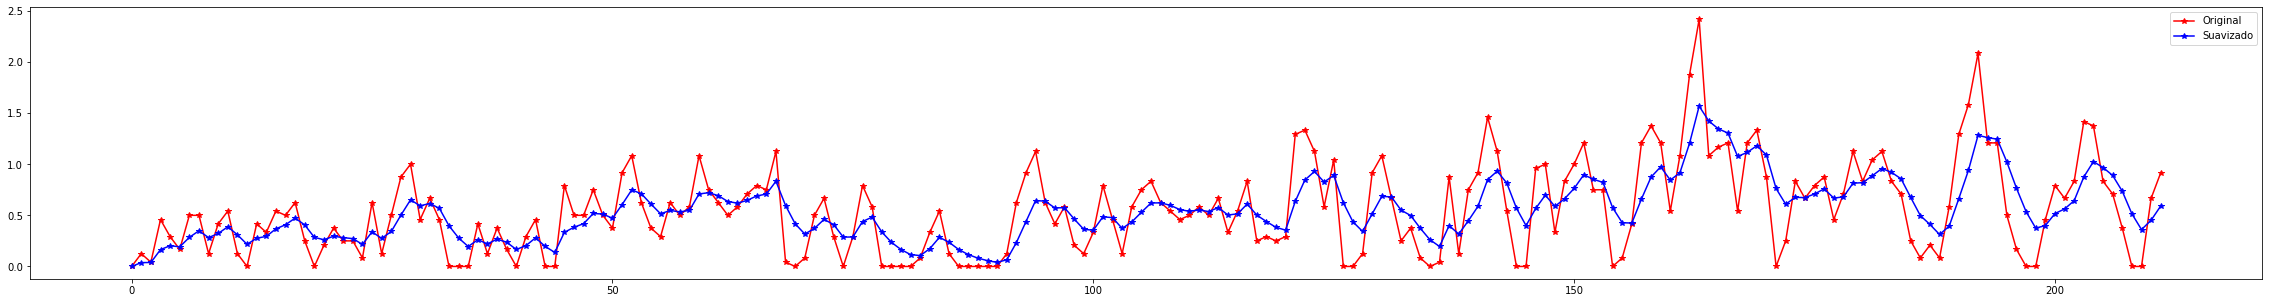

MAPE:inf
MAE:0.17466555183946483
MQE:0.05521157481459936


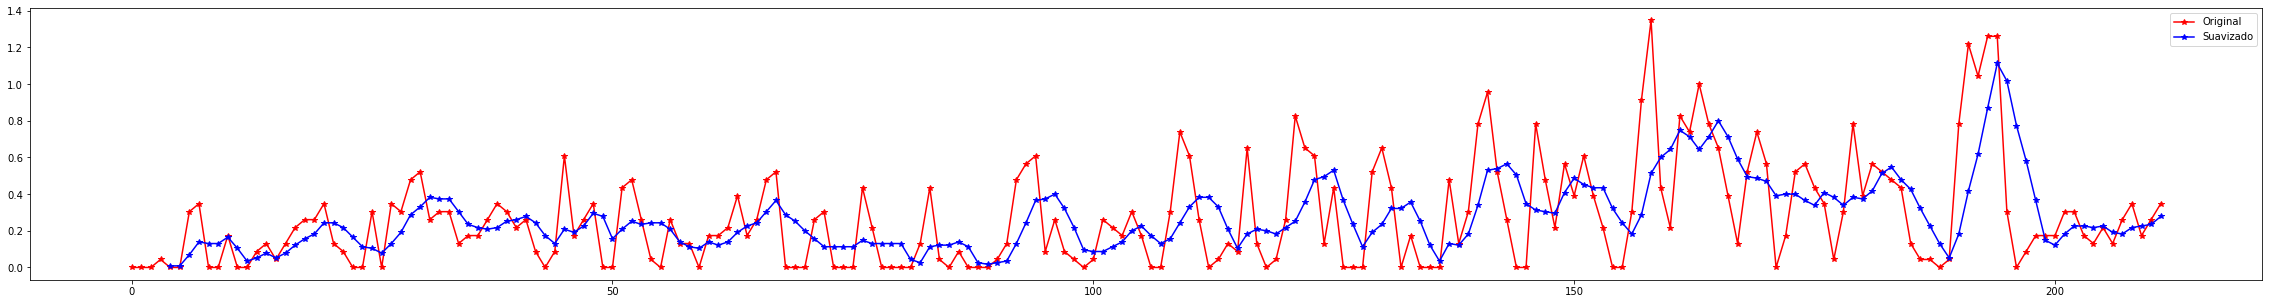

In [266]:
#Carregar os dados
dados_Cerqueria_2019   = pd.read_csv('..\/01.Dados\/CSV\/CO_Cerqueria_2019.csv')
dados_Congonhas_2019   = pd.read_csv('..\/01.Dados\/CSV\/CO_Congonhas_2019.csv')
dados_ibirapuera_2019  = pd.read_csv('..\/01.Dados\/CSV\/CO_ibirapuera_2019.csv')
dados_Marg_T_2019      = pd.read_csv('..\/01.Dados\/CSV\/CO_Marg_T_2019.csv')
dados_Osasco_2019      = pd.read_csv('..\/01.Dados\/CSV\/CO_Osasco_2019.csv')
dados_P_Pedro_2019     = pd.read_csv('..\/01.Dados\/CSV\/CO_P_Pedro_2019.csv')
dados_Pinheiros_2019   = pd.read_csv('..\/01.Dados\/CSV\/CO_Pinheiros_2019.csv')
dados_Santo_Amaro_2019 = pd.read_csv('..\/01.Dados\/CSV\/CO_Santo_Amaro_2019.csv')

#Completar os dados
dados_Cerqueria_2019_completados   = completa_serie(dados_Cerqueria_2019,2019)
dados_Congonhas_2019_completados   = completa_serie(dados_Congonhas_2019,2019)
dados_ibirapuera_2019_completados  = completa_serie(dados_ibirapuera_2019,2019)
dados_Marg_T_2019_completados      = completa_serie(dados_Marg_T_2019,2019)
dados_Osasco_2019_completados      = completa_serie(dados_Osasco_2019,2019)
dados_P_Pedro_2019_completados     = completa_serie(dados_P_Pedro_2019,2019)
dados_Pinheiros_2019_completados   = completa_serie(dados_Pinheiros_2019,2019)
dados_Santo_Amaro_2019_completados = completa_serie(dados_Santo_Amaro_2019,2019)

#Testar a estacinariedade
dados_Cerqueria_2019_completados_p_values   = teste_estacionariedade(dados_Cerqueria_2019_completados)
dados_Congonhas_2019_completados_p_values   = teste_estacionariedade(dados_Congonhas_2019_completados)
dados_ibirapuera_2019_completados_p_values  = teste_estacionariedade(dados_ibirapuera_2019_completados)
dados_Marg_T_2019_completados_p_values      = teste_estacionariedade(dados_Marg_T_2019_completados)
dados_Osasco_2019_completados_p_values      = teste_estacionariedade(dados_Osasco_2019_completados)
dados_P_Pedro_2019_completados_p_values     = teste_estacionariedade(dados_P_Pedro_2019_completados)
dados_Pinheiros_2019_completados_p_values   = teste_estacionariedade(dados_Pinheiros_2019_completados)
dados_Santo_Amaro_2019_completados_p_values = teste_estacionariedade(dados_Santo_Amaro_2019_completados)

#Suavizar a série
dados_Cerqueria_2019_completados_suavizado     = alisar_serie(dados_Cerqueria_2019_completados,
                                                              dados_Cerqueria_2019_completados_p_values)

dados_Congonhas_2019_completados_suavizado     = alisar_serie(dados_Congonhas_2019_completados,
                                                              dados_Congonhas_2019_completados_p_values)

dados_ibirapuera_2019_completados_suavizado    = alisar_serie(dados_ibirapuera_2019_completados,
                                                              dados_ibirapuera_2019_completados_p_values)

dados_Marg_T_2019_completados_suavizado        = alisar_serie(dados_Marg_T_2019_completados,
                                                              dados_Marg_T_2019_completados_p_values)

dados_Osasco_2019_completados_suavizado        = alisar_serie(dados_Osasco_2019_completados,
                                                              dados_Osasco_2019_completados_p_values)

dados_P_Pedro_2019_completados_suavizado       = alisar_serie(dados_P_Pedro_2019_completados,
                                                              dados_P_Pedro_2019_completados_p_values)

dados_Pinheiros_2019_completados_suavizado     = alisar_serie(dados_Pinheiros_2019_completados,
                                                              dados_Pinheiros_2019_completados_p_values)

dados_Santo_Amaro_2019_completados_suavizado   = alisar_serie(dados_Santo_Amaro_2019_completados,
                                                              dados_Santo_Amaro_2019_completados_p_values)


# Calculando a velocidade de mudança dos dados da série

### <span style='color:red'>Para vizualizar melhor os gráficos clique duas vezes neles</span>

## Estação Cerqueria

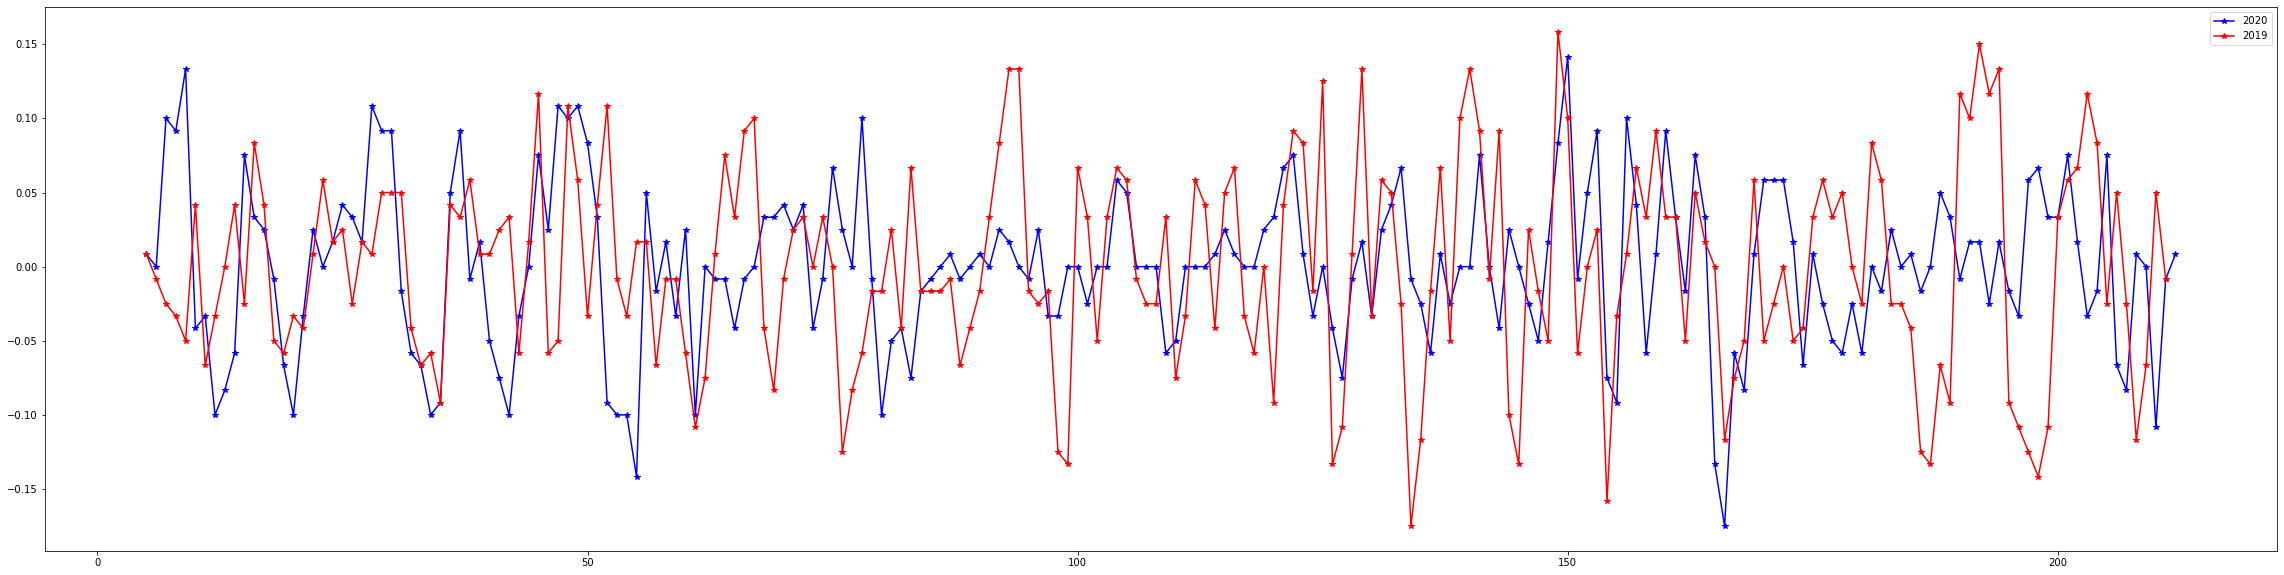

In [284]:
plt.figure(figsize=(40,10))
plt.plot(dados_Cerqueria_2020_completados_suavizado.diff(),'b*-',label='2020');
plt.plot(dados_Cerqueria_2019_completados_suavizado.diff(),'r*-',label='2019');
plt.legend(loc='best')
plt.show()

## Estação Congonhas

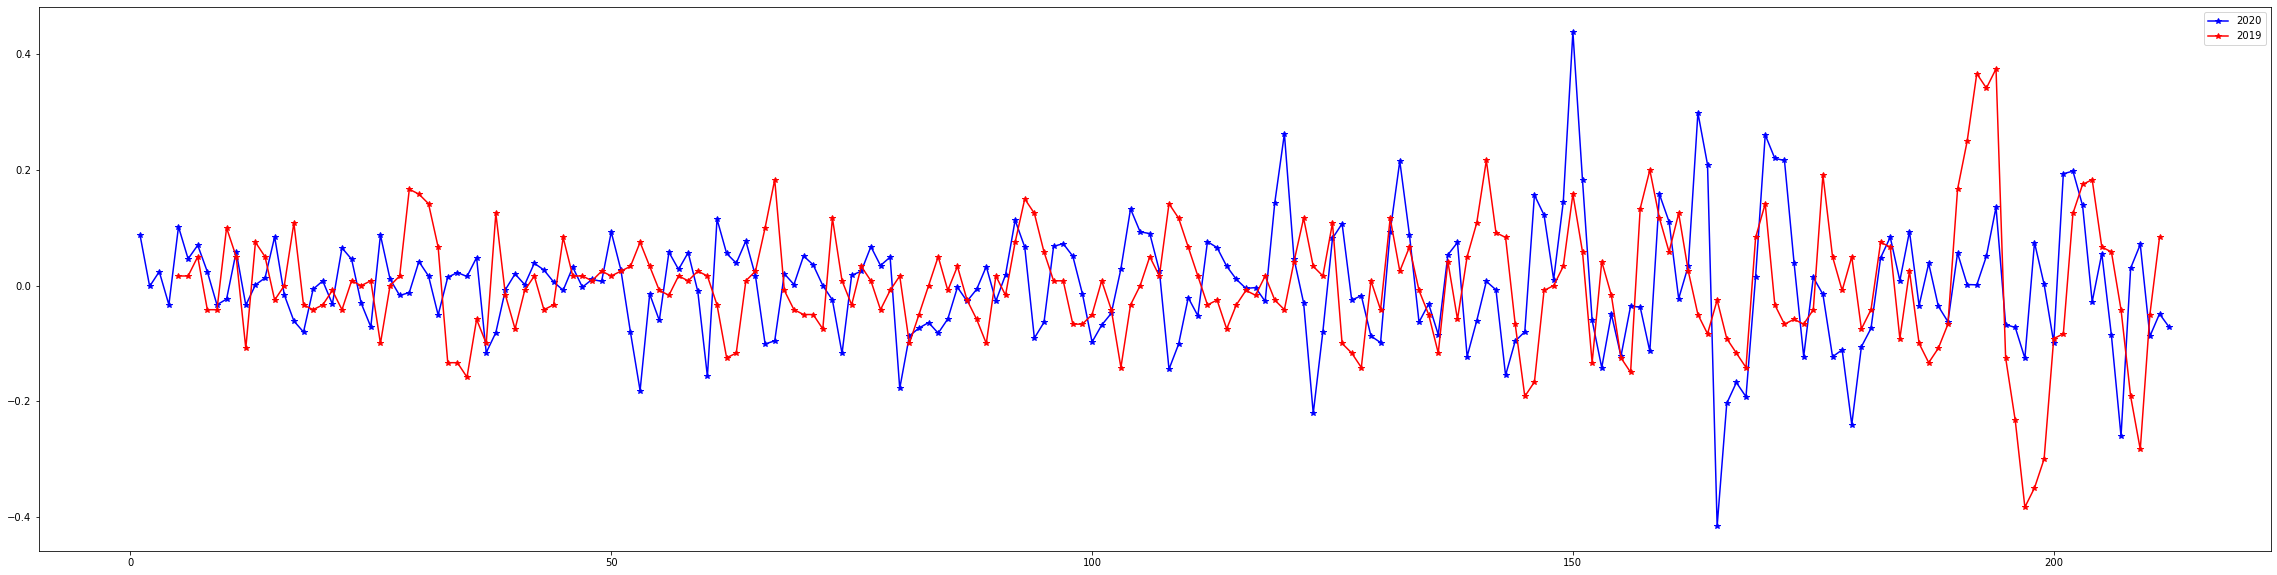

In [285]:
plt.figure(figsize=(40,10))
plt.plot(dados_Congonhas_2020_completados_suavizado.diff(),'b*-',label='2020');
plt.plot(dados_Congonhas_2019_completados_suavizado.diff(),'r*-',label='2019');
plt.legend(loc='best')
plt.show()

## Estação Ibirapuera

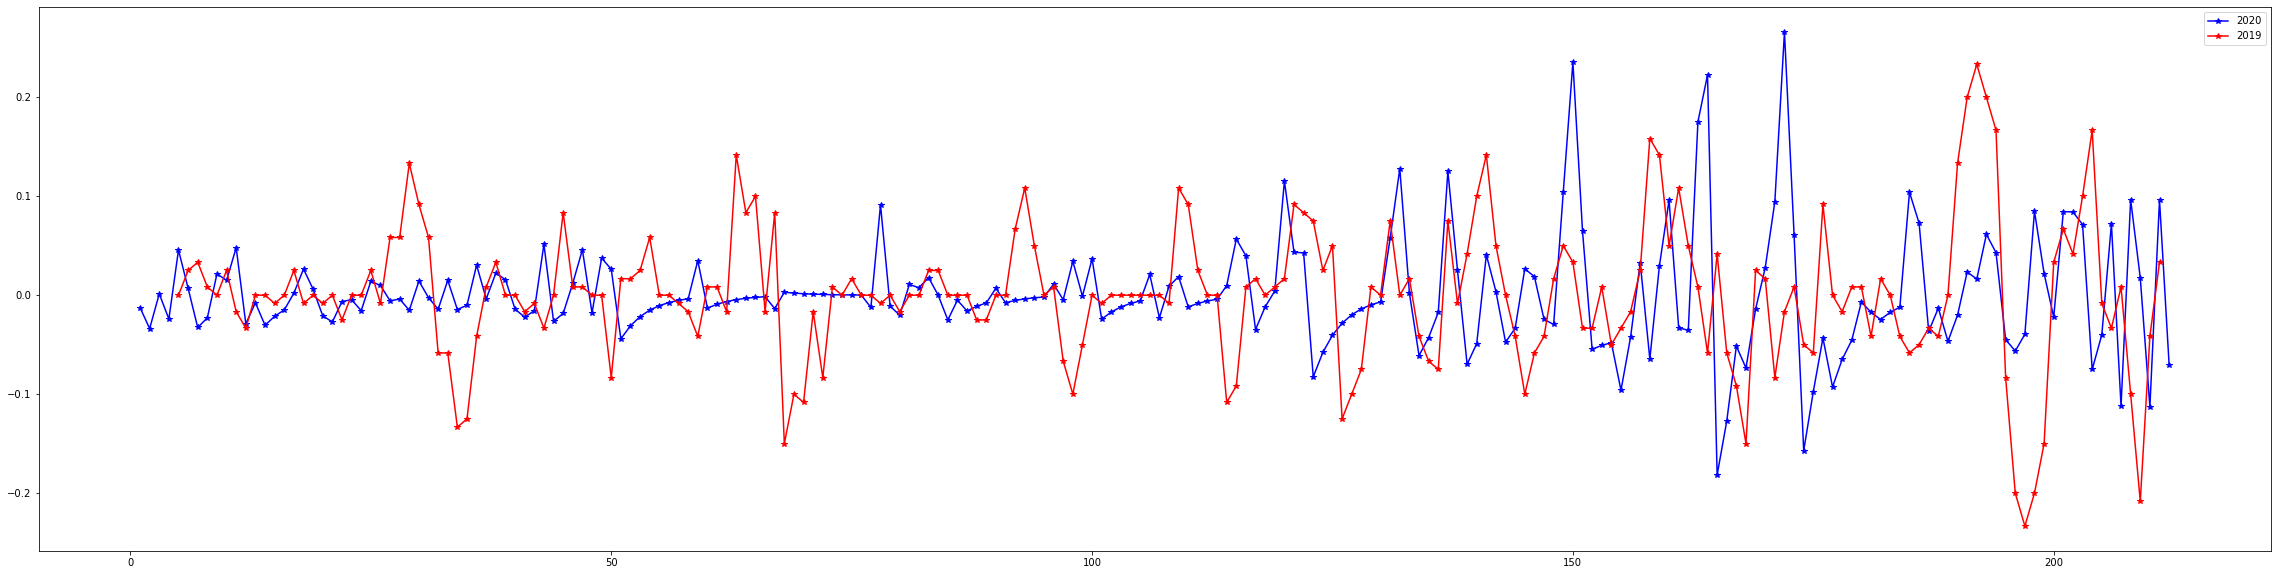

In [286]:
plt.figure(figsize=(40,10))
plt.plot(dados_ibirapuera_2020_completados_suavizado.diff(),'b*-',label='2020');
plt.plot(dados_ibirapuera_2019_completados_suavizado.diff(),'r*-',label='2019');
plt.legend(loc='best')
plt.show()

## Estação  Margem Tietê

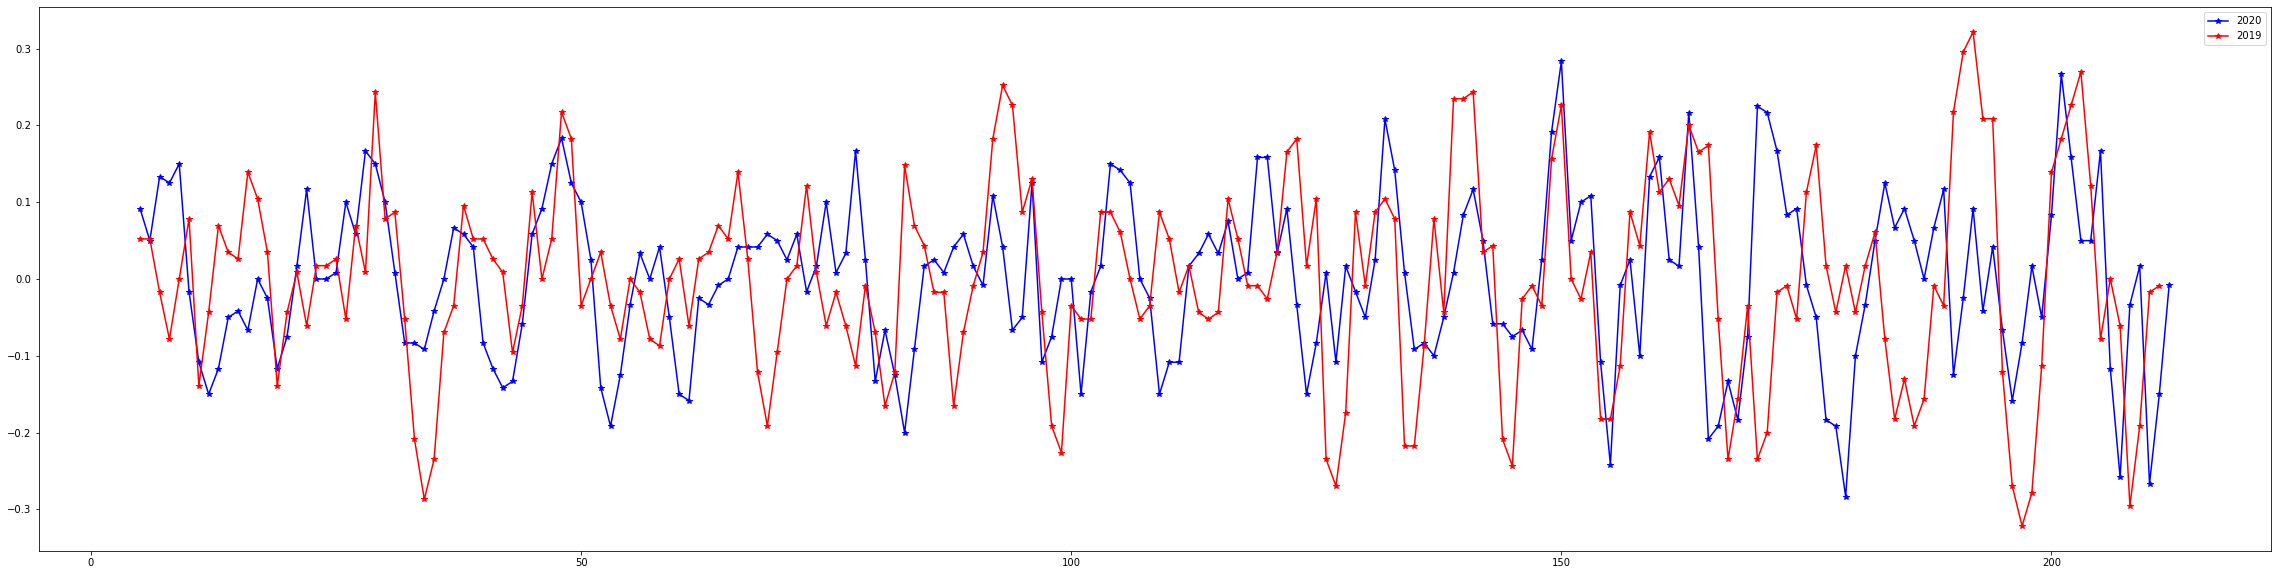

In [287]:
plt.figure(figsize=(40,10))
plt.plot(dados_Marg_T_2020_completados_suavizado.diff(),'b*-',label='2020');
plt.plot(dados_Marg_T_2019_completados_suavizado.diff(),'r*-',label='2019');
plt.legend(loc='best')
plt.show()

## Estação Osasco

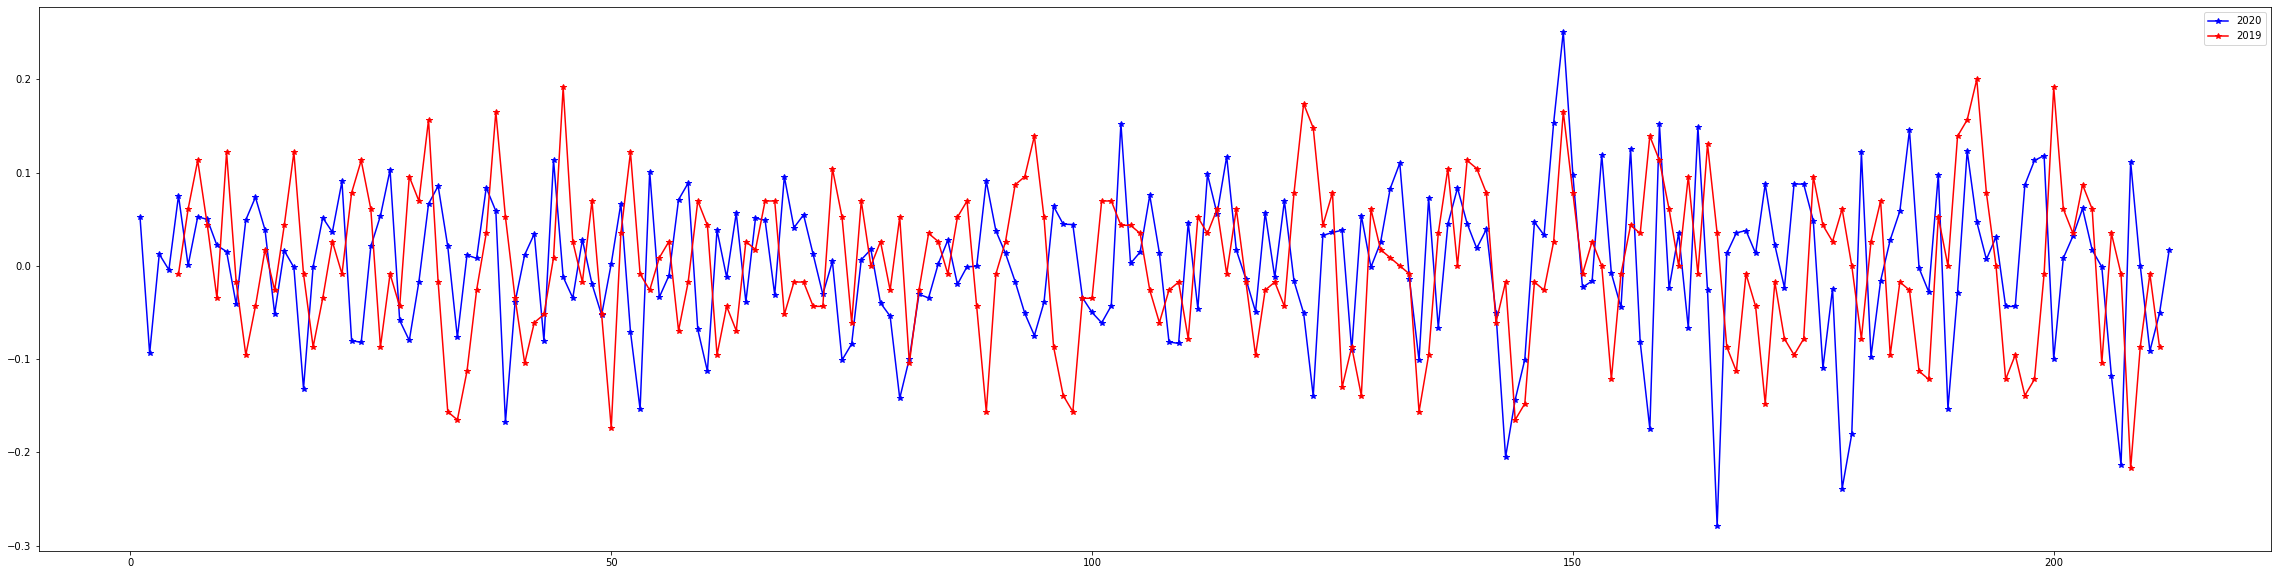

In [288]:
plt.figure(figsize=(40,10))
plt.plot(dados_Osasco_2020_completados_suavizado.diff(),'b*-',label='2020');
plt.plot(dados_Osasco_2019_completados_suavizado.diff(),'r*-',label='2019');
plt.legend(loc='best')
plt.show()

## Estação Parque Pedro II

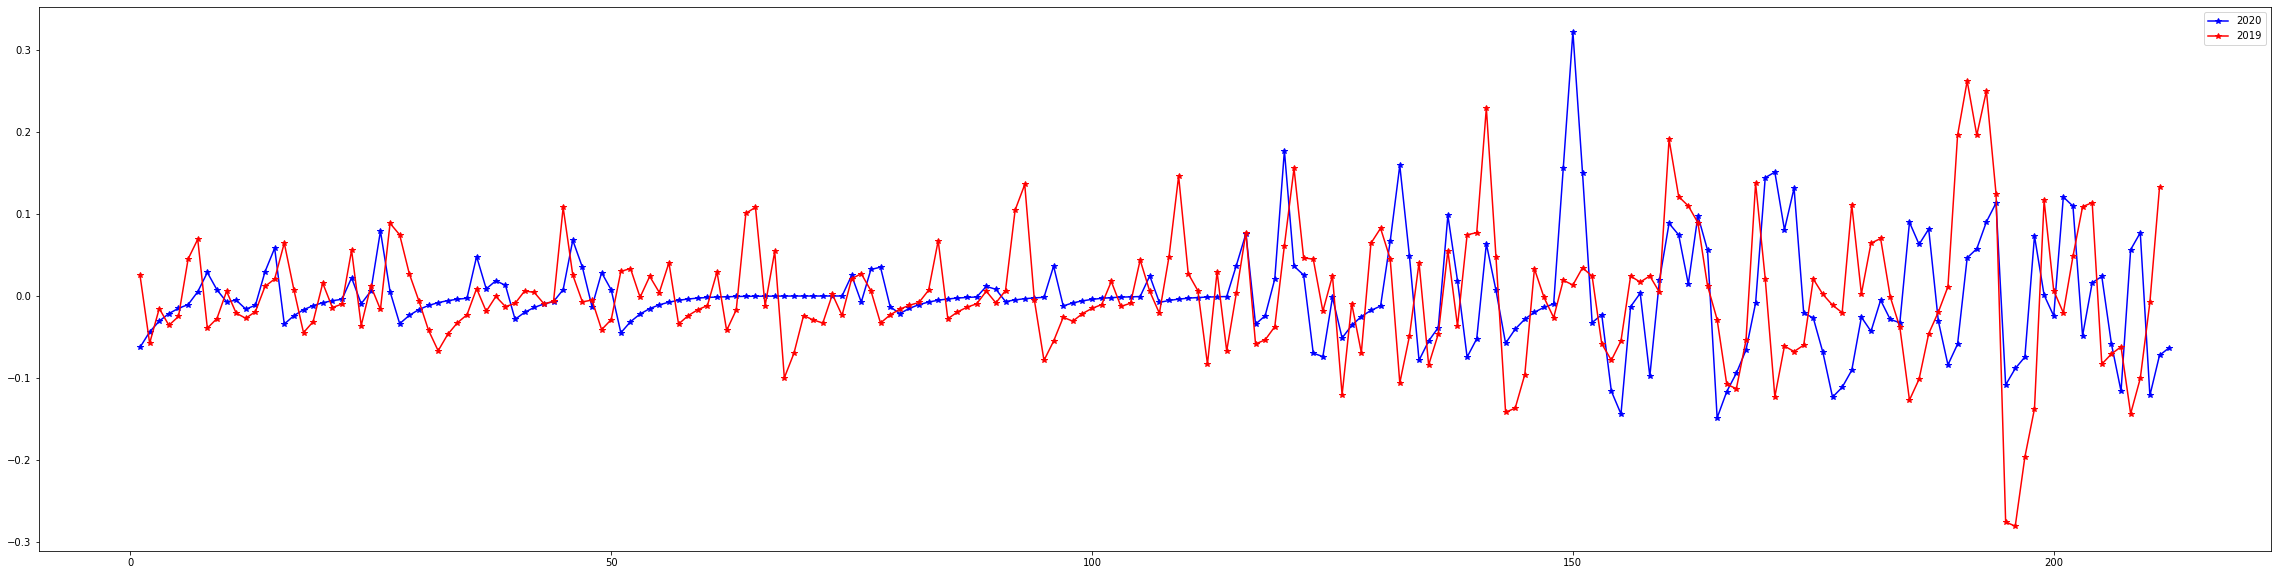

In [289]:
plt.figure(figsize=(40,10))
plt.plot(dados_P_Pedro_2020_completados_suavizado.diff(),'b*-',label='2020');
plt.plot(dados_P_Pedro_2019_completados_suavizado.diff(),'r*-',label='2019');
plt.legend(loc='best')
plt.show()

## Estação Pinheiro

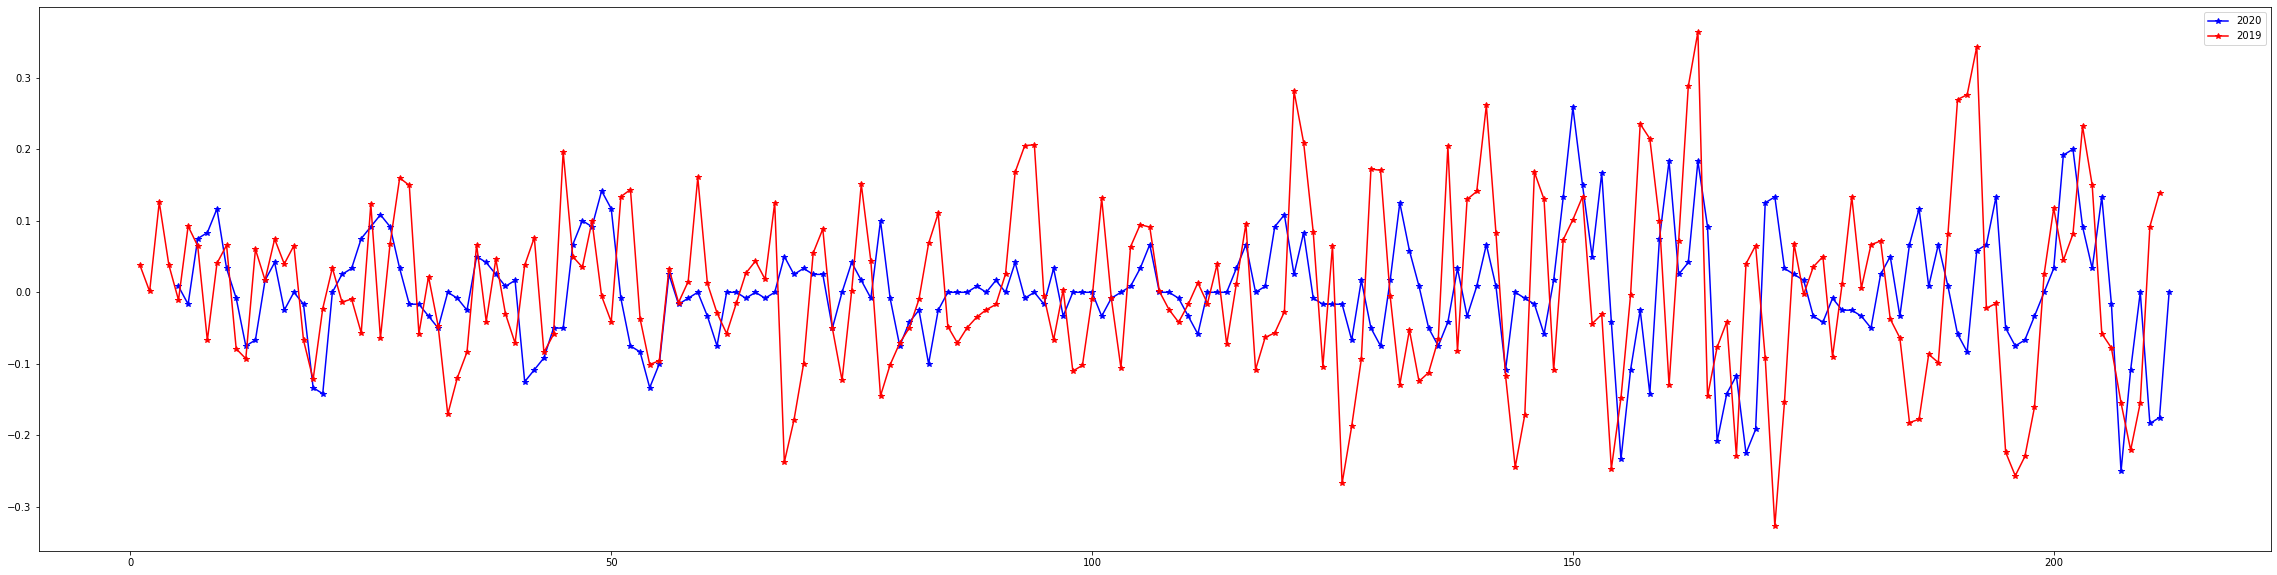

In [290]:
plt.figure(figsize=(40,10))
plt.plot(dados_Pinheiros_2020_completados_suavizado.diff(),'b*-',label='2020');
plt.plot(dados_Pinheiros_2019_completados_suavizado.diff(),'r*-',label='2019');
plt.legend(loc='best')
plt.show()

## Estação Santo Amaro

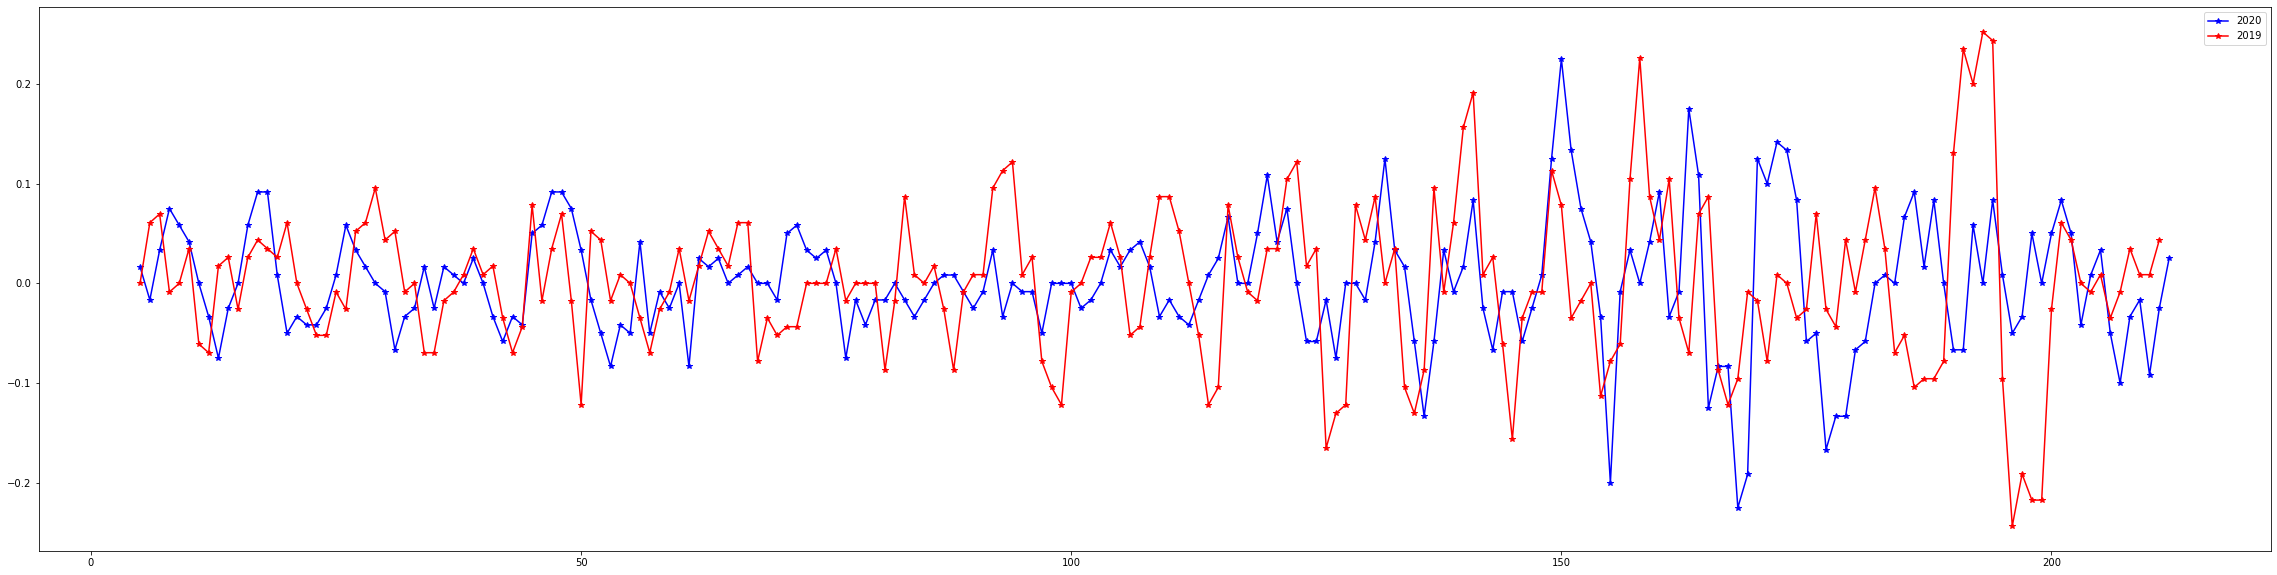

In [291]:
plt.figure(figsize=(40,10))
plt.plot(dados_Santo_Amaro_2020_completados_suavizado.diff(),'b*-',label='2020');
plt.plot(dados_Santo_Amaro_2019_completados_suavizado.diff(),'r*-',label='2019');
plt.legend(loc='best')
plt.show()

# Calculando a aceleração de mudança dos dados da série

## Estação Cerqueria

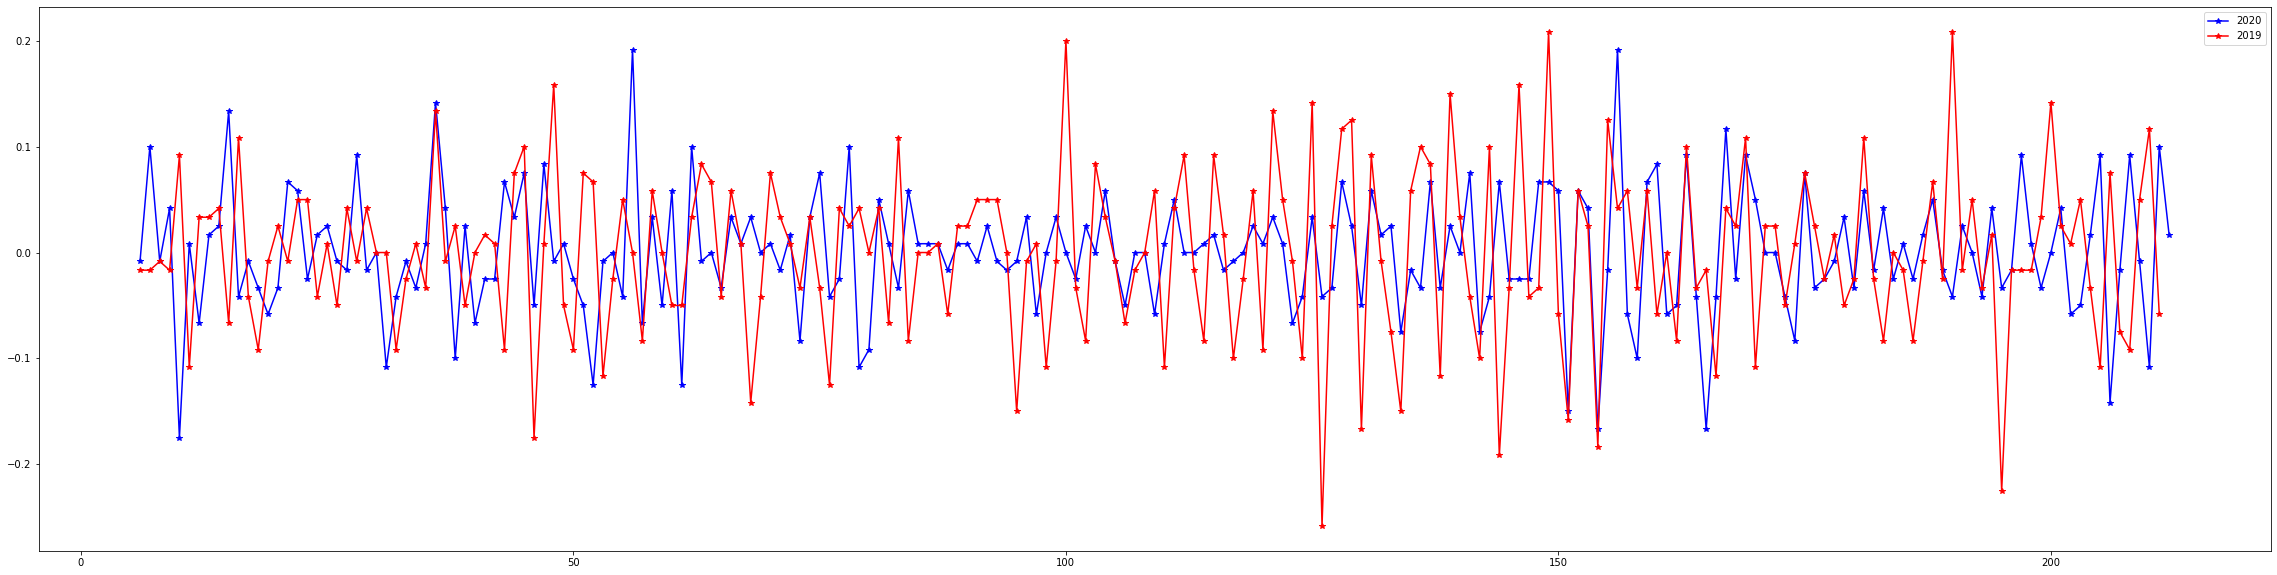

In [292]:
plt.figure(figsize=(40,10))
velocidade1 = dados_Cerqueria_2020_completados_suavizado.diff()
velocidade2 = dados_Cerqueria_2019_completados_suavizado.diff()

plt.plot(velocidade1.diff(),'b*-',label='2020');
plt.plot(velocidade2.diff(),'r*-',label='2019');
plt.legend(loc='best')
plt.show()

## Estação Congonhas

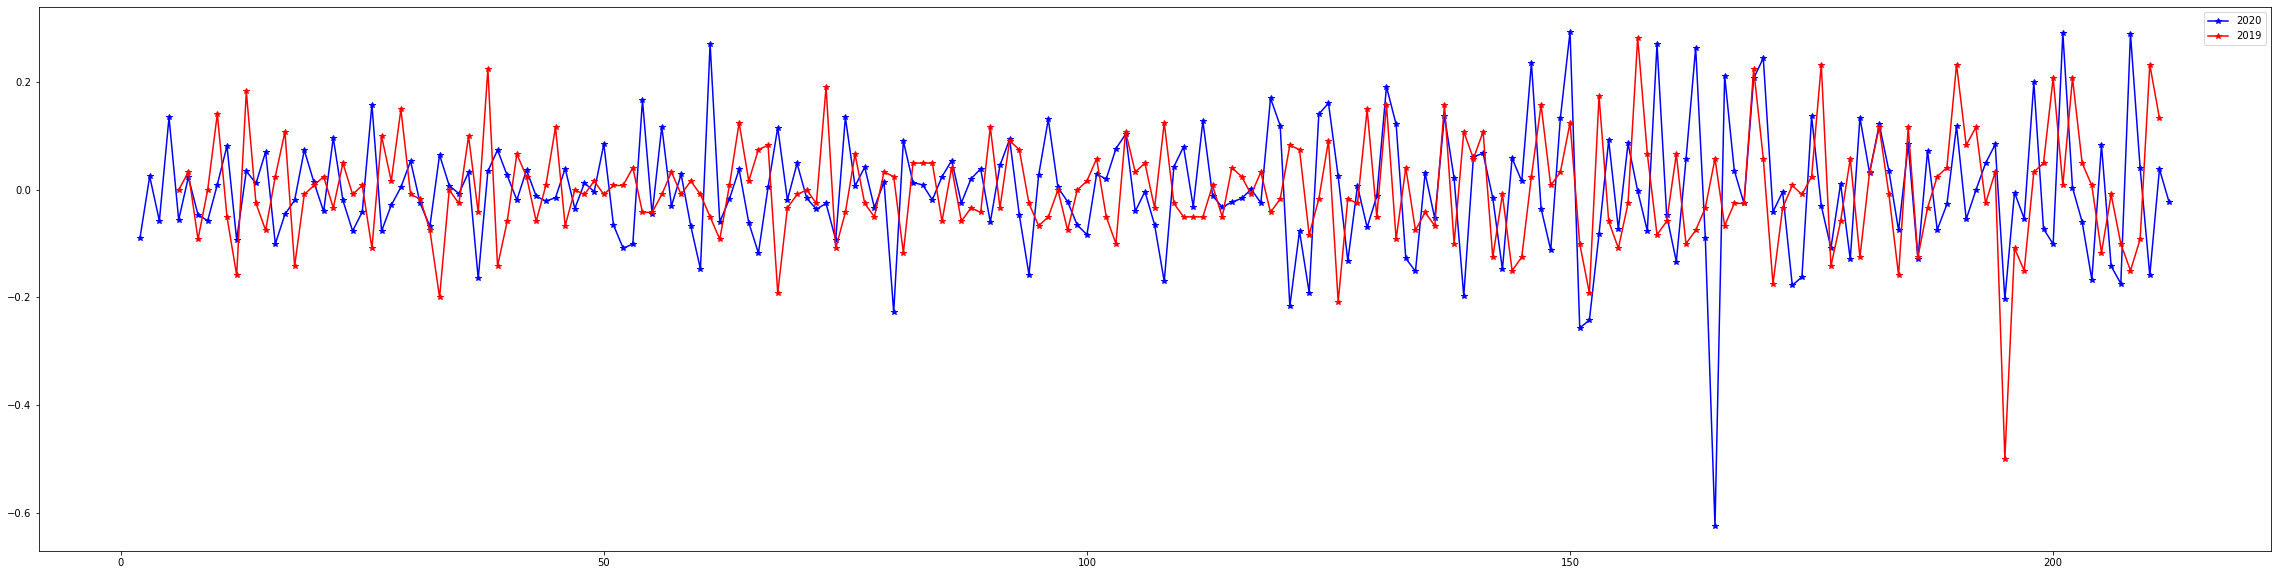

In [293]:
plt.figure(figsize=(40,10))
velocidade1 = dados_Congonhas_2020_completados_suavizado.diff()
velocidade2 = dados_Congonhas_2019_completados_suavizado.diff()

plt.plot(velocidade1.diff(),'b*-',label='2020');
plt.plot(velocidade2.diff(),'r*-',label='2019');
plt.legend(loc='best')
plt.show()

## Estação Ibirapuera

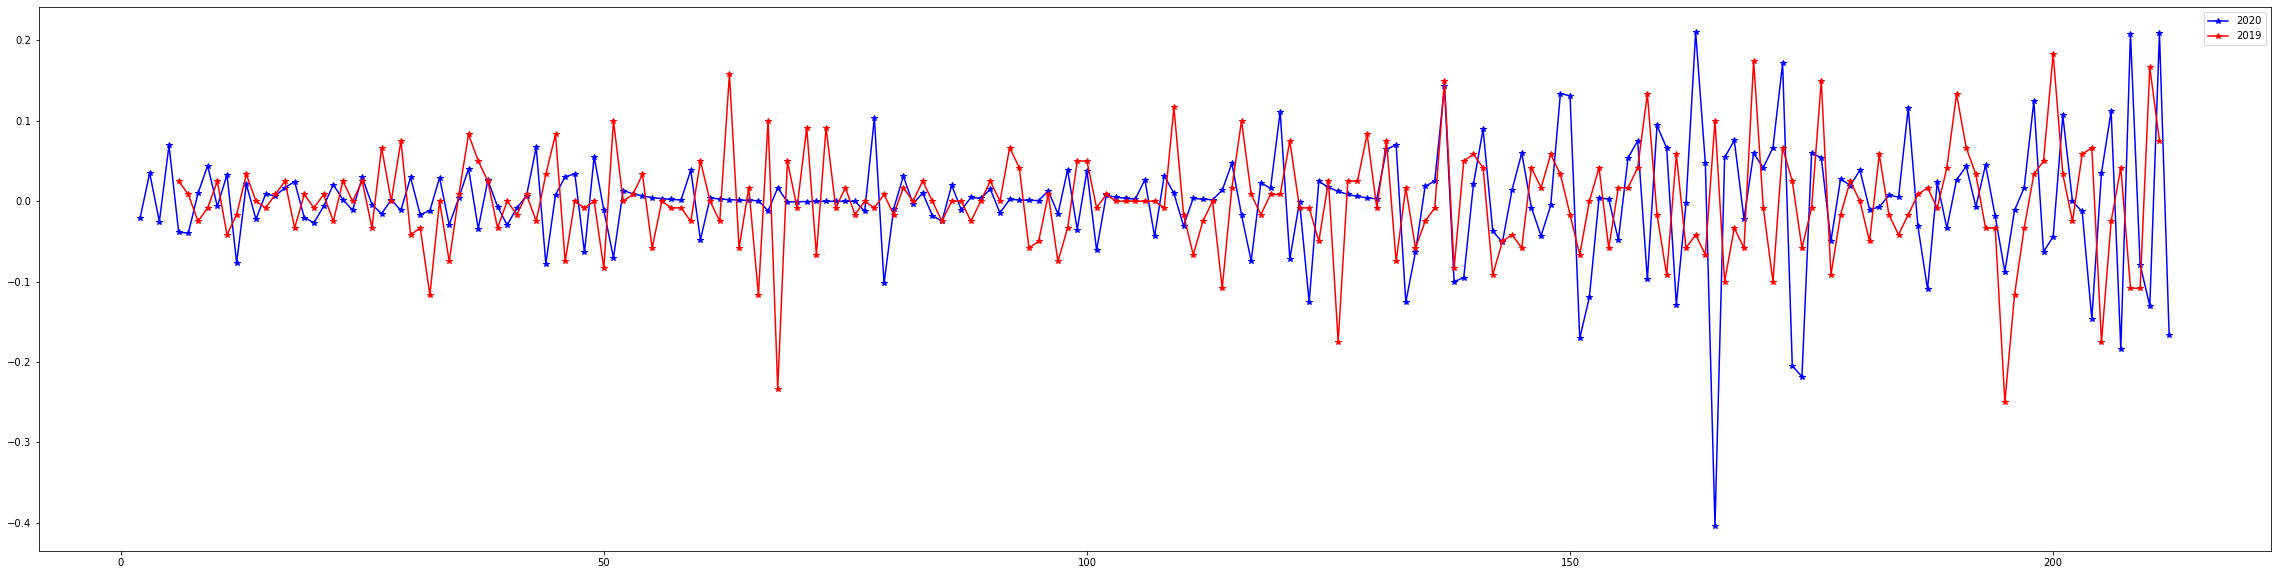

In [294]:
plt.figure(figsize=(40,10))

velocidade1 = dados_ibirapuera_2020_completados_suavizado.diff()
velocidade2 = dados_ibirapuera_2019_completados_suavizado.diff()

plt.plot(velocidade1.diff(),'b*-',label='2020');
plt.plot(velocidade2.diff(),'r*-',label='2019');
plt.legend(loc='best')
plt.show()

## Estação  Margem Tietê

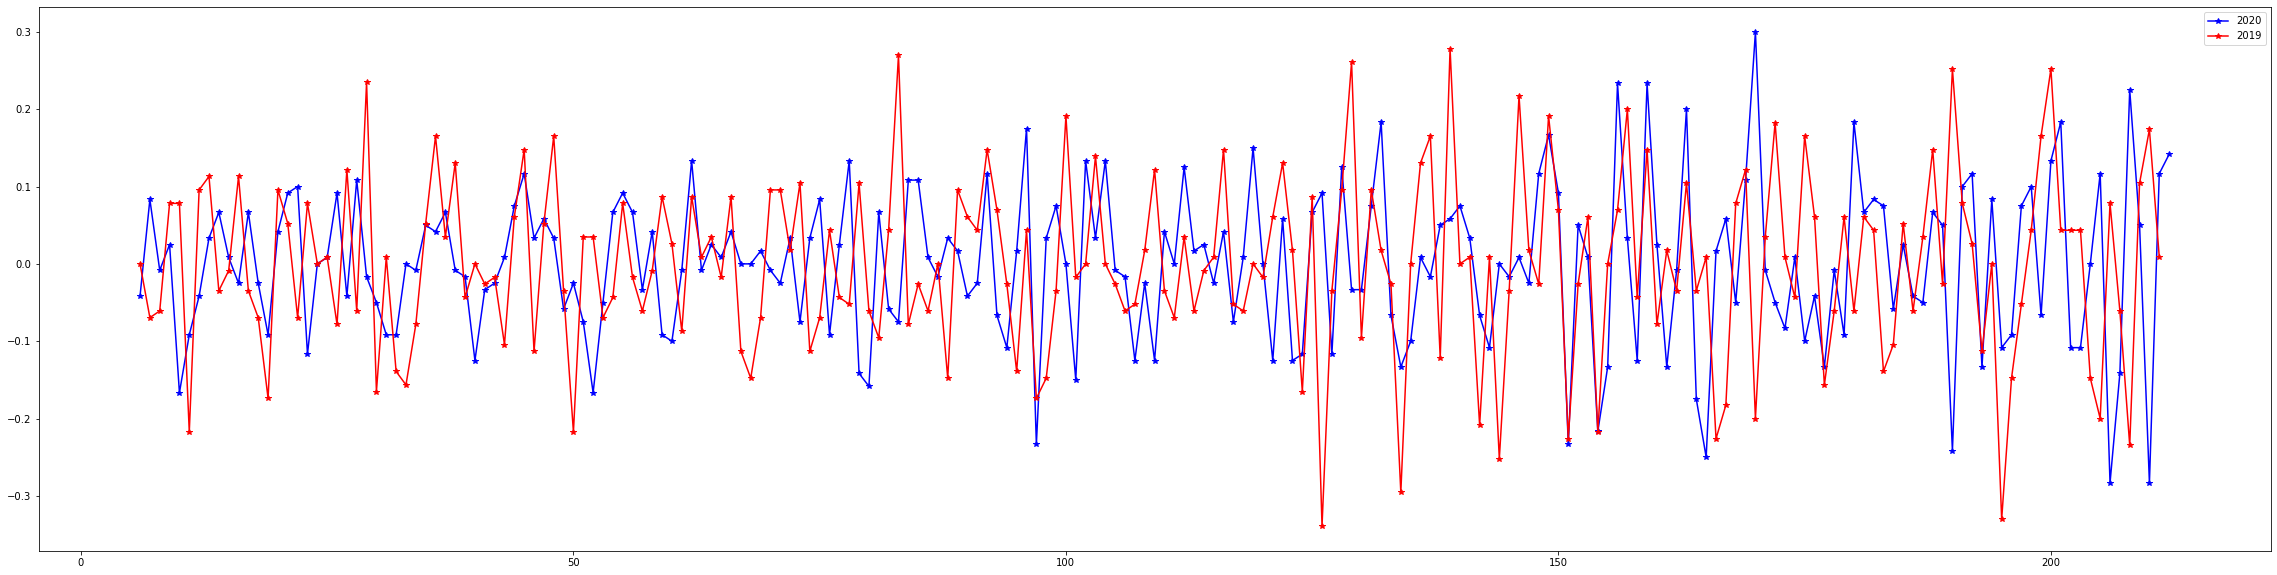

In [295]:
plt.figure(figsize=(40,10))

velocidade1 = dados_Marg_T_2020_completados_suavizado.diff()
velocidade2 = dados_Marg_T_2019_completados_suavizado.diff()

plt.plot(velocidade1.diff(),'b*-',label='2020');
plt.plot(velocidade2.diff(),'r*-',label='2019');
plt.legend(loc='best')
plt.show()

## Estação Osasco

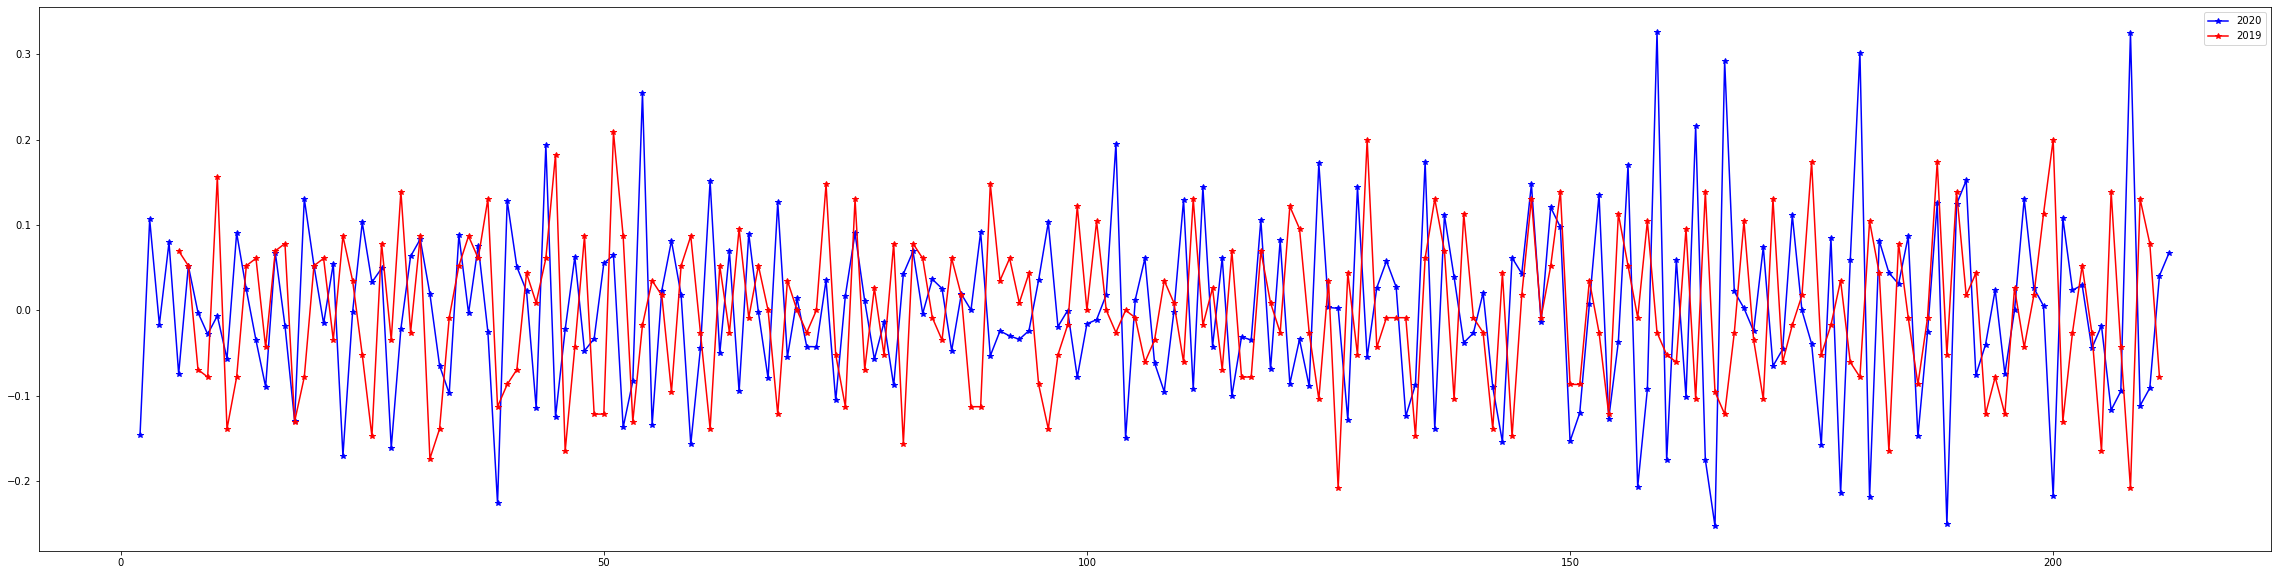

In [296]:
plt.figure(figsize=(40,10))

velocidade1 = dados_Osasco_2020_completados_suavizado.diff()
velocidade2 = dados_Osasco_2019_completados_suavizado.diff()

plt.plot(velocidade1.diff(),'b*-',label='2020');
plt.plot(velocidade2.diff(),'r*-',label='2019');
plt.legend(loc='best')
plt.show()

## Estação Parque Pedro II

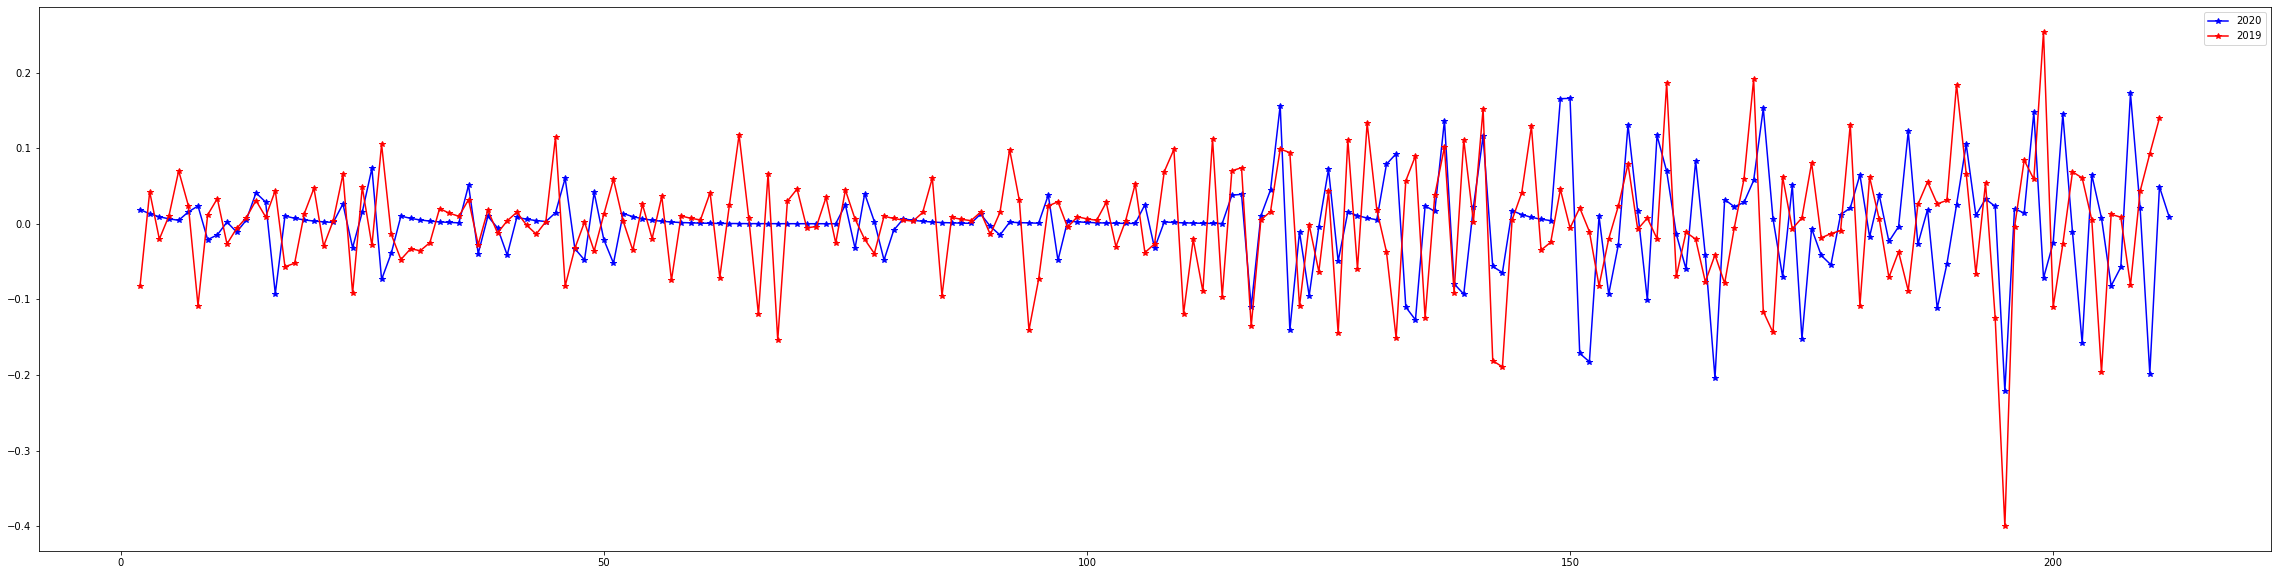

In [297]:
plt.figure(figsize=(40,10))

velocidade1 = dados_P_Pedro_2020_completados_suavizado.diff()
velocidade2 = dados_P_Pedro_2019_completados_suavizado.diff()

plt.plot(velocidade1.diff(),'b*-',label='2020');
plt.plot(velocidade2.diff(),'r*-',label='2019');
plt.legend(loc='best')
plt.show()

## Estação Pinheiro

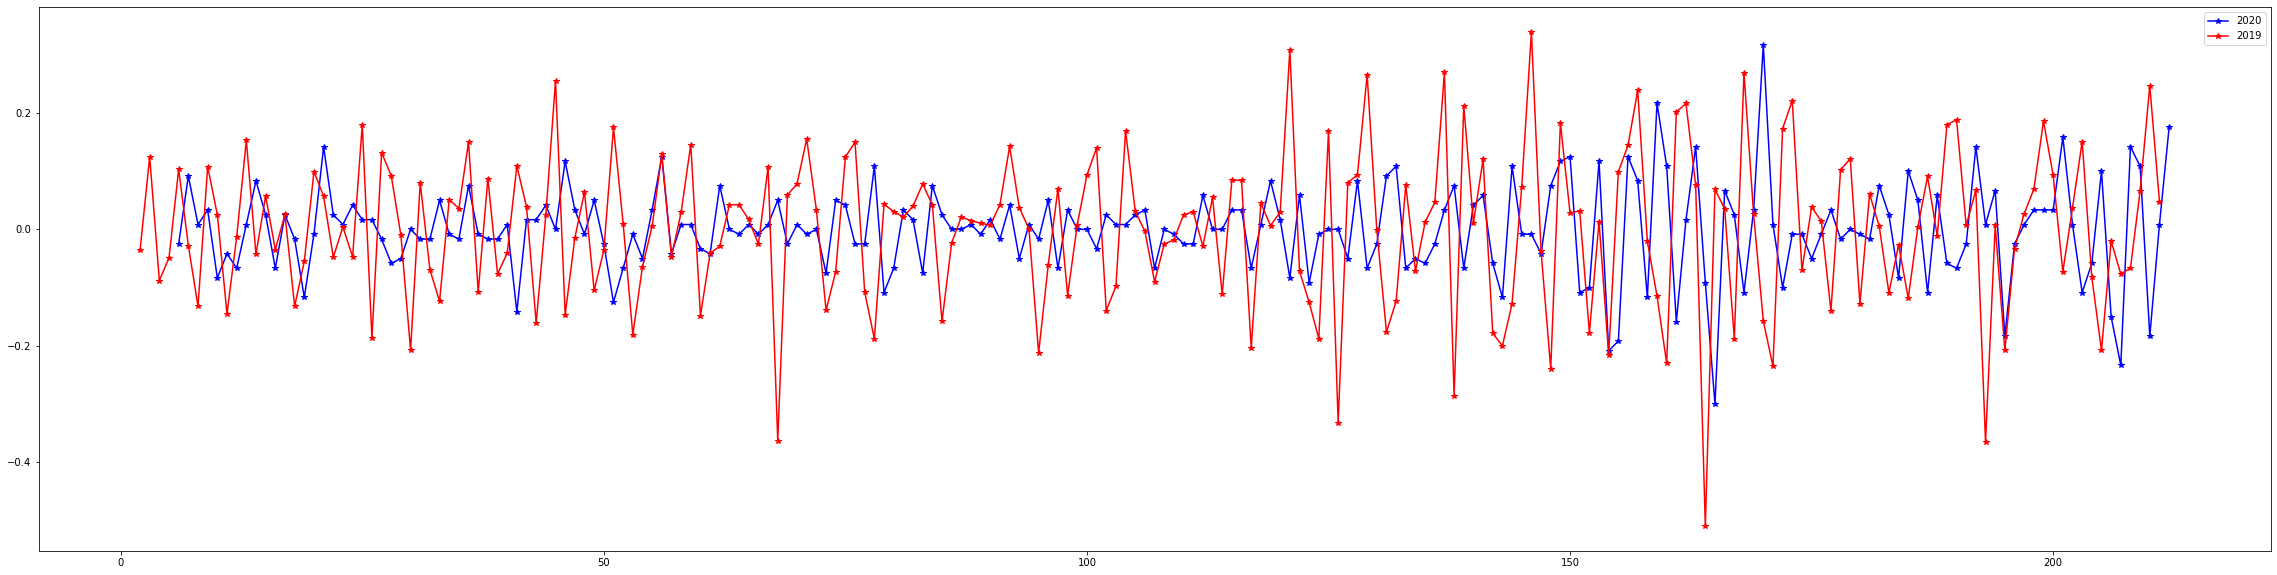

In [298]:
plt.figure(figsize=(40,10))

velocidade1 = dados_Pinheiros_2020_completados_suavizado.diff()
velocidade2 = dados_Pinheiros_2019_completados_suavizado.diff()

plt.plot(velocidade1.diff(),'b*-',label='2020');
plt.plot(velocidade2.diff(),'r*-',label='2019');
plt.legend(loc='best')
plt.show()

## Estação Santo Amaro

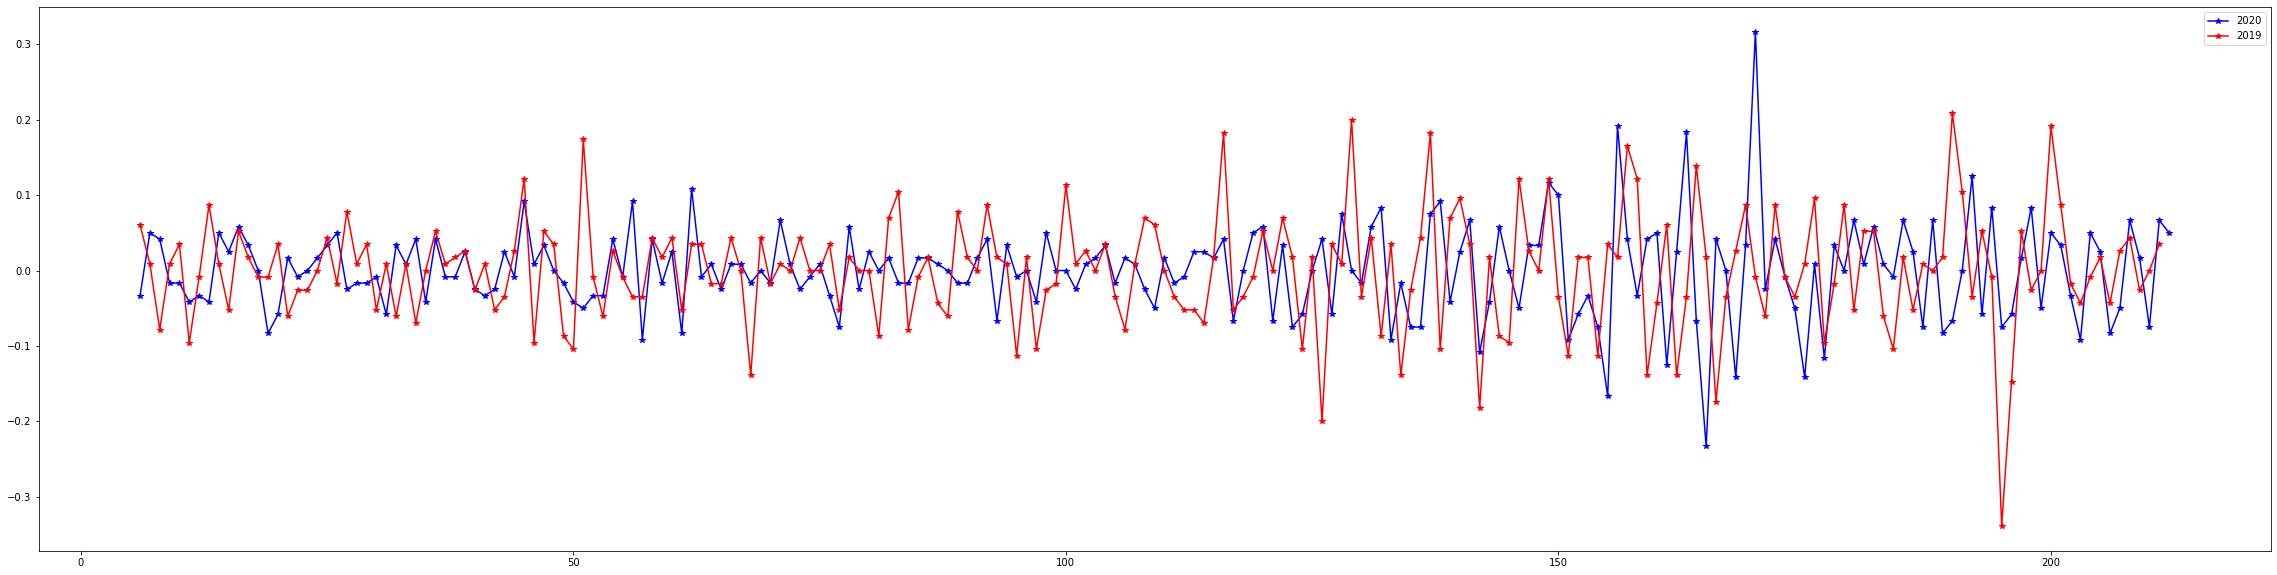

In [299]:
plt.figure(figsize=(40,10))

velocidade1 = dados_Santo_Amaro_2020_completados_suavizado.diff()
velocidade2 = dados_Santo_Amaro_2019_completados_suavizado.diff()

plt.plot(velocidade1.diff(),'b*-',label='2020');
plt.plot(velocidade2.diff(),'r*-',label='2019');
plt.legend(loc='best')
plt.show()